# **Business Understanding**

Consumer finance companies often face challenges when deciding whether to approve loans for individuals with insufficient or non-existent credit histories. Some consumers take advantage of this situation by intentionally defaulting on loans. When the company receives a loan application, it must make a decision regarding approval based on the applicant's profile. This decision involves two types of risks:

1. If the applicant is likely to repay the loan, rejecting the loan application results in a missed business opportunity for the company.

2. If the applicant is not likely to repay the loan, meaning they are at risk of defaulting, approving the loan may lead to financial losses for the company.

To address these challenges, exploratory data analysis (EDA) needs to be conducted to analyze patterns within the data. This analysis aims to ensure that applicants who have the capability to repay the loan are not unfairly denied approval.

# **Business Objective**

The primary objective of this case study is to detect patterns that signal a client's potential challenges in making loan installments. These patterns can be leveraged to make informed decisions, such as denying the loan, decreasing the loan amount, or offering loans to risky applicants at higher interest rates.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

* Approved: The Company has approved loan Application

* Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

* Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

* Unused offer:  Loan has been cancelled by the client but at different stages of the process.

The ultimate goal is to prevent the rejection of loan applications from clients who are genuinely capable of repaying their loans, and this will be achieved through exploratory data analysis (EDA) to identify such applicants.In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

# **The Dataset**

This dataset has 3 files as explained below:



1. **application_data.csv**  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.



2. **previous_application.csv** contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.



3. **columns_description.csv** is data dictionary which describes the meaning of the variables.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline


In [2]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Adjust view
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)



In [4]:
# Create a directory to save the visualisation images within the colab envirnment
!mkdir images


### **Reading the data**

In [5]:
# The two datasets we have to work with
application_dtf=pd.read_csv('/content/drive/MyDrive/application_data.csv')
previous_dtf=pd.read_csv('/content/drive/MyDrive/previous_application.csv')


In [6]:
# The description dataset to know more about the features
desc=pd.read_csv('/content/drive/MyDrive/columns_description.csv',encoding='latin1')

In [7]:
# Studying the features of application_data
desc[desc['Table']=='application_data']

Unnamed: 0             Table                           Row                                        Description                                Special
0             1  application_data                    SK_ID_CURR                           ID of loan in our sample                                    NaN
1             2  application_data                        TARGET  Target variable (1 - client with payment diffi...                                    NaN
2             5  application_data            NAME_CONTRACT_TYPE        Identification if loan is cash or revolving                                    NaN
3             6  application_data                   CODE_GENDER                               Gender of the client                                    NaN
4             7  application_data                  FLAG_OWN_CAR                      Flag if the client owns a car                                    NaN
5             8  application_data               FLAG_OWN_REALTY                Flag if client owns a house or flat                                    NaN
6             9  application_data                  CNT_CHILDREN                  Number of children the client has                                    NaN
7            10  application_data              AMT_INCOME_TOTAL                               Income of the client                                    NaN
8            11  application_data                    AMT_CREDIT                          Credit amount of the loan                                    NaN
9            12  application_data                   AMT_ANNUITY                                       Loan annuity                                    NaN
10           13  application_data               AMT_GOODS_PRICE  For consumer loans it is the price of the good...                                    NaN
11           14  application_data               NAME_TYPE_SUITE  Who was accompanying client when he was applyi...                                    NaN
12           15  application_data              NAME_INCOME_TYPE  Clients income type (businessman, working, mat...                                    NaN
13           16  application_data           NAME_EDUCATION_TYPE     Level of highest education the client achieved                                    NaN
14           17  application_data            NAME_FAMILY_STATUS                        Family status of the client                                    NaN
15           18  application_data             NAME_HOUSING_TYPE  What is the housing situation of the client (r...                                    NaN
16           19  application_data    REGION_POPULATION_RELATIVE  Normalized population of region where client l...                            normalized 
17           20  application_data                    DAYS_BIRTH    Client's age in days at the time of application  time only relative to the application
18           21  application_data                 DAYS_EMPLOYED  How many days before the application the perso...  time only relative to the application
19           22  application_data             DAYS_REGISTRATION  How many days before the application did clien...  time only relative to the application
20           23  application_data               DAYS_ID_PUBLISH  How many days before the application did clien...  time only relative to the application
21           24  application_data                   OWN_CAR_AGE                                Age of client's car                                    NaN
22           25  application_data                    FLAG_MOBIL      Did client provide mobile phone (1=YES, 0=NO)                                    NaN
23           26  application_data                FLAG_EMP_PHONE        Did client provide work phone (1=YES, 0=NO)                                    NaN
24           27  application_data               FLAG_WORK_PHONE        Did client provide home phone (1=YES, 0=NO)                                    NaN
2

In [8]:
# Studying features of previous_application data
desc[desc['Table']=='previous_application.csv']

Unnamed: 0                     Table                          Row                                        Description                                Special
122         176  previous_application.csv                  SK_ID_PREV   ID of previous credit in Home credit related t...                                 hashed
123         177  previous_application.csv                   SK_ID_CURR                           ID of loan in our sample                                 hashed
124         178  previous_application.csv           NAME_CONTRACT_TYPE  Contract product type (Cash loan, consumer loa...                                    NaN
125         179  previous_application.csv                  AMT_ANNUITY                    Annuity of previous application                                    NaN
126         180  previous_application.csv              AMT_APPLICATION  For how much credit did client ask on the prev...                                    NaN
127         181  previous_application.csv                   AMT_CREDIT  Final credit amount on the previous applicatio...                                    NaN
128         182  previous_application.csv             AMT_DOWN_PAYMENT           Down payment on the previous application                                    NaN
129         183  previous_application.csv              AMT_GOODS_PRICE  Goods price of good that client asked for (if ...                                    NaN
130         184  previous_application.csv   WEEKDAY_APPR_PROCESS_START  On which day of the week did the client apply ...                                    NaN
131         185  previous_application.csv      HOUR_APPR_PROCESS_START  Approximately at what day hour did the client ...                                rounded
132         186  previous_application.csv  FLAG_LAST_APPL_PER_CONTRACT  Flag if it was last application for the previo...                                    NaN
133         187  previous_application.csv       NFLAG_LAST_APPL_IN_DAY  Flag if the application was the last applicati...                                    NaN
134         188  previous_application.csv             NFLAG_MICRO_CASH                            Flag Micro finance loan                                    NaN
135         189  previous_application.csv            RATE_DOWN_PAYMENT    Down payment rate normalized on previous credit                             normalized
136         190  previous_application.csv        RATE_INTEREST_PRIMARY        Interest rate normalized on previous credit                             normalized
137         191  previous_application.csv     RATE_INTEREST_PRIVILEGED        Interest rate normalized on previous credit                             normalized
138         192  previous_application.csv       NAME_CASH_LOAN_PURPOSE                           Purpose of the cash loan                                    NaN
139         193  previous_application.csv         NAME_CONTRACT_STATUS  Contract status (approved, cancelled, ...) of ...                                    NaN
140         194  previous_application.csv                DAYS_DECISION  Relative to current application when was the d...  time only relative to the application
141         195  previous_application.csv            NAME_PAYMENT_TYPE  Payment method that client chose to pay for th...                                    NaN
142         196  previous_application.csv           CODE_REJECT_REASON          Why was the previous application rejected                                    NaN
143         197  previous_application.csv              NAME_TYPE_SUITE  Who accompanied client when applying for the p...                                    NaN
144         198  previous_application.csv             NAME_CLIENT_TYPE  Was the client old or new client when applying...                                    NaN
145         199  previous_application.csv          NAME_GOODS_CATEGORY  What kind of goods did the client apply for in...                    

In [9]:
# Now that we have see the features, let's move on to the main datasets
application_dtf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3      100006       0         Cash loans           F           

In [10]:
previous_dtf.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [11]:
# Let's see the shapes and sizes of the data
print("application_dtf dimension     :",application_dtf.shape)
print("previous_dtf dimension        :",previous_dtf.shape)
print("application_dtf size          :",application_dtf.size)
print("previous_dtf size             :",previous_dtf.size)

application_dtf dimension     : (307511, 122)
previous_dtf dimension        : (1670214, 37)
application_dtf size          : 37516342
previous_dtf size             : 61797918


In [12]:
# A look into the data types of application_dtf features
application_dtf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [13]:
# A look into the data types of previous_dtf features
previous_dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### **Data Cleaning and Manipulation**



Let's check the null value percentage in each column

In [14]:
# Checking the percentage of nulls in application_dtf
(application_dtf.isnull().sum())*100/application_dtf.shape[0]

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [15]:
# Extract the columns with >40% null values
application_nulls=(application_dtf.isnull().sum())*100/application_dtf.shape[0]
null_vals_app=application_nulls[application_nulls>40].index.to_list()
null_vals_app


['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

We'll drop the columns with more than 40% null values

In [16]:
application_dtf.drop(columns=null_vals_app,inplace=True)

In [17]:
# Check the shape
application_dtf.shape

(307511, 73)

In [18]:
# Let's do the same with previous_dtf
(previous_dtf.isnull().sum())*100/previous_dtf.shape[0]

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [19]:
previous_nulls=(previous_dtf.isnull().sum())*100/previous_dtf.shape[0]
null_vals_prev=previous_nulls[previous_nulls>40].index.to_list()
null_vals_prev

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [20]:
previous_dtf.drop(columns=null_vals_prev,inplace=True)
previous_dtf.shape

(1670214, 26)

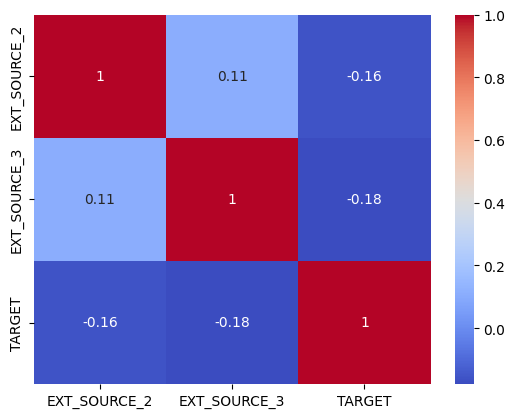

In [21]:
# Now we'll check for correlation between some features of application_dtf and the target feature
data_app=application_dtf[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']] # 'EXT_SOURCE_1' was dropped earlier due to null value percentage >40%
sns.heatmap(data=data_app.corr(),annot=True,cmap='coolwarm')
plt.show()


In [22]:
# As we can see the features are negatively correlated with the target variable, its safe to drop them.
application_dtf.drop(columns=['EXT_SOURCE_2','EXT_SOURCE_3'],inplace=True)

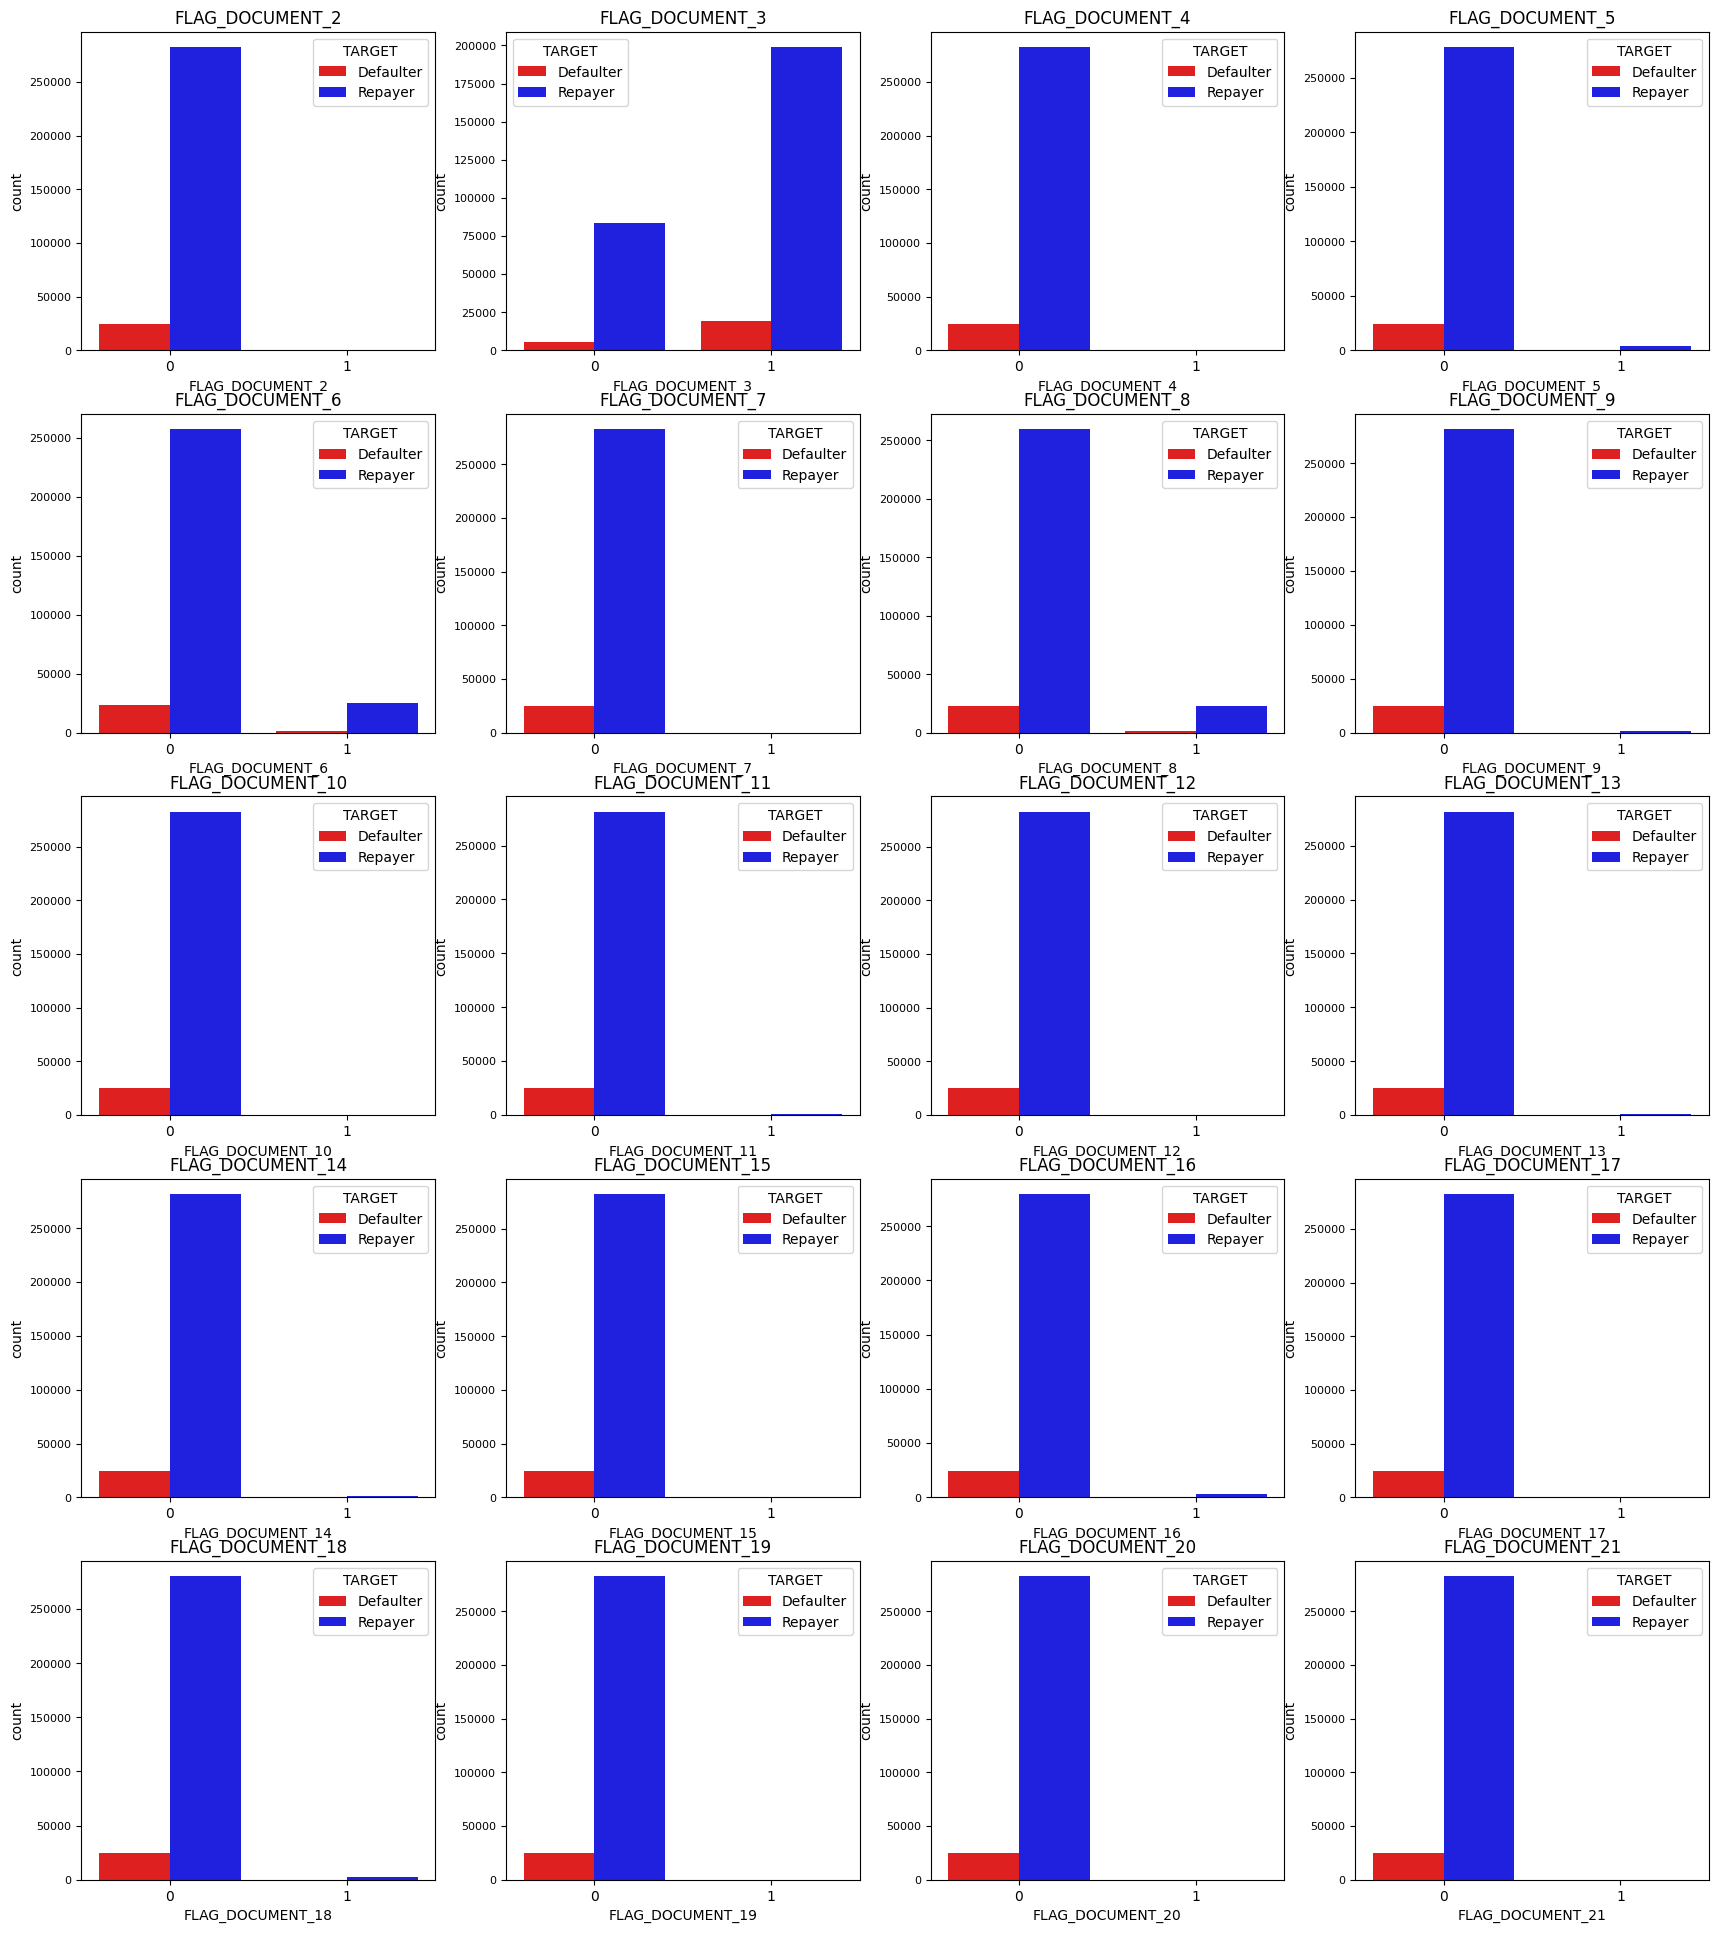

In [23]:
# Now we'll check the relevance of flag_document_x variables since they are similar features
cols=[]
for i in range(2,22):
  cols.append(f'FLAG_DOCUMENT_{i}')
flag_dtf=application_dtf[cols+['TARGET']]
length=len(cols)
# Naming the Legends
flag_dtf["TARGET"] = flag_dtf["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(data=flag_dtf,x=flag_dtf[i],hue=flag_dtf["TARGET"],palette=["r","b"])
    plt.yticks(fontsize=8)
    plt.title(i)



In [24]:
# We can see that except document_3, no other documents were submitted by clients who applied for loans. If the borrower has submitted document_3,
# it means there is less chance of defaulting the loan. Therefore, we drop the remaining documents columns.

cols.remove('FLAG_DOCUMENT_3')
application_dtf.drop(columns=cols,inplace=True)

In [25]:
application_dtf.shape

(307511, 52)

In [26]:
application_dtf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                         0.0                        0.0                         0.0   
3      100006       0         Cash loans           

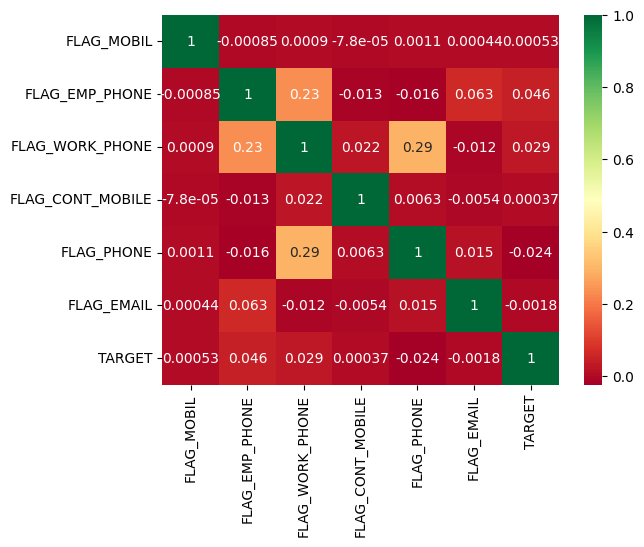

In [27]:
# There are some communication tools columns such as mobile phones and emails. Let's see their relation with the target variable
communication_tools=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']
dtf_communication=application_dtf[communication_tools + ['TARGET']]
data_corr=dtf_communication.corr()
sns.heatmap(data=data_corr,annot=True,cmap='RdYlGn')
plt.show()

In [28]:
# As we can see, the presence of any of these communication tools does not necesarily imply whether the borrower is a repayer or a defaulter.
# There is no correleation between these variables and the status of loan repayment. Hence, we can drop these columns too
application_dtf.drop(columns=communication_tools,inplace=True)
application_dtf.shape

(307511, 46)

In [29]:
# Let's check the dtypes of the remianing columns
application_dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [30]:
# Let's check the same for previous_dtf
previous_dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

### **Standardization of values**

There are certain columns in application_dtf which are count of days of a certain event but the values are negative. We need to make the values positive.
The columns are:
* DAYS_BIRTH
* DAYS_EMPLOYED
* DAYS_REGISTRATION
* DAYS_ID_PUBLISH

In previous_dtf, we have negative values for days count in:
* DAYS_DECISION

In [31]:
# We take the columns with negative numeric values for days and multiply them with -1.
date_cols=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
for col in date_cols:
  application_dtf[col]=abs(application_dtf[col])
application_dtf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                  1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School                       1.0                       0.0                       1.0                       0.0                   828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government                       0.0                       0.0                       0.0                       0.0                   815.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
3      100006       0         Cash loans           F            N               Y  

In [32]:
# We'll make the DAYS_DECISION column in previous_dtf positive
previous_dtf['DAYS_DECISION']=abs(previous_dtf['DAYS_DECISION'])
previous_dtf.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                   SATURDAY                       15                           Y                       1                    XAP             Approved             73  Cash through the bank                XAP         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                   THURSDAY                       11                           Y                       1                    XNA             Approved            164                    XNA                XAP         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    TUESDAY                       11                           Y                       1                    XNA             Approved            301  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                     MONDAY                        7                           Y                       1                    XNA             Approved            512  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                   THURSDAY                        9                           Y                       1                Repairs              Refused            781  Cash through the bank                 HC         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high         Cash Street: high

In [33]:
# Let's analyze the remaining null values in application data
application_dtf.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
R

In [34]:
application_dtf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                  1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School                       1.0                       0.0                       1.0                       0.0                   828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government                       0.0                       0.0                       0.0                       0.0                   815.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
3      100006       0         Cash loans           F            N               Y  

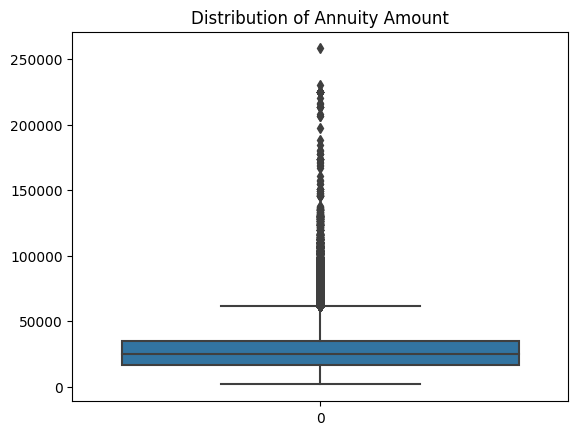

In [35]:
#Let's check the AMT_ANNUITY column
sns.boxplot(data=application_dtf['AMT_ANNUITY'])
plt.title('Distribution of Annuity Amount')
plt.show()


Annuities are basically loans that are paid back over a set period of time at a set interest rate with consistent payments each period. As per the data, majority of the clients have annuity between 0-60000.

In [36]:
# Fill null values of AMT_ANNUITY with median of the column.
application_dtf['AMT_ANNUITY'].fillna(application_dtf['AMT_ANNUITY'].median(),inplace=True)

In [37]:
# Check the null values again
application_dtf['AMT_ANNUITY'].isnull().sum()

0

In [38]:
# Let's see occupation type column
application_dtf['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [39]:
# Since OCCUPATION_TYPE column has around 96k null values, we can't impute it with mode as that will impact our analysis. Let's add a new category 'unknown

application_dtf['OCCUPATION_TYPE'].fillna('Unknown', inplace =True)

In [40]:
application_dtf['OCCUPATION_TYPE'].value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [41]:
#Checking the percentage of null values in AMT_GOODS_PRICE and NAME_TYPE_SUITE columns
(application_dtf[['NAME_TYPE_SUITE','AMT_GOODS_PRICE']].isnull().sum())*100/len(application_dtf)

NAME_TYPE_SUITE    0.420148
AMT_GOODS_PRICE    0.090403
dtype: float64

In [42]:
# As the NAME_TYPE_SUITE and AMT_GOODS_PRICE columns have very insignificant percentage of null values we'll impute them with the mode
application_dtf['NAME_TYPE_SUITE'].fillna(application_dtf['NAME_TYPE_SUITE'].mode()[0],inplace=True)
application_dtf['AMT_GOODS_PRICE'].fillna(application_dtf['AMT_GOODS_PRICE'].mode()[0],inplace=True)

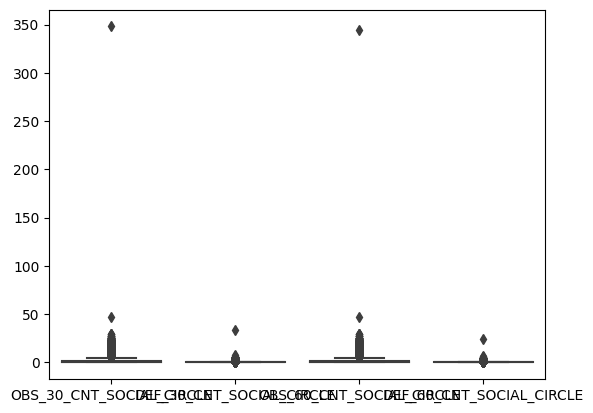

In [43]:
# Checking the OBS_CNT and DEF_CNT columns
observations=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
sns.boxplot(data=application_dtf[observations])
plt.show()


In [44]:
# Almost 95% of the data have data in columns 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'
# in between 0-50. Since it is a numerical column, we can fill it with median of the data
application_dtf['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(application_dtf['OBS_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
application_dtf['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(application_dtf['OBS_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
application_dtf['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(application_dtf['DEF_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
application_dtf['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(application_dtf['DEF_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

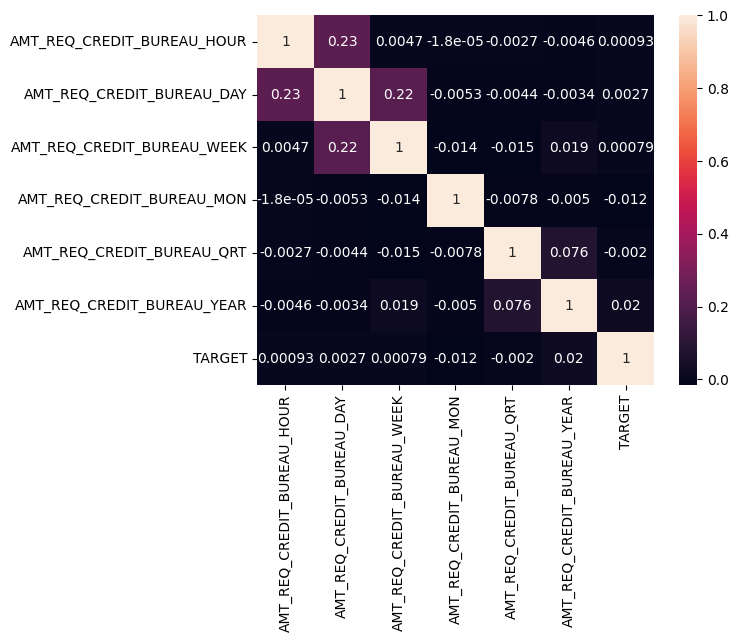

In [45]:
# Let's analyse the 'AMT_REQ_CREDIT_BUREAU_X' columns
other_cols=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
data=application_dtf[other_cols + ['TARGET']]
sns.heatmap(data=data.corr(),annot=True,)
plt.show()

As the heatmap shows, the number of times a client's credit report was accessed hours,days,weeks or months before an application was made does not impact whether the client is a repayer or defaulter. Hence, it is safe to drop these columns too.

In [46]:
# Again dropping the unwanted columns
application_dtf.drop(columns=other_cols,inplace=True)


In [47]:
#Checking the null value count
application_dtf.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_N

In [48]:
# Let's see the null values in 'CNT_FAM_MEMBERS'
application_dtf[application_dtf['CNT_FAM_MEMBERS'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3
41982       148605       0    Revolving loans           M            N               Y             0          450000.0    675000.0      33750.0         450000.0   Unaccompanied  Commercial associate     Lower secondary            Unknown  Municipal apartment                    0.015221       12396           1161             3265.0             4489        Managers              NaN                     2                            2                   THURSDAY                       15                           0                           1                            1                       0                       1                        1               Insurance                       3.0                       0.0                       3.0                       0.0                   876.0                0
187348      317181       0    Revolving loans           F            N               Y             0          202500.0    585000.0      29250.0         450000.0   Unaccompanied  Commercial associate    Higher education            Unknown    House / apartment                    0.031329       12844            232             1597.0             1571     Accountants              NaN                     2                            2                     FRIDAY                       14                           0                           0                            0                       0                       0                        0  Business Entity Type 2                       1.0                       0.0                       1.0                       0.0                   654.0                0

Both the clients have a good total income and own flat/property. Also, their credit amount of the loan is high. We can't drop these records as they are significant. Hence, we'll impute the 'CNT_FAM_MEMBERS' with mode.

In [49]:
# Null value imputation with mode
application_dtf['CNT_FAM_MEMBERS'].fillna(application_dtf['CNT_FAM_MEMBERS'].mode()[0],inplace=True)

Since DAYS_LAST_PHONE_CHANGE column has only one missing value, it won't make much difference. We can ignore it.

In [50]:
# Let's check the null values again
application_dtf.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_N

In [51]:
# Let's treat the null values in previous_dtf
(previous_dtf.isnull().sum())

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

Only three columns have null values that too of about 20%. As earlier, we'll impute the AMT_ANNUITY with median and AMT_GOODS_PRICE with mode of the data.

In [52]:
# Fill null values of AMT_ANNUITY with median of the column.
previous_dtf['AMT_ANNUITY'].fillna(previous_dtf['AMT_ANNUITY'].median(),inplace=True)
previous_dtf['AMT_GOODS_PRICE'].fillna(previous_dtf['AMT_GOODS_PRICE'].mode()[0],inplace=True)


In [53]:
# Let's check the sellerplace area feature
previous_dtf['SELLERPLACE_AREA'].value_counts()

-1       762675
 0        60523
 50       37401
 30       34423
 20       33840
          ...  
 1014         1
 1256         1
 677          1
 7518         1
 1446         1
Name: SELLERPLACE_AREA, Length: 2097, dtype: int64

In [54]:
#As we can see, almost 70000 values are -1 which indicates missing values. We will drop this column
previous_dtf.drop(columns='SELLERPLACE_AREA',inplace=True)

Let's check the CNT_PAYMENT column

In [55]:
previous_dtf[previous_dtf['CNT_PAYMENT'].isnull()]['NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [56]:
# CNT_PAYMENT refers to term of previous credit at term of the previous application. Since most of the application were not started, we can impute the null values with 0.
previous_dtf['CNT_PAYMENT'].fillna(0,inplace=True)

In [57]:
# Check the null values again
previous_dtf.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                      0
AMT_APPLICATION                  0
AMT_CREDIT                       1
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                      0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

We still have some missing values at PRODUCT_COMBINATION column and on at AMT_CREDIT column. Since the percentage of null values is very less we can ignore them safely.

### **Outlier Detection and Handling**

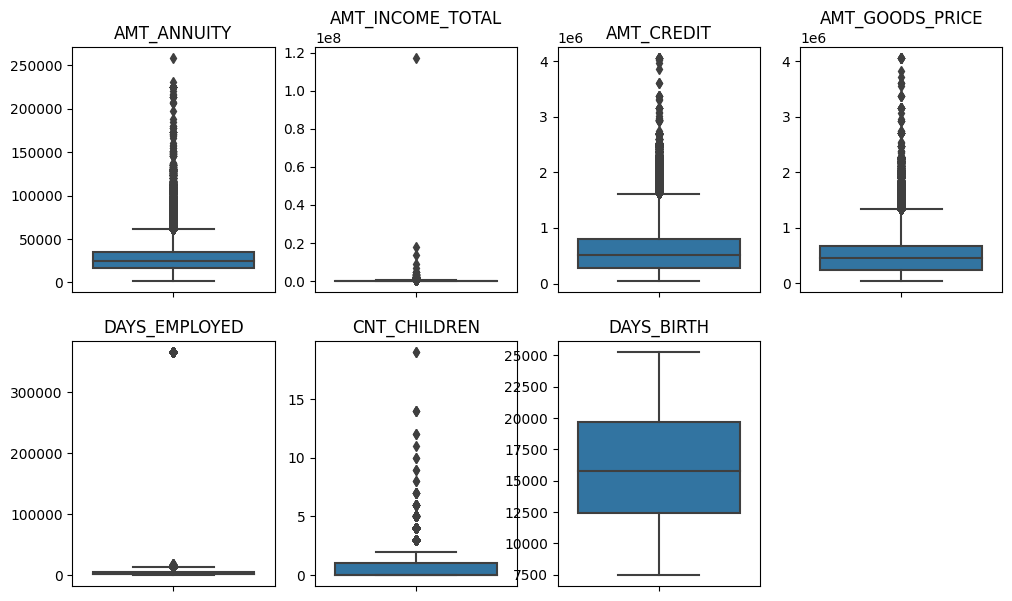

In [58]:
# Let's check the outliers in application_dtf
cols_for_outliers=['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN','DAYS_BIRTH']
plt.figure(figsize=(12,7))
for i in enumerate(cols_for_outliers):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=application_dtf[i[1]])
    plt.title(i[1])
    plt.ylabel("")


It can be seen that in current application data
* AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.
* AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.
* DAYS_BIRTH has no outliers which means the data available is reliable.
* DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.

In [59]:
# Let's check the 'AMT_INCOME_TOTal column
application_dtf[application_dtf['AMT_INCOME_TOTAL']>0.4*10**7]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3
12840       114967       1         Cash loans           F            N               Y             1       117000000.0    562491.0      26194.5         454500.0   Unaccompanied               Working  Secondary / secondary special               Married  House / apartment                    0.010643       12615            922             6762.0             3643        Laborers              3.0                     2                            2                    TUESDAY                       14                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       0.0                       0.0                       0.0                       0.0                     0.0                1
77768       190160       0         Cash loans           F            Y               N             0         9000000.0   1431531.0     132601.5        1377000.0   Unaccompanied               Working               Higher education        Civil marriage  House / apartment                    0.010147       16425           8476             7276.0             1656        Managers              2.0                     2                            2                     FRIDAY                       13                           0                           0                            0                       0                       0                        0  Business Entity Type 1                       1.0                       0.0                       1.0                       0.0                     3.0                0
103006      219563       0    Revolving loans           M            Y               Y             0         4500000.0   2250000.0     225000.0        2250000.0   Unaccompanied               Working               Higher education  Single / not married  House / apartment                    0.007330       10778            378             4919.0             3441        Managers              1.0                     2                            2                   SATURDAY                       15                           0                           1                            1                       0                       0                        0            Construction                       1.0                       0.0                       1.0                       0.0                   529.0                0
131127      252084       0         Cash loans           M            Y               N             0         6750000.0    790830.0      52978.5         675000.0   Unaccompanied               Working               Higher education               Married  House / apartment                    0.009549       19341            443             7414.0             2886        Laborers              2.0                     2                            2                    TUESDAY                       14                           0                           1                            1                       0                       1                        1       Transport: type 4                       0.0   

There are few clients whose annual income is too high,like 4500000 and above. Most of them did not face difficulty repaying the loan. However, the one with the highest income of 11crores faced some difficulty in repaying a loan of credit amount of around 500000 with annuity of around 26k. This seems to be an erroneous data as this is very less likely to happen. For our analysis, we chose to drop these records.

In [60]:
# Removing the outliers
application_dtf=application_dtf[application_dtf['AMT_INCOME_TOTAL']<0.4*10**7]

<Axes: >

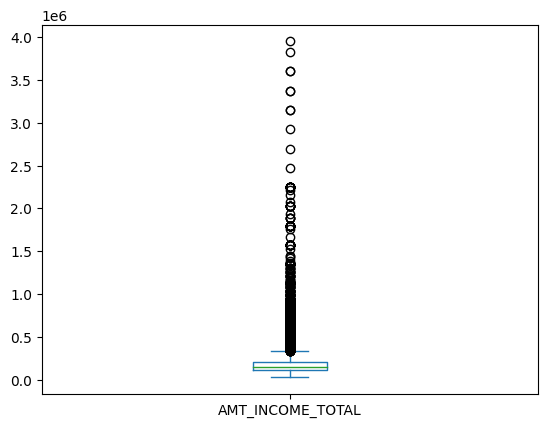

In [61]:
#let's check the box plot again
application_dtf['AMT_INCOME_TOTAL'].plot.box()

It still has outliers but the higher incomes are not exorbitantly high and are acceptable incomes in general that can be considered for our further analysis.

<Axes: >

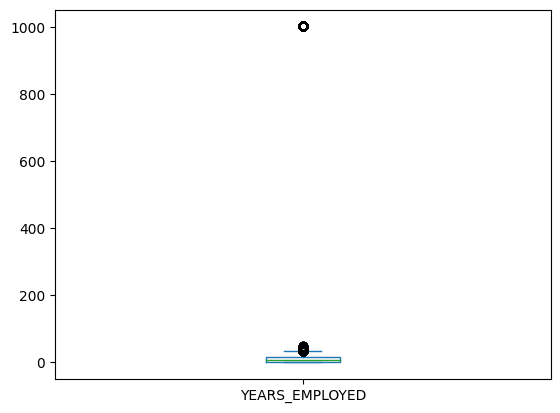

In [62]:
# Let's see the DAYS_EMPLOYED column
application_dtf['YEARS_EMPLOYED']=application_dtf['DAYS_EMPLOYED']/365 #To get the years employed
application_dtf['YEARS_EMPLOYED'].plot.box()

As more than 100 years of employement is quite impractical, these are erroneous records and we drop them

<Axes: >

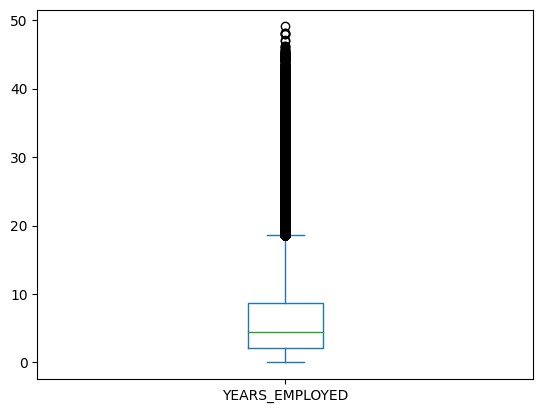

In [63]:
# Removing outliers in YEARS_EMPLOYED column
application_dtf[application_dtf['YEARS_EMPLOYED']<100]['YEARS_EMPLOYED'].plot.box()

In [64]:
# Let's check the 'CNT_CHILDREN' col. As we can see from the box plot, number of children >7 is very less. Such records are very less likely to occur.
application_dtf[application_dtf['CNT_CHILDREN']>7]


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  YEARS_EMPLOYED
12615       114709       0         Cash loans           M            Y               N             8          112500.0    755190.0      29947.5         675000.0   Unaccompanied         State servant               Higher education               Married  Municipal apartment                    0.006207       15197           6252             5009.0             5004            Core staff             10.0                     2                            2                  WEDNESDAY                       11                           0                           0                            0                       1                       1                        0                  School                       0.0                       0.0                       0.0                       0.0                  1049.0                0       17.128767
23881       127782       1         Cash loans           F            N               N             9          180000.0    640080.0      31131.0         450000.0   Unaccompanied  Commercial associate               Higher education  Single / not married  Municipal apartment                    0.006629       10929           1042              950.0             3447           Sales staff             10.0                     2                            2                   THURSDAY                       14                           0                           0                            0                       0                       0                        0           Self-employed                       3.0                       1.0                       3.0                       1.0                   365.0                1        2.854795
34545       140032       1         Cash loans           M            Y               N            11          315000.0   1007761.5      38515.5         927000.0   Unaccompanied               Working  Secondary / secondary special               Married    House / apartment                    0.010643       17308            198             3940.0              844              Managers             13.0                     2                            2                     FRIDAY                       17                           0                           0                            0                       0                       1                        1                   Other                       0.0                       0.0                       0.0                       0.0                     3.0                0        0.542466
80948       193853       0         Cash loans           F            N               Y            12          337500.0    746280.0      59094.0         675000.0          Family  Commercial associate  Secondary / secondary special               Married    House / apartment                    0.046220       14093           2710             2066.0             3908            Core staff             14.0                     1                            1                     FRIDAY                       13                           0                           0                            0                      

As we can see, people with more than 7 children do not have a high annual income which means their monthly income is also very less. But their loan credit amount is high compared to their annual income. Also, their annuity is more than their monthly earnings. Hence, a few of them faced difficulty paying their installments on time.

<Axes: >

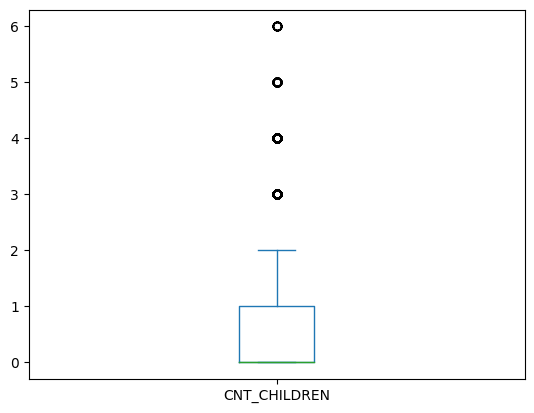

In [65]:
# For our analysis we'll keep the CNT_CHILDREN upto 7
application_dtf=application_dtf[application_dtf['CNT_CHILDREN']<7]
application_dtf['CNT_CHILDREN'].plot.box()

In [66]:
# We can see their statistical summary as below
application_dtf[['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN','DAYS_BIRTH']].describe()

AMT_ANNUITY  AMT_INCOME_TOTAL    AMT_CREDIT  AMT_GOODS_PRICE  DAYS_EMPLOYED   CNT_CHILDREN     DAYS_BIRTH
count  307481.000000      3.074810e+05  3.074810e+05     3.074810e+05  307481.000000  307481.000000  307481.000000
mean    27106.865769      1.682113e+05  5.990175e+05     5.383075e+05   67729.945190       0.416374   16037.101649
std     14486.346540      9.792774e+04  4.024771e+05     3.692717e+05  139448.072583       0.716782    4364.092283
min      1615.500000      2.565000e+04  4.500000e+04     4.050000e+04       0.000000       0.000000    7489.000000
25%     16524.000000      1.125000e+05  2.700000e+05     2.385000e+05     933.000000       0.000000   12413.000000
50%     24903.000000      1.469970e+05  5.135310e+05     4.500000e+05    2219.000000       0.000000   15750.000000
75%     34596.000000      2.025000e+05  8.086500e+05     6.795000e+05    5707.000000       1.000000   19682.000000
max    258025.500000      3.950060e+06  4.050000e+06     4.050000e+06  365243.000000       6.000000   25229.000000

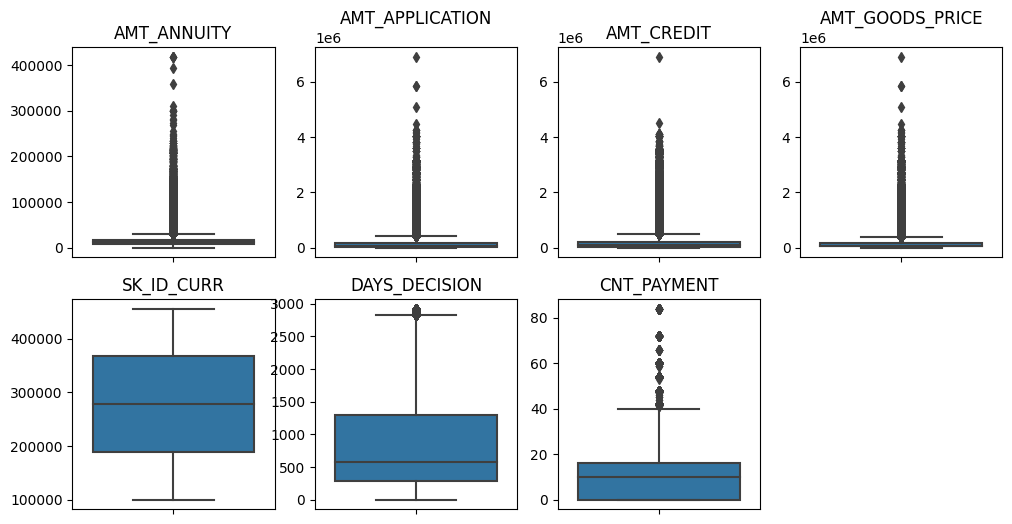

In [67]:
# Now, let's see the outliers in previous_dtf
outliers_prev=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
plt.figure(figsize=(12,6))
for i in enumerate(outliers_prev):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=previous_dtf[i[1]])
    plt.title(i[1])
    plt.ylabel("")

It can be seen that in previous application data
* AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE have huge number of outliers.
* CNT_PAYMENT has few outlier values.
* SK_ID_CURR is an ID column and hence no outliers.
* DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back

In [68]:
# Their statistical summary can be seen as below
previous_dtf[outliers_prev].describe()

AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE    SK_ID_CURR  DAYS_DECISION   CNT_PAYMENT
count  1.670214e+06     1.670214e+06  1.670213e+06     1.670214e+06  1.670214e+06   1.670214e+06  1.670214e+06
mean   1.490651e+04     1.752339e+05  1.961140e+05     1.856429e+05  2.783572e+05   8.806797e+02  1.247621e+01
std    1.317751e+04     2.927798e+05  3.185746e+05     2.871413e+05  1.028148e+05   7.790997e+02  1.447588e+01
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00  1.000010e+05   1.000000e+00  0.000000e+00
25%    7.547096e+03     1.872000e+04  2.416050e+04     4.500000e+04  1.893290e+05   2.800000e+02  0.000000e+00
50%    1.125000e+04     7.104600e+04  8.054100e+04     7.105050e+04  2.787145e+05   5.810000e+02  1.000000e+01
75%    1.682403e+04     1.803600e+05  2.164185e+05     1.804050e+05  3.675140e+05   1.300000e+03  1.600000e+01
max    4.180581e+05     6.905160e+06  6.905160e+06     6.905160e+06  4.562550e+05   2.922000e+03  8.400000e+01

In [69]:
# For ease of analysis, we'll check the count of unique values and group some numerical columns into bins
application_dtf.nunique()

SK_ID_CURR                     307481
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                        7
AMT_INCOME_TOTAL                 2542
AMT_CREDIT                       5602
AMT_ANNUITY                     13670
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
OCCUPATION_TYPE                    19
CNT_FAM_MEMBERS                     8
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
WEEKDAY_APPR_PROCESS_START          7
HOUR_APPR_PR

In [70]:

# Creating bins for income amount
application_dtf['AMT_INCOME_TOTAL']=application_dtf['AMT_INCOME_TOTAL']/100000

index = [0,1,2,3,4,5,6,7,8,9,10,11]
bins = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

application_dtf['AMT_INCOME_RANGE']=pd.cut(application_dtf['AMT_INCOME_TOTAL'],index,labels=bins)

In [71]:
application_dtf['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735213
200k-300k    21.210839
0-100K       20.729485
300k-400k     4.775791
400k-500k     1.744788
500k-600k     0.356378
600k-700k     0.282824
800k-900k     0.096987
700k-800k     0.052724
900k-1M       0.009113
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

About 50% of people have total income in the range 100k-200k

In [72]:
# Creating bins for credit amt.
application_dtf['AMT_CREDIT']=application_dtf['AMT_CREDIT']/100000

index = [0,1,2,3,4,5,6,7,8,9,10,100]
bins = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

application_dtf['AMT_CREDIT_RANGE']=pd.cut(application_dtf['AMT_CREDIT'],bins=index,labels=bins)

In [73]:
application_dtf['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.825166
1M Above     16.254012
500k-600k    11.132070
400k-500k    10.418530
100K-200K     9.800931
300k-400k     8.565733
600k-700k     7.820321
800k-900k     7.086617
700k-800k     6.241036
900k-1M       2.903269
0-100K        1.952316
Name: AMT_CREDIT_RANGE, dtype: float64

About 16% of people have taken a loan of above 1 million.

In [74]:
# Creating bins for Age
application_dtf['AGE'] = application_dtf['DAYS_BIRTH'] // 365
index = [0,20,30,40,50,100]
bins = ['0-20','20-30','30-40','40-50','50 above']

application_dtf['AGE_GROUP']=pd.cut(application_dtf['AGE'],bins=index,labels=bins)

In [75]:
application_dtf['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.606181
30-40       27.028987
40-50       24.193040
20-30       17.171468
0-20         0.000325
Name: AGE_GROUP, dtype: float64

More than 30% of loan applicants are above 50years of age

In [76]:
# Creating bins for Employement Time
application_dtf['YEARS_EMPLOYED'] = application_dtf['DAYS_EMPLOYED'] // 365
index = [0,5,10,20,30,40,50,60,150]
bins = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

application_dtf['EMPLOYMENT_YEAR']=pd.cut(application_dtf['YEARS_EMPLOYED'],bins=index,labels=bins)

In [77]:
application_dtf['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.581870
5-10        24.966995
10-20       14.564601
20-30        3.749643
30-40        1.058838
40-50        0.078053
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

As we can see, more than 50% of applicants have less than 5 years of experience and about 24% of applicants have 5-10 years of experience.

In [78]:
application_dtf[application_dtf['EMPLOYMENT_YEAR']=='5-10']['TARGET'].value_counts(normalize=True)*100

0    92.979385
1     7.020615
Name: TARGET, dtype: float64

Out of the applicants having 5-10 years of experience, 92% of them faced no difficulty repaying the loan. This maybe due to a stable income after 5 years of employement.

In [79]:
#Let's check the dtypes of the cols
application_dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307481 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307481 non-null  int64   
 1   TARGET                       307481 non-null  int64   
 2   NAME_CONTRACT_TYPE           307481 non-null  object  
 3   CODE_GENDER                  307481 non-null  object  
 4   FLAG_OWN_CAR                 307481 non-null  object  
 5   FLAG_OWN_REALTY              307481 non-null  object  
 6   CNT_CHILDREN                 307481 non-null  int64   
 7   AMT_INCOME_TOTAL             307481 non-null  float64 
 8   AMT_CREDIT                   307481 non-null  float64 
 9   AMT_ANNUITY                  307481 non-null  float64 
 10  AMT_GOODS_PRICE              307481 non-null  float64 
 11  NAME_TYPE_SUITE              307481 non-null  object  
 12  NAME_INCOME_TYPE             307481 non-null

In [80]:
# From the number of unique values and dtypes of each columns, we see there are certain object and numerical columns which needs to be converted to categorical
cat_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in cat_cols:
    application_dtf[col] =pd.Categorical(application_dtf[col])

In [81]:
# Checking the info of application_dtf
application_dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307481 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307481 non-null  int64   
 1   TARGET                       307481 non-null  int64   
 2   NAME_CONTRACT_TYPE           307481 non-null  category
 3   CODE_GENDER                  307481 non-null  category
 4   FLAG_OWN_CAR                 307481 non-null  category
 5   FLAG_OWN_REALTY              307481 non-null  category
 6   CNT_CHILDREN                 307481 non-null  int64   
 7   AMT_INCOME_TOTAL             307481 non-null  float64 
 8   AMT_CREDIT                   307481 non-null  float64 
 9   AMT_ANNUITY                  307481 non-null  float64 
 10  AMT_GOODS_PRICE              307481 non-null  float64 
 11  NAME_TYPE_SUITE              307481 non-null  category
 12  NAME_INCOME_TYPE             307481 non-null

## **Data Visualization and Analysis**

The flow of the analysis will be:
1. Imbalance analysis
2. Categorical variables analysis
    * Univariate analysis
    * Bi/Multivariate analysis
3. Numerical variables analysis
    * Univariate analysis
    * Bi/Multivariate analysis
4. Merged data analysis

Since there are many columns, we'll design some plotting functions to enable us plot the different columns easily

In [82]:
import os  # Import the os module to manage files and directories

def univariate_categorical(feature, ylog=False, label_rotation=False, horizontal_layout=True, save_path=None):
    """
    Generate countplots and percentages of defaulters for a univariate categorical analysis.

    Parameters:
    - feature (str): The categorical column name to analyze.
    - ylog (bool, optional): Whether to use a log scale for the y-axis in the count plot. Default is False.
    - label_rotation (bool, optional): Whether to rotate the x-axis labels for better readability. Default is False.
    - horizontal_layout (bool, optional): Whether to arrange subplots horizontally (True) or vertically (False). Default is True.
    - save_path (str, optional): The directory path where you want to save the generated images. Default is None (no saving).

    This function creates two subplots:
    1. A count plot of the specified categorical column with respect to the 'TARGET' variable.
    2. A bar plot showing the percentage of defaulters within each category of the column.

    The count plot visualizes the distribution of 'TARGET' (repayer vs. defaulter) within each category of the specified column.
    The bar plot displays the percentage of defaulters for each category, sorted in descending order.

    If ylog is set to True, the count plot uses a log scale for the y-axis for improved visibility.

    If label_rotation is set to True, the x-axis labels are rotated for better readability.

    Note: This function assumes that the DataFrame 'application_dtf' is in the global scope.

    Returns:
    None. The function displays the generated plots and, if specified, saves them as image files.
    """

    temp = application_dtf[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Count': temp.values})

    # Calculate the percentage of target=1 per category value
    category_perc = application_dtf[[feature, 'TARGET']].groupby([feature], as_index=False).mean()
    category_perc["TARGET"] = category_perc["TARGET"] * 100
    category_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if horizontal_layout:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 25))

    # 1. Subplot 1: Count plot of categorical column
    s = sns.countplot(ax=ax1,
                      x=feature,
                      data=application_dtf,
                      hue="TARGET",
                      order=category_perc[feature],
                      palette=['gold', 'magenta'])

    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize': 10, 'fontweight': 3, 'color': 'teal'})
    ax1.legend(['Repayer', 'Defaulter'])

    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)", fontdict={'fontsize': 10, 'fontweight': 3, 'color': 'teal'})

    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)

    # Save the first subplot as an image if save_path is provided
    if save_path:
        image_filename1 = os.path.join(save_path, f'{feature}_subplot1.png')
        plt.savefig(image_filename1)

    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2,
                    x=feature,
                    y='TARGET',
                    order=category_perc[feature],
                    data=category_perc,
                    palette='Set3')

    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize': 10, 'fontweight': 5, 'color': 'teal'})

    # Save the second subplot as an image if save_path is provided
    if save_path:
        image_filename2 = os.path.join(save_path, f'{feature}_subplot2.png')
        plt.savefig(image_filename2)

    # Display the plots
    plt.show()




In [83]:
def univariate_numerical(data,target_col,feature, figsize=(12, 6), bins=None, save_path=None):
    """
    Generate univariate analysis plots for a specified numerical feature with respect to the 'TARGET' column.

    Parameters:
    - data (DataFrame): The DataFrame containing the data to be analyzed.
    - target_col (str): The name of the 'TARGET' column that you are trying to predict.
    - feature (str): The name of the numerical feature to analyze.
    - figsize (tuple, optional): A tuple specifying the width and height of the figure. Default is (12, 6).
    - bins (int, optional): Number of bins for the histogram (applicable for numerical columns). Default is None.
    - save_path (str, optional): The directory path where images will be saved. Default is None (no image saving).

    This function creates univariate analysis plots for the specified numerical feature with respect to the 'TARGET' column.
    It includes:
    - Histogram for the specified feature (with color differentiation for 'TARGET' values).
    - Box plot for the specified feature (showing quartiles and outliers).

    The 'figsize' parameter controls the size of the generated plots, and 'bins' specifies the number of bins for the histogram.

    If 'save_path' is provided, the function will save the images of the subplots in the specified directory.

    Returns:
    None. The function displays the generated univariate analysis plots.

    Example:
    univariate_numerical(my_dataframe, 'TARGET', 'income', figsize=(10, 5), bins=20, save_path='/content/images')
    """
    if feature not in application_dtf.columns:
        raise ValueError(f"'{feature}' does not exist in the DataFrame.")
    target_col='TARGET'
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    # Histogram
    sns.histplot(data=data, x=feature, hue=target_col, bins=bins, kde=True, ax=ax1, palette=['g', 'r'])
    ax1.set_title(f'{feature} Distribution')

    # Box plot
    sns.boxplot(data=data, x=target_col, y=feature, ax=ax2, palette=['brown', 'red'])
    ax2.set_title(f'{feature} vs {target_col}')

    plt.tight_layout()

    # Save images if 'save_path' is provided
    if save_path:
        image_filename = f'univariate_numerical_{feature}.png'
        image_path = os.path.join(save_path, image_filename)
        plt.savefig(image_path)
        print(f"Saved image to {image_path}")

    plt.show()


In [84]:
def bivariate_categorical(x, y, df, hue, figsize, save_path=None):
    """
    Generate a bivariate bar plot to visualize relationships between two categorical variables.

    Parameters:
    - x (str): The column name for the x-axis (categorical variable).
    - y (str): The column name for the y-axis (categorical variable).
    - df (DataFrame): The DataFrame containing the data to be plotted.
    - hue (str): The column name to be used for grouping and coloring the data.
    - figsize (tuple): A tuple specifying the width and height of the figure (e.g., (12, 6)).
    - save_path (str, optional): The directory path where the plot image will be saved. Default is None (no image saving).

    This function creates a bivariate bar plot to visualize the relationship between two categorical variables 'x' and 'y'.
    The 'hue' parameter is used to group and color the data points, typically representing different categories or classes.

    The plot displays bars for each combination of 'x' and 'y' values, with bars colored according to the 'hue' variable.
    It is particularly useful for comparing the distribution of 'x' and 'y' within different groups represented by 'hue'.

    Labels, titles, and legends are defined for the plot to provide clear visual context. The x-axis labels are rotated
    for better readability.

    If 'save_path' is provided, the function will save the plot image in the specified directory.

    Returns:
    None. The function displays the generated bivariate bar plot.

    Example:
    bivariate_categorical('Category1', 'Category2', my_dataframe, 'TARGET', (12, 6), save_path='/content/images')
    """

    plt.figure(figsize=figsize)
    sns.barplot(x=x, y=y, data=df, hue=hue, palette=['lime', 'blue'])

    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x, fontdict={'fontsize': 10, 'fontweight': 3, 'color': 'Black'})
    plt.ylabel(y, fontdict={'fontsize': 10, 'fontweight': 3, 'color': 'Black'})
    plt.title(f'Analysis of {x} and {y} with TARGET', fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Black'})
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels=['Repayer', 'Defaulter'])

    # Save the plot image if 'save_path' is provided
    if save_path:
        image_filename = f'bivariate_categorical_{x}_{y}.png'
        image_path = os.path.join(save_path, image_filename)
        plt.savefig(image_path)
        print(f"Saved image to {image_path}")

    plt.show()


In [85]:
def bivariate_numerical(x, y, data, hue, kind, palette, legend, figsize, save_path=None):
    """
    Generate a bivariate numerical plot to visualize relationships between two numerical variables.

    Parameters:
    - x (str): The column name for the x-axis (numerical variable).
    - y (str): The column name for the y-axis (numerical variable).
    - data (DataFrame): The DataFrame containing the data to be plotted.
    - hue (str): The column name to be used for grouping and coloring the data.
    - kind (str): The type of bivariate numerical plot to create (e.g., 'scatter', 'line', 'reg', etc.).
    - palette (list or str): The color palette to use for plotting data points.
    - legend (bool): Whether to display a legend for the 'hue' variable. True to display, False to hide.
    - figsize (tuple): A tuple specifying the width and height of the figure (e.g., (12, 6)).
    - save_path (str, optional): The directory path where the plot image will be saved. Default is None (no image saving).

    This function creates a bivariate numerical plot to visualize the relationship between two numerical variables 'x' and 'y'.
    The 'hue' parameter is used to group and color the data points, typically representing different categories or classes.

    The plot type is determined by the 'kind' parameter, and available options include 'scatter', 'line', 'reg' (regression), etc.

    Labels, titles, and legends are defined for the plot to provide clear visual context. The x-axis labels are rotated
    for better readability.

    If 'save_path' is provided, the function will save the plot image in the specified directory.

    Returns:
    None. The function displays the generated bivariate numerical plot.
    """

    plt.figure(figsize=figsize)
    plot = sns.relplot(x=x, y=y, data=data, hue=hue, kind=kind, palette=palette, legend=legend)

    # Define aesthetics
    plt.xticks(rotation=90, ha='right')
    plt.legend(['Repayer', 'Defaulter'])
    plt.title(f'Bivariate Numerical Plot: {x} vs {y}', fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Black'})

    # Save the plot image if 'save_path' is provided
    if save_path:
        image_filename = f'bivariate_numerical_{x}_{y}.png'
        image_path = os.path.join(save_path, image_filename)
        plot.savefig(image_path)
        print(f"Saved image to {image_path}")

    plt.show()


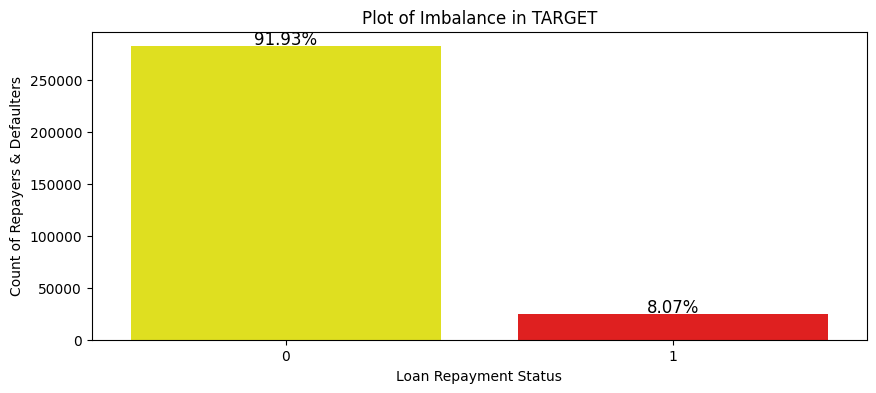

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the imbalance
imbalance = application_dtf["TARGET"].value_counts().reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 4))
ax = sns.barplot(x="index", y="TARGET", data=imbalance, palette=['yellow', 'red'])

# Add percentages to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height() / len(application_dtf) * 100:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set axis labels and title
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Plot of Imbalance in TARGET")

# Show the plot
plt.show()


In the application_dtf, the 'TARGET' feature has 91.93% of non-defaulters and 8.07% of defaulters.

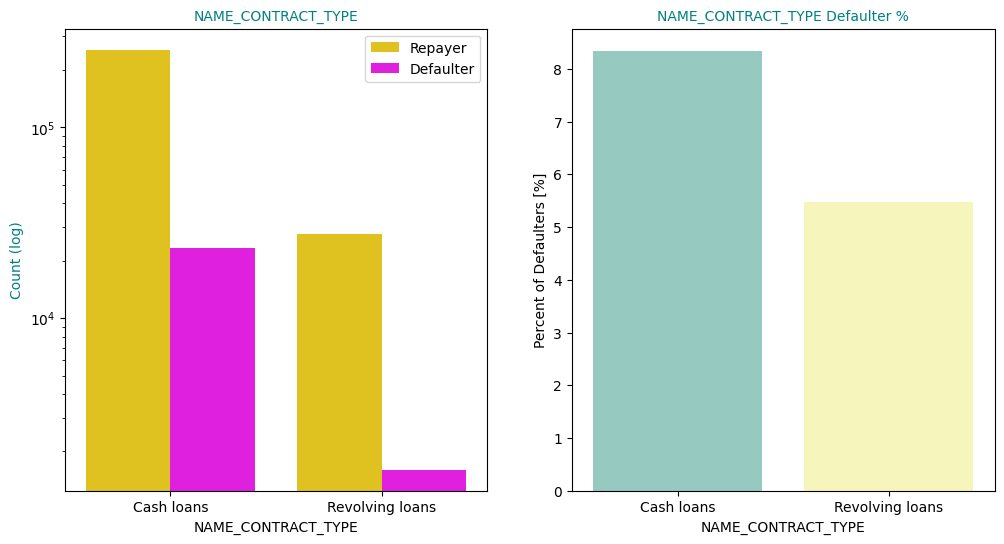

In [87]:
# Now we'll do the analysis for each categorical variable
univariate_categorical('NAME_CONTRACT_TYPE',True,save_path='images/')

### **Insights**

When considering contract types, it's notable that revolving loans constitute a relatively small portion (10%) of the overall loan portfolio. However, it's important to highlight that a disproportionately higher number of revolving loans, compared to their frequency, remain unpaid.

Possible reasons:

1. Higher Risk Profile: Revolving loans may attract applicants with a higher risk profile. These applicants might have less stable financial situations, lower credit scores, or a history of financial challenges, making them more likely to default on loans.

2. Loan Terms: The terms and conditions of revolving loans, such as variable interest rates or open-ended repayment structures, can make them more complex and potentially riskier for borrowers. Borrowers may struggle to manage payments effectively under such terms.

3. Purpose of Loans: The purpose for which revolving loans are typically used may also contribute to higher default rates. For example, individuals using revolving loans for non-essential purchases or debt consolidation may face challenges in repaying.

4. Lack of Collateral: Unlike some other loan types that may be secured by collateral, revolving loans are often unsecured. This lack of collateral means that lenders have less recourse if borrowers default, potentially resulting in higher default rates.

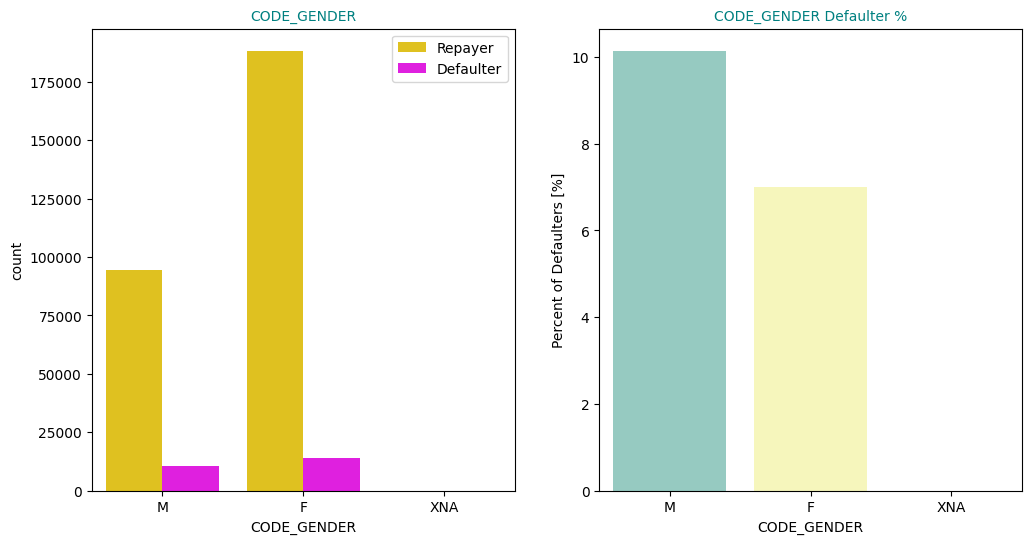

In [88]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER',save_path='images/')

### **Insights:**

Female applicants are greater compared to male applicants. Also, there are larger number of female repayers. On the other hand, percentage of defaulters is more for men.

Possible reasons:

1. Application Rate: There may be a higher number of female applicants due to demographic trends or the nature of the loan market, where women are more likely to seek loans for various purposes, such as education, healthcare, or family-related expenses.

2. Financial Behavior: Female applicants may exhibit more conservative financial behavior, leading to a higher likelihood of loan repayment. This behavior could include better budgeting, lower risk tolerance, or a focus on financial stability.

3. Income Disparities: Income disparities between genders may contribute to differences in repayment rates. If male applicants have higher incomes on average, they might have more resources to meet loan repayment obligations.

4. Credit History: Female applicants may have more favorable credit histories, leading to better loan approval rates and lower default percentages. Credit history significantly influences loan approval and interest rates.

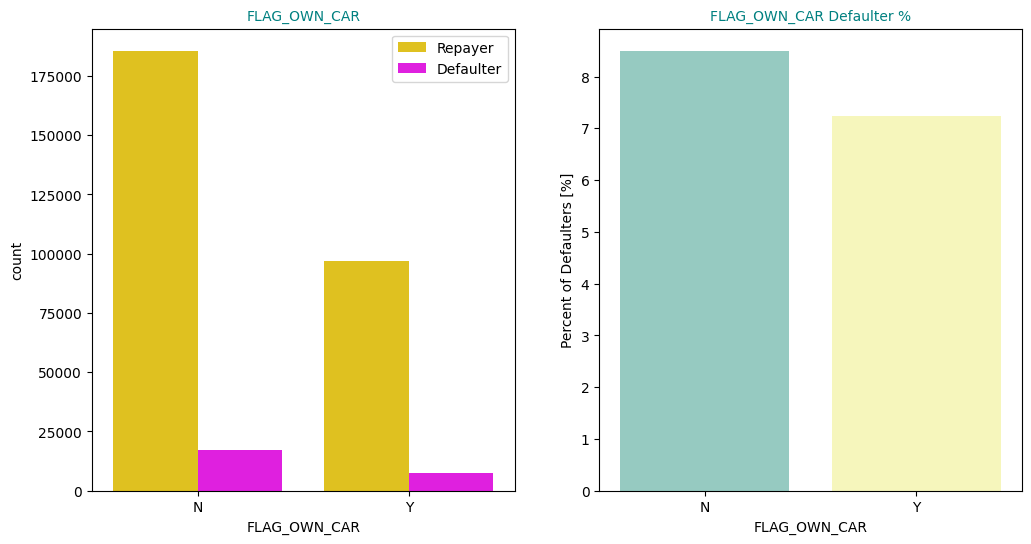

In [89]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR',save_path='images/')

### **Insights:**

We can see that applicants who own a car have lesser chance of defaulting a loan compared to car owners.Owning a car often indicates a certain level of financial stability. It suggests that the applicant has the means to purchase and maintain a vehicle, which may be correlated with a more stable financial situation.

Possible reasons:

1. Financial Stability: Car ownership often signifies a level of financial stability. It implies that the applicant has the financial means to not only purchase a vehicle but also cover associated costs like maintenance, fuel, and insurance. This financial stability can make loan repayment more manageable.

2. Stable Employment: Car owners may be more likely to have stable employment or a reliable source of income, which enhances their ability to meet loan repayment obligations consistently.

3. Creditworthiness: Car owners may have established a positive credit history, demonstrating their ability to manage financial responsibilities. Lenders often consider an applicant's creditworthiness when approving loans, and a strong credit history is associated with a lower default risk.

4. Collateral Value: In some cases, a car can serve as collateral for a loan, reducing the lender's risk. If a borrower defaults, the lender may have the option to repossess the vehicle, mitigating potential losses.

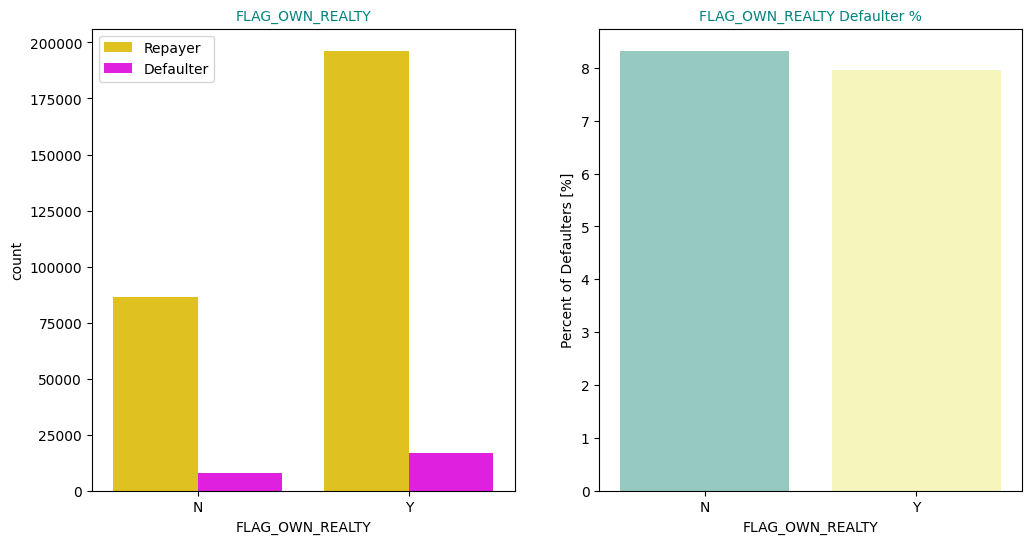

In [90]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY',save_path='images/')

### **Insights:**

The lack of a significant difference in default rates between clients who own real estate and those who don't may be attributed to the fact that clients who own real estate may have diverse financial backgrounds. While property ownership suggests asset ownership and stability, other financial factors, such as income, credit history, and debt levels, may play a more significant role in loan repayment behavior.

Possible reasons:

1. Diverse Financial Profiles: Clients who own real estate may have diverse financial backgrounds. While property ownership suggests asset ownership and potential financial stability, other financial factors, such as income, credit history, and debt levels, can vary significantly among property owners. These variations can influence an individual's ability to meet loan repayment obligations.

2. Income Disparities: Income levels among clients who own real estate may differ substantially. Some property owners may have high incomes, while others may have more modest earnings. Income stability and adequacy are critical factors affecting loan repayment capacity.

3. Credit History: Credit histories can vary widely among clients, irrespective of real estate ownership. A strong credit history, characterized by timely payments and responsible credit use, is a key indicator of loan repayment reliability. Some property owners may have excellent credit, while others may not.

4. Debt Levels: Existing debt obligations, including mortgages and other loans, can impact an applicant's ability to manage additional credit. Property owners may carry varying levels of debt, and high debt-to-income ratios can increase the risk of loan default.

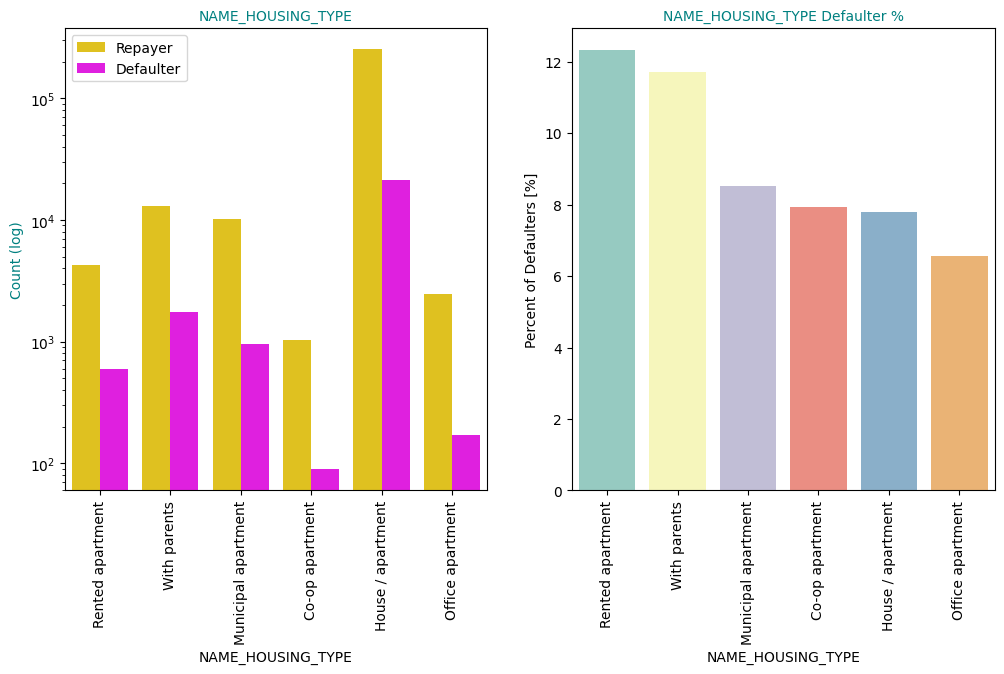

In [91]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True,save_path='images/')

### **Insights:**

* The majority of individuals reside in houses or apartments.
* Residents of office apartments exhibit the lowest default rates.
* Individuals living with their parents (approximately 11.5%) and those residing in rented apartments (over 12%) have a higher likelihood of loan defaults.

**Possible Reasons:**

1. Housing Preference: The prevalence of people living in houses or apartments could be attributed to their housing preferences and availability. This may reflect a diverse range of housing options in the market.

2. Office Apartment Stability: Lower default rates among residents of office apartments might stem from factors such as stable employment or income levels. These individuals may have reliable jobs or financial situations.

3. Parental Support: Individuals living with their parents may face higher default rates due to various factors, including financial dependence, limited income, or a lack of credit history. Additionally, some may prioritize other expenses over loan repayments.

4. Rental Challenges: Higher default rates among those residing in rented apartments could be linked to factors such as rental costs, job instability, or a higher likelihood of frequent relocation, making consistent loan payments more challenging.

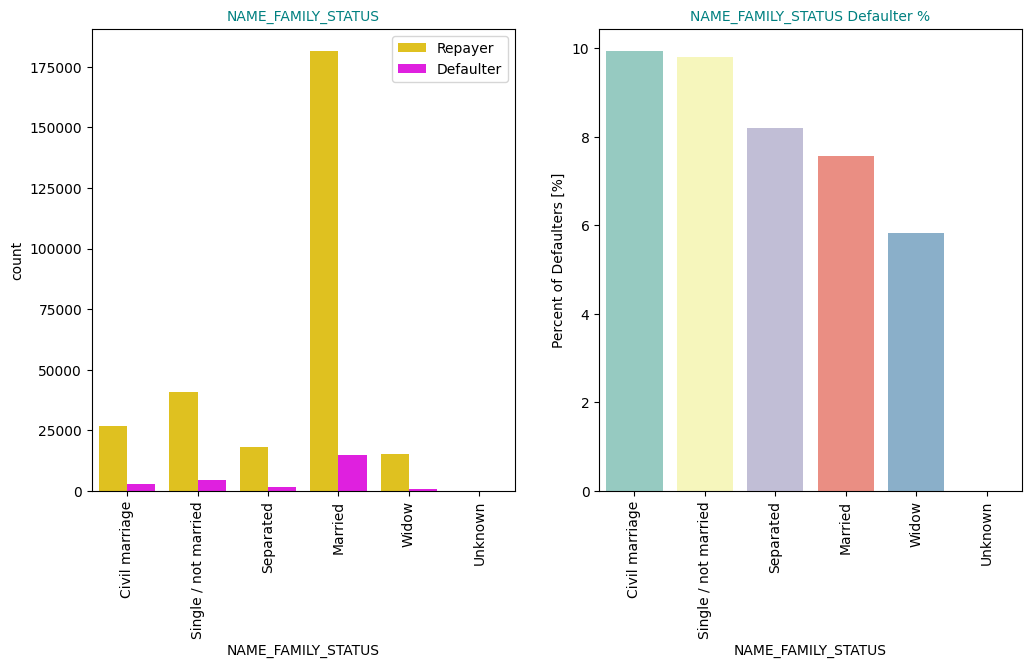

In [92]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True,save_path='images/')

### **Insights:**

* The majority of loan applicants are married, followed by those who are single/not married and in civil marriages.

* When considering the percentage of loan defaults, applicants in civil marriages have the highest rate of non-repayment at 10%, while widows exhibit the lowest default rate (with the exception of the "Unknown" category).

Possible Reasons:

1. Marital Status Prevalence: The prevalence of married applicants suggests that a significant portion of the population may be seeking loans for various purposes, including family-related expenses, home purchases, or investments. This reflects the diversity of loan applicants.

2. Civil Marriage and Default: The higher default rate among individuals in civil marriages may be influenced by financial responsibilities associated with marital life. Joint financial commitments and expenses may impact the ability to meet loan repayment obligations.

3. Widows and Financial Stability: Widows, on the other hand, may exhibit a lower default rate due to their potentially stable financial situations. This stability could arise from factors such as insurance, inheritances, or pension funds, which can provide financial security.

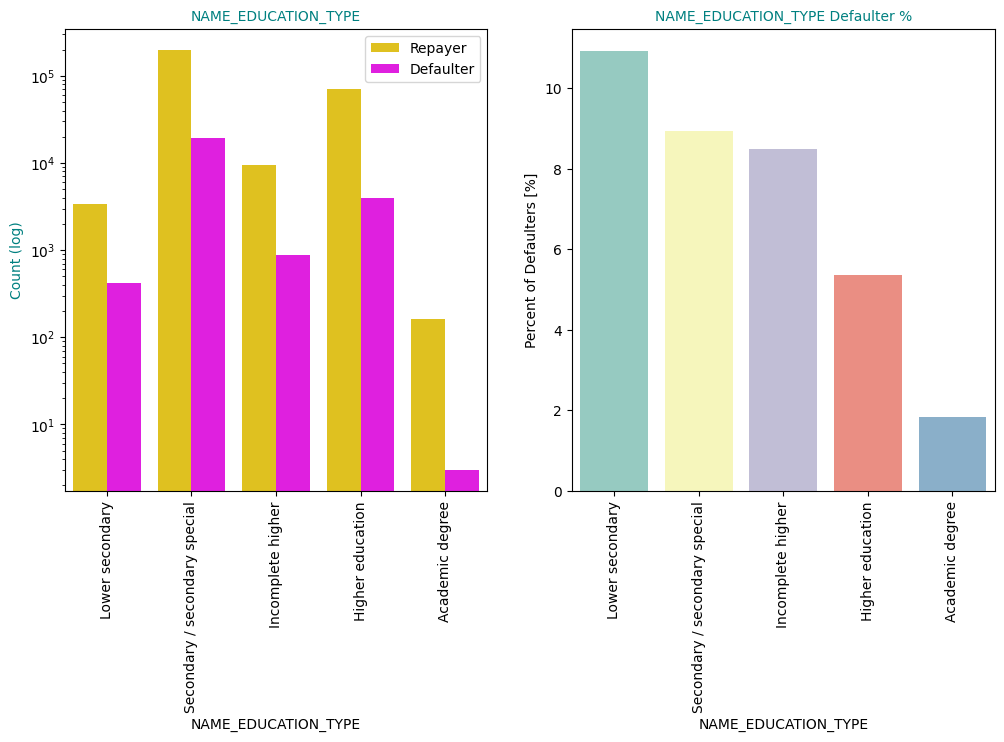

In [93]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True,save_path='images/')

### **Insights:**

* The majority of clients in the dataset hold educational qualifications at the Secondary/Secondary Special Education level, followed by those with Higher Education qualifications. However, the number of clients with Academic Degrees is notably small.

* It's noteworthy that clients with Lower Secondary education, although a minority, exhibit the highest rate of loan non-repayment at 11%. In contrast, clients with Academic Degrees display a remarkably low default rate, less than 2%.

**Possible Reasons:**

1. Educational Attainment and Income: The level of education attained can influence income potential and career opportunities. Clients with lower educational qualifications may face limited job prospects or lower income levels, making it more challenging to meet loan repayment obligations.

2. Financial Literacy: Clients with different educational backgrounds may possess varying levels of financial literacy. Those with higher education, such as Academic Degrees, may have a better understanding of financial management, budgeting, and debt repayment strategies, contributing to lower default rates.

3. Loan Purpose: The purpose for which clients seek loans can vary. Clients with Lower Secondary education may be more likely to borrow for non-essential or high-risk purposes, while those with Academic Degrees may seek loans for investments with more predictable returns.

4. Creditworthiness: Educational background can indirectly affect creditworthiness. Clients with stronger educational backgrounds may have better credit histories and higher credit scores, leading to more favorable loan terms and lower default rates.

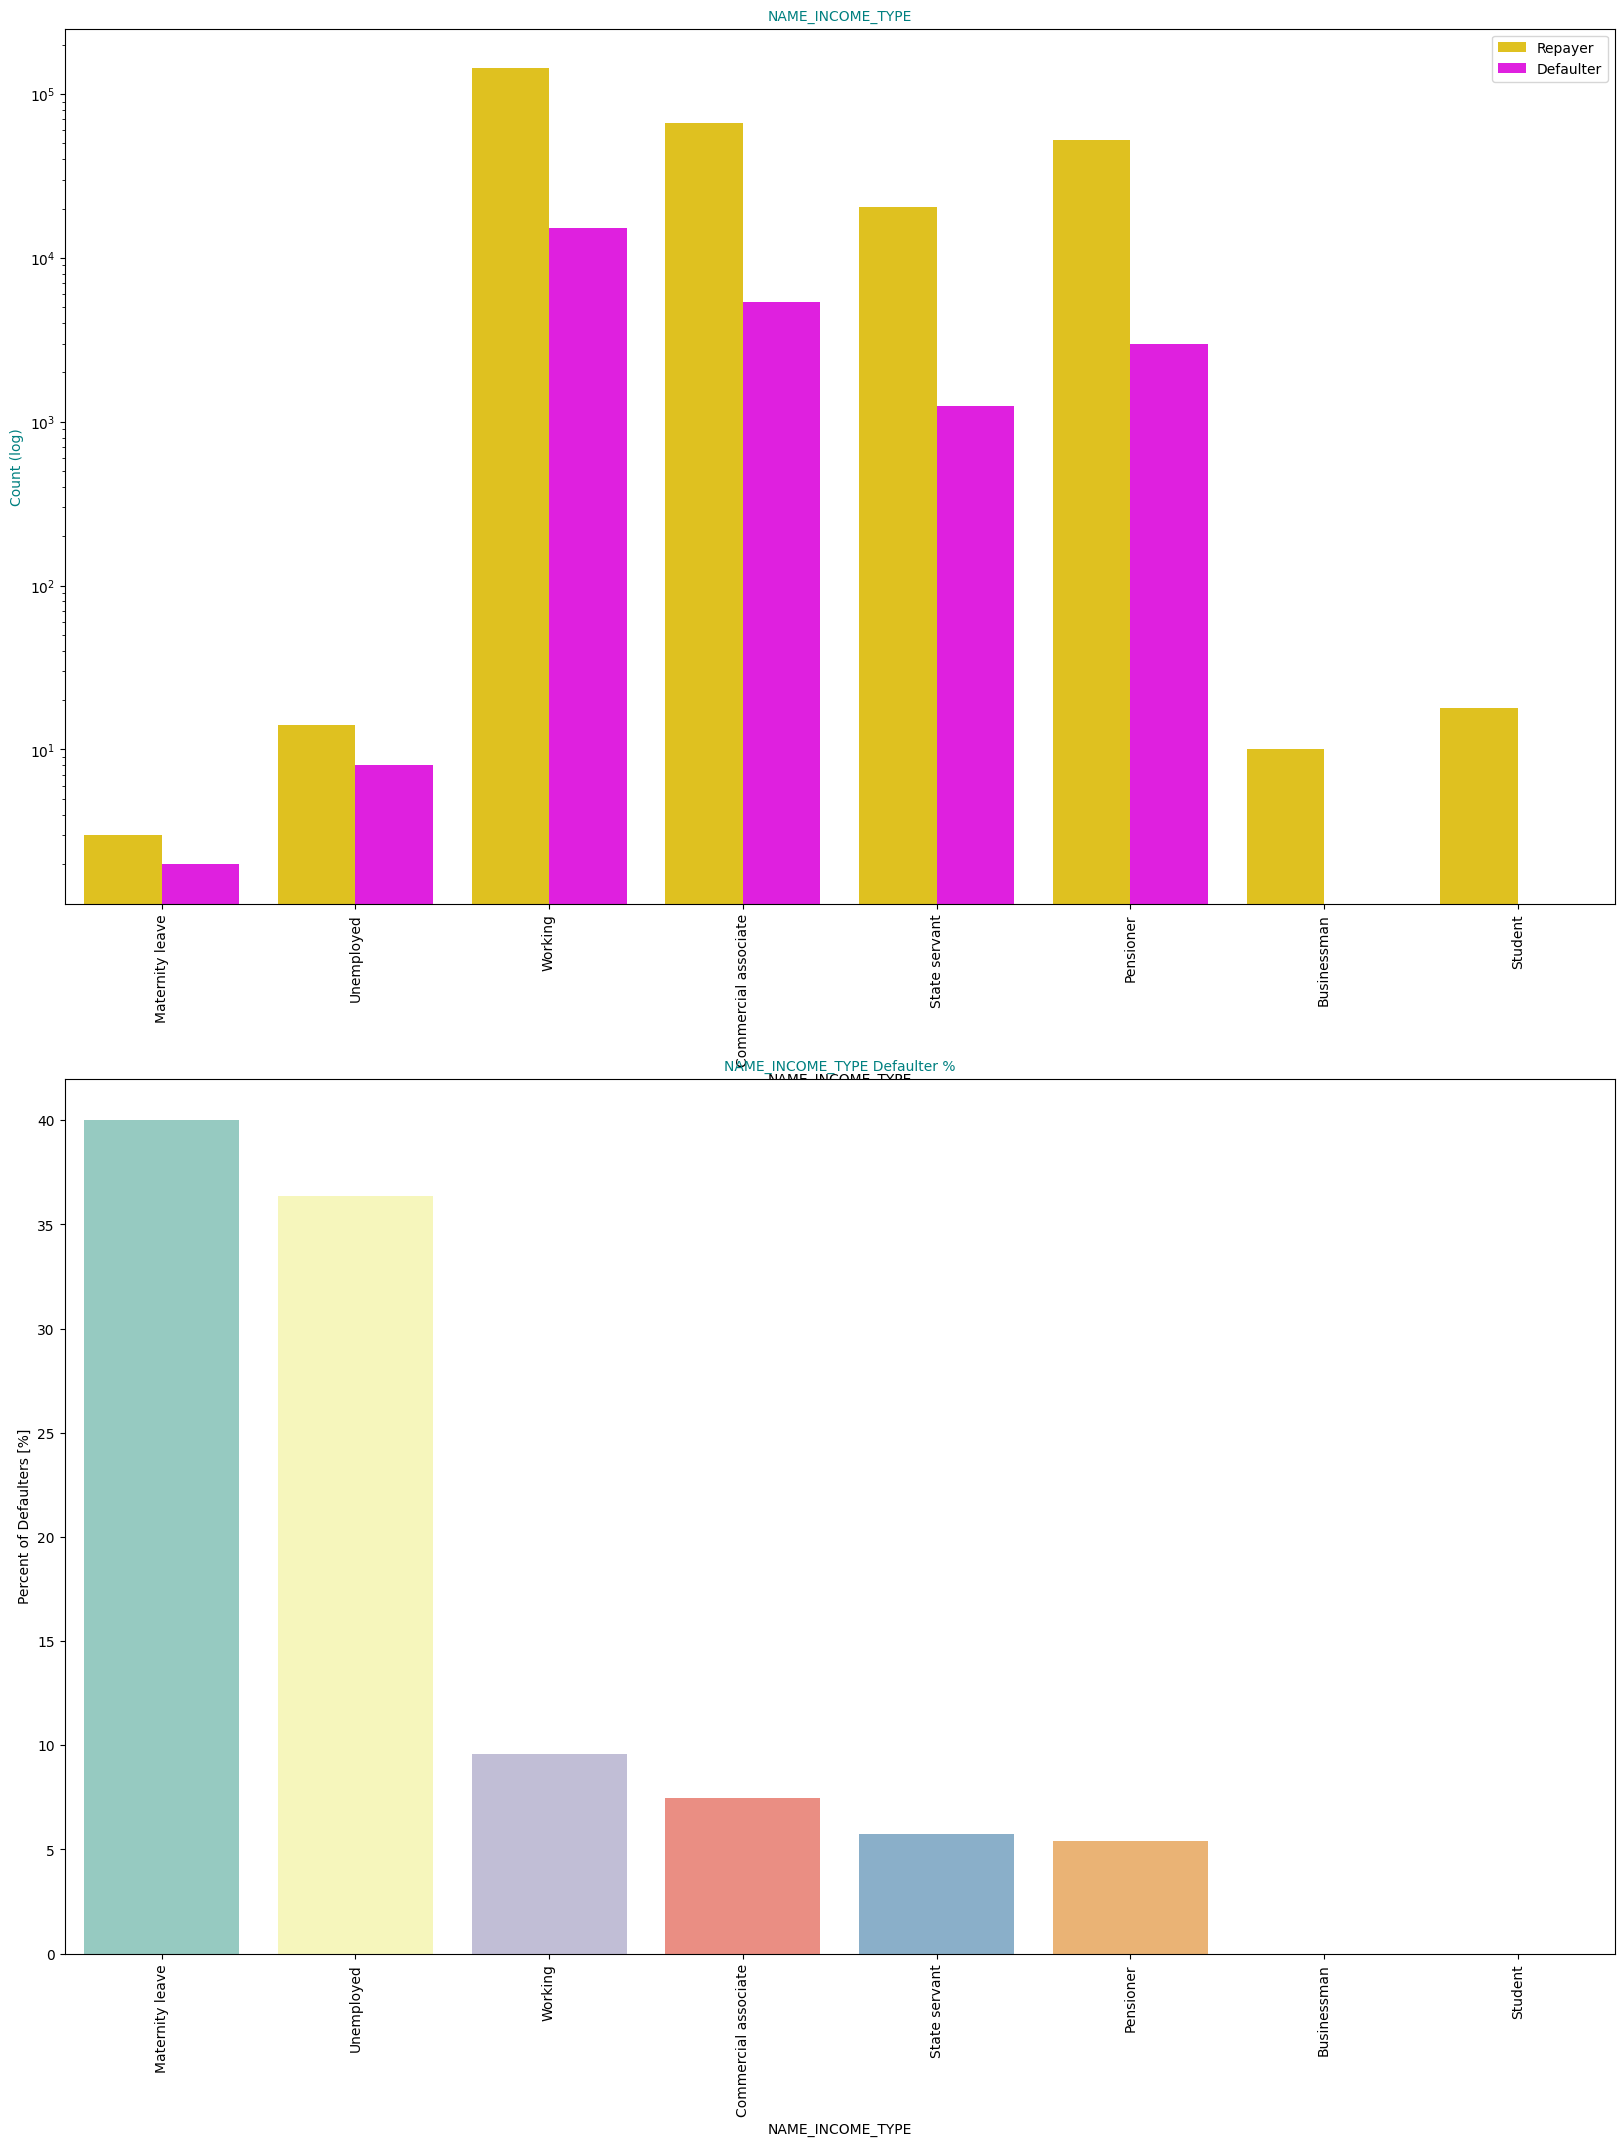

In [94]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False,save_path='images/')

### **Insights:**

* The majority of loan applicants fall into the "Working" income category, followed by "Commercial Associate," "Pensioner," and "State Servant."

* Notably, applicants with "Maternity Leave" as their income source exhibit a high non-repayment ratio of nearly 40%, closely followed by "Unemployed" individuals at 37%. In contrast, the remaining income types have default rates below the 10% average.

* "Student" and "Businessmen" applicants, despite being fewer in number, have a pristine record of zero loan defaults. Consequently, these two income categories are the most secure for loan approval.

**Possible Reasons:**

1. Income Stability: The type of income can significantly affect an applicant's ability to repay loans. "Working" individuals, "Commercial Associates," "Pensioners," and "State Servants" typically have more stable and predictable income sources, making loan repayments more manageable.

2. Vulnerability to Income Disruptions: Income types such as "Maternity Leave" and "Unemployment" are more vulnerable to income disruptions, as they often involve temporary or irregular income streams. This instability can lead to difficulties in meeting loan obligations.

3. Risk Assessment: Lenders assess an applicant's risk based on their income source, among other factors. "Student" and "Businessmen" categories may be associated with lower default risk due to their unique financial circumstances or lower financial commitments.

4. Loan Purpose: The purpose for which a loan is sought can vary among income types. "Maternity Leave" and "Unemployed" individuals may seek loans for less stable or higher-risk purposes, contributing to higher default rates.

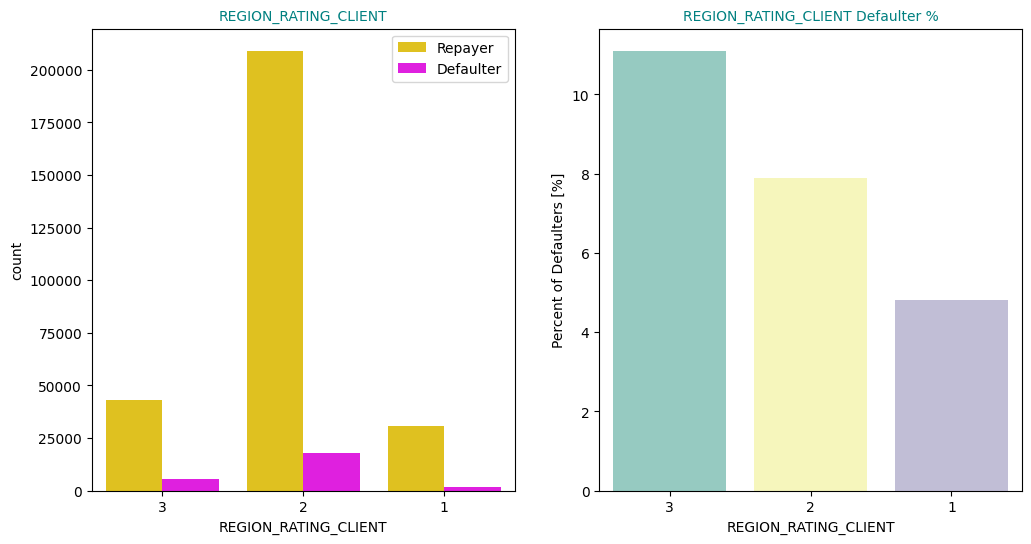

In [95]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True,save_path='images/')

### **Insights**

* The majority of loan applicants reside in areas categorized as "Region_Rating 2."

* Notably, "Region_Rating 3" stands out with the highest default rate, reaching 11%.

* Conversely, applicants living in "Region_Rating 1" exhibit the lowest likelihood of defaulting on loans, making it a safer choice for loan approval.

**Possible Reasons:**

1. Regional Economic Factors: The variation in default rates across different region ratings may be linked to regional economic conditions. "Region_Rating 3" might face economic challenges that make loan repayment more difficult for residents, while "Region_Rating 1" may enjoy more stable economic conditions.

2. Job Opportunities: Regional differences in job opportunities and income levels can impact residents' ability to repay loans. "Region_Rating 1" may offer better employment prospects and income stability, reducing the risk of loan default.

3. Housing Costs: The cost of living, including housing expenses, can vary significantly by region. Higher living costs in "Region_Rating 3" may strain residents' finances, contributing to higher default rates.

4. Access to Education: Educational attainment and financial literacy can influence loan repayment behavior. Regions with better access to education and financial resources may have lower default rates.

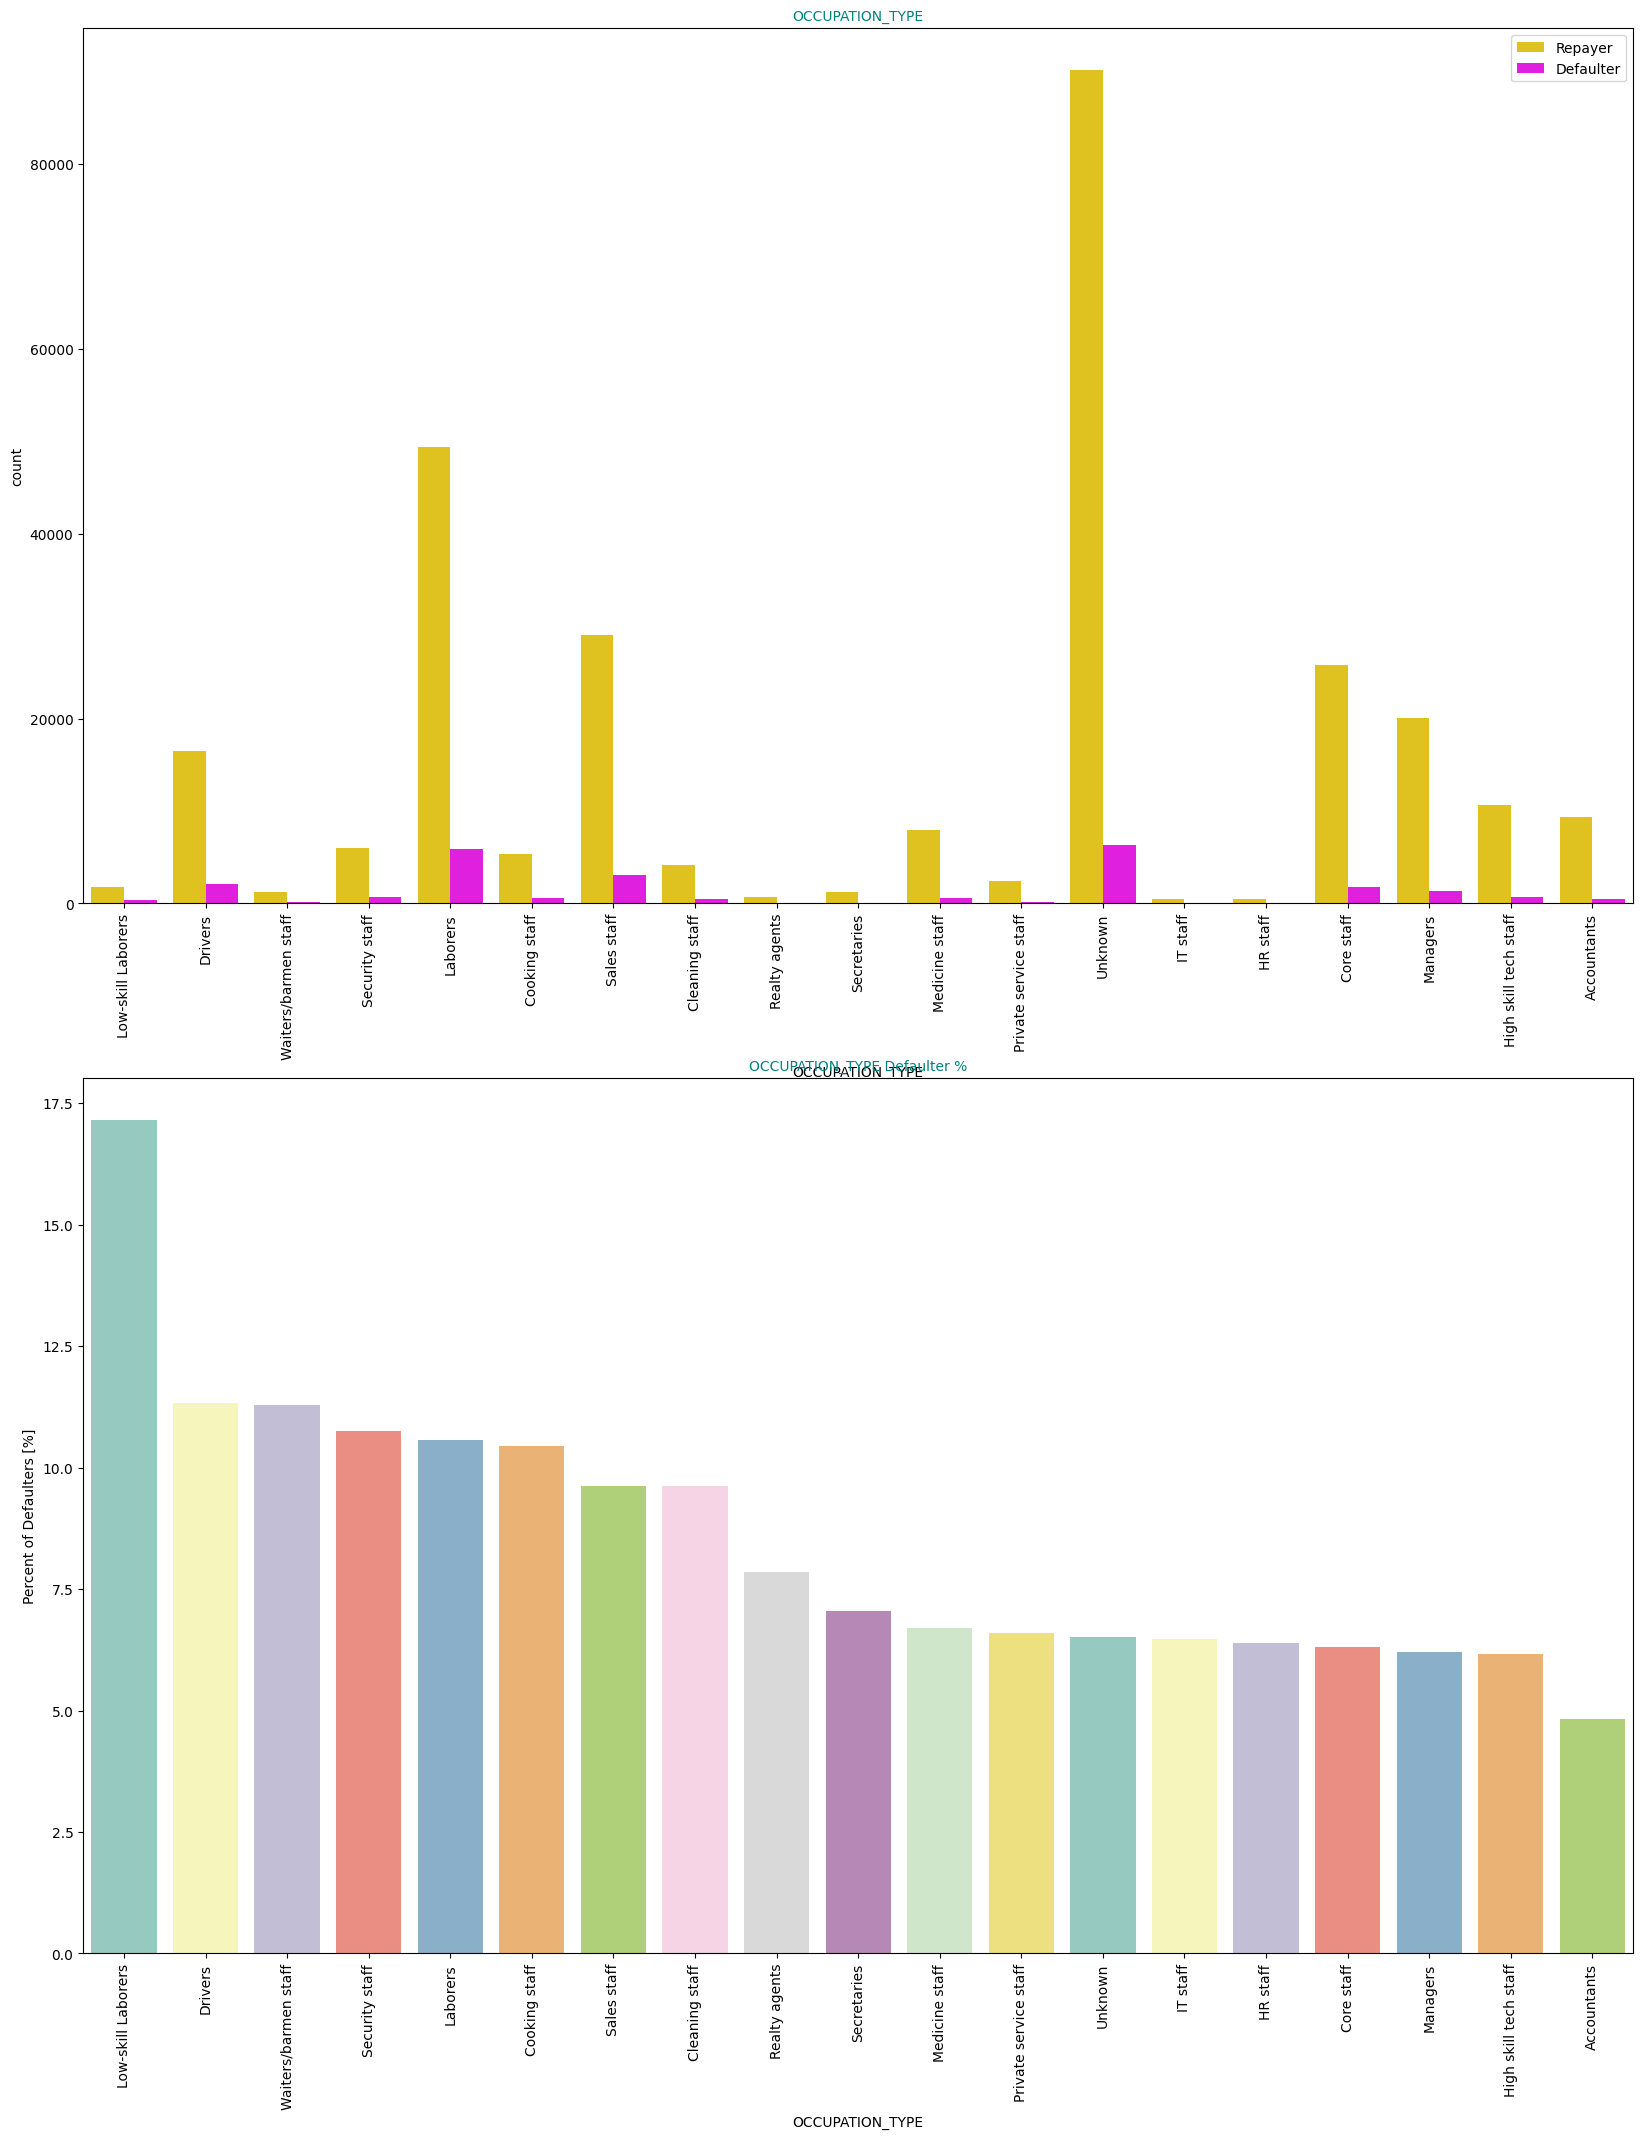

In [96]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False,save_path='images/')

### **Insights:**

* The largest share of loans is acquired by individuals in the "Laborers" profession, with "Sales Staff" being the second most common borrowers. In contrast, professionals in the IT sector take the fewest loans.

* Among different professions, "Low-skill Laborers" exhibit the highest percentage of loans that have not been repaid, surpassing 17%. This is followed by categories such as "Drivers and Waiters/Barmen Staff," "Security Staff," "Laborers," and "Cooking Staff."

**Possible Reasons:**

1. Income Disparities: Different professions can be associated with varying income levels. "Laborers," especially those in low-skilled positions, may have lower incomes, making it challenging to meet loan repayment obligations.

2. Job Stability: Job stability and security can differ across professions. Jobs with less stability or seasonal employment patterns, such as low-skill labor positions, may lead to a higher risk of loan defaults.

3. Working Conditions: Working conditions, including job stress and working hours, can impact an individual's financial stability and ability to meet financial commitments. Physically demanding or high-stress jobs may be correlated with higher default rates.

4. Educational Background: The level of education required for different professions can vary. Professions with lower educational requirements may attract individuals with limited financial literacy, potentially affecting loan repayment behavior.

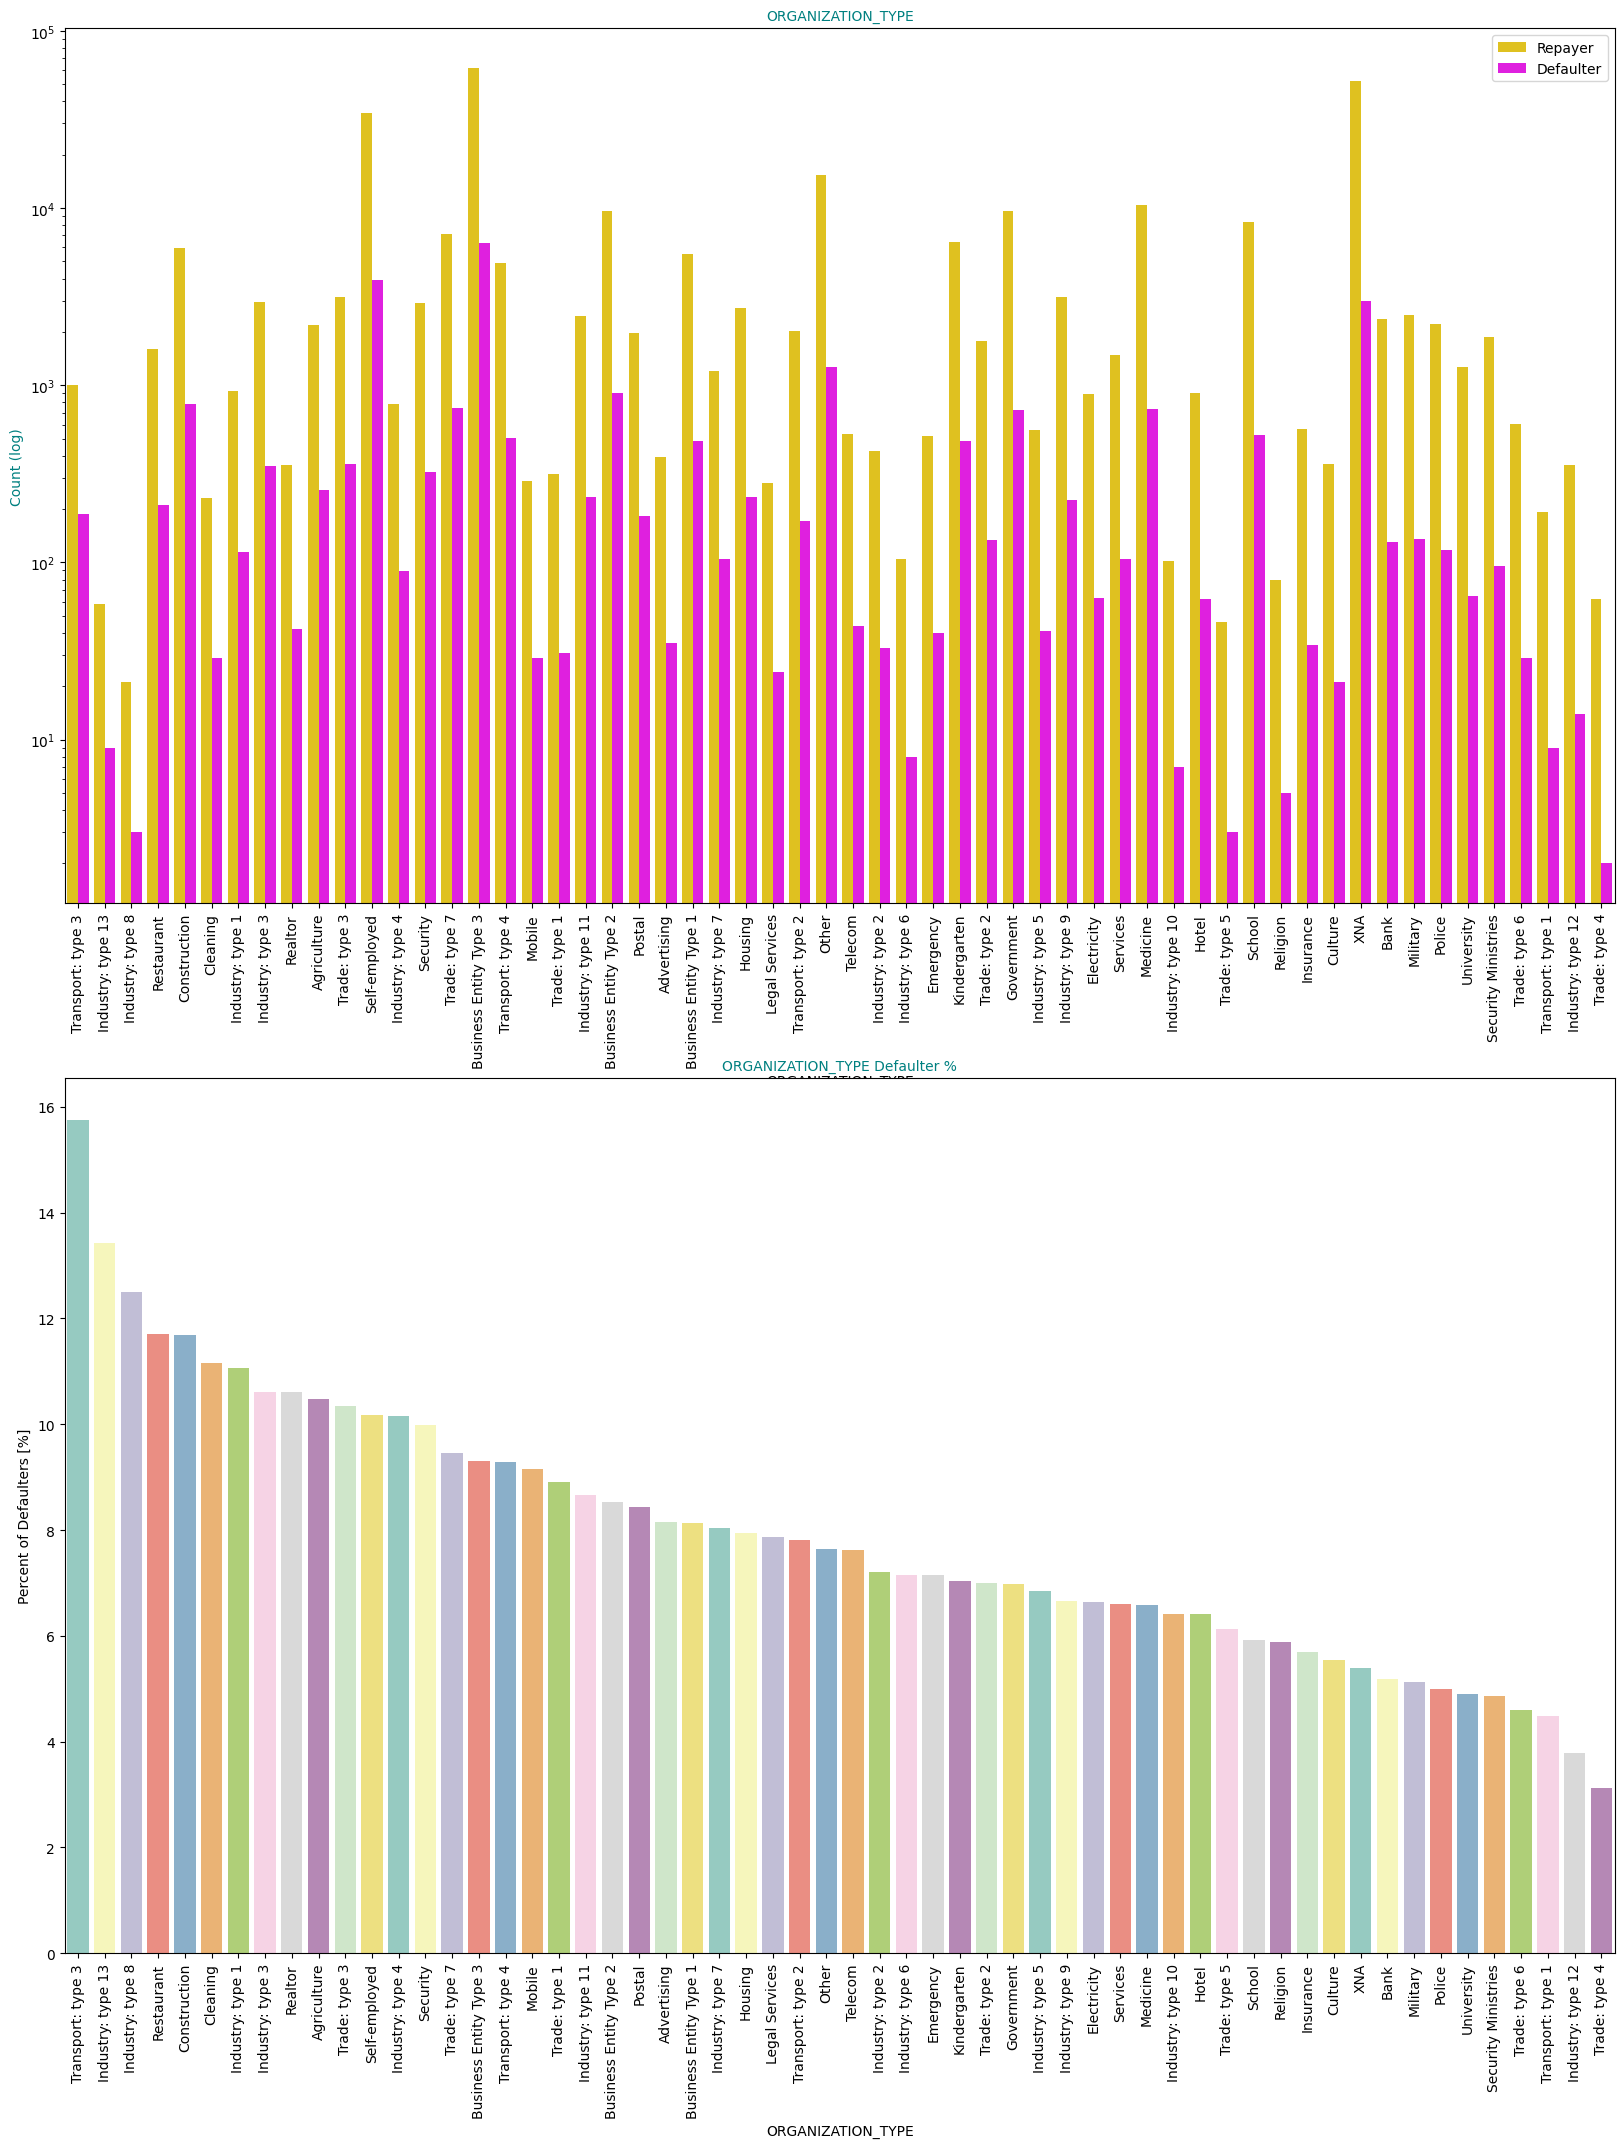

In [97]:
# Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE",True,True,False,save_path='images/')

### **Insights:**

* Organizations with the highest percentage of loans that have not been repaid include "Transport: Type 3" at 16%, followed by "Industry: Type 13" at 13.5%, "Industry: Type 8" at 12.5%, and "Restaurant" with a default rate of less than 12%. Self-employed individuals exhibit a relatively high default rate, indicating that caution should be exercised when approving loans for this group, or higher interest rates may be considered to mitigate default risk.

* The majority of loan applicants are associated with "Business Entity Type 3."

* Notably, for a significant number of loan applications, information regarding the organization type is unavailable (labeled as "XNA").

* Specific categories of organization types, such as "Trade Type 4" and "Trade Type 5," as well as "Industry Type 8," have lower default rates, suggesting that loans granted to applicants from these categories are safer.

**Possible Reasons:**

1. Economic Stability: Organizations in the categories with lower default rates may be associated with more stable economic conditions, which can positively impact employees' financial stability and loan repayment capability.

2. Business Entity Type: The type of business entity can influence an applicant's financial stability and job security. "Business Entity Type 3" applicants may have more secure employment, contributing to a lower default rate.

3. Data Availability: The absence of organization type information ("XNA") for a significant number of applications may indicate data limitations. It's challenging to draw specific conclusions or assess risk accurately when key information is missing.

3. Industry-Specific Factors: Certain industries may be more resilient to economic downturns or have better risk management practices, resulting in lower default rates.

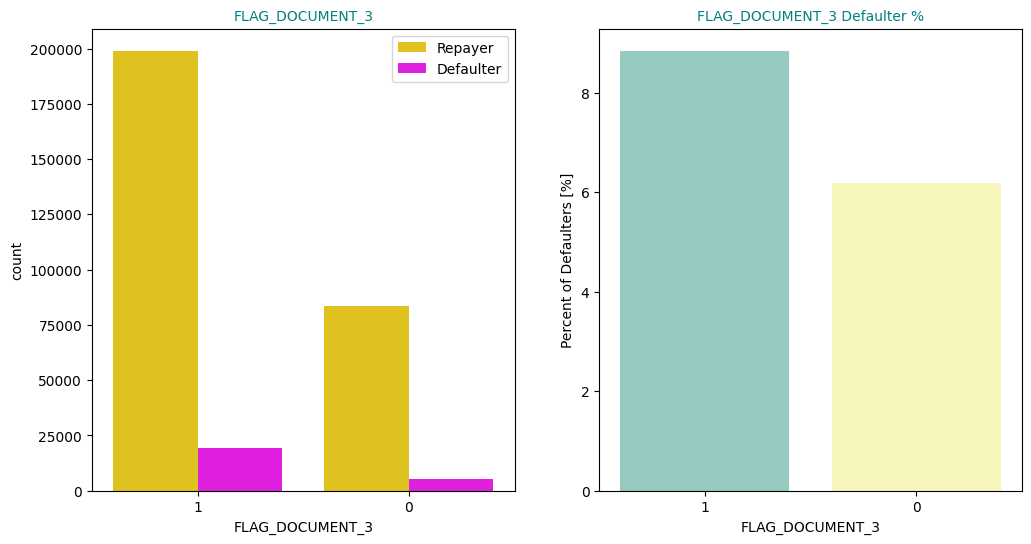

In [98]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True,save_path='images/')

### **Insights:**

* There is no substantial correlation between loan repayers and defaulters concerning the submission of Document 3. Surprisingly, even among applicants who have submitted the document, there is a slightly higher default rate of approximately 9%, compared to those who have not submitted the document, with a default rate of 6%.

**Possible Reasons:**

1. Document Significance: Document 3 may not be directly related to an applicant's creditworthiness or loan repayment ability. Other factors, such as income, credit history, and employment stability, may play a more significant role in determining loan repayment behavior.

2.  Incomplete Information: The presence or absence of a single document may not provide a comprehensive picture of an applicant's financial situation. Lenders typically consider multiple factors and documents when assessing credit risk.

3. Sample Variation: It's possible that the observed difference in default rates is due to sample variation or random fluctuations rather than a meaningful pattern. A larger dataset or more detailed analysis may be needed to draw conclusive insights.

4. Loan Purpose: The purpose for which applicants seek loans can vary. Some applicants may require loans for purposes unrelated to Document 3, which could influence their repayment behavior.

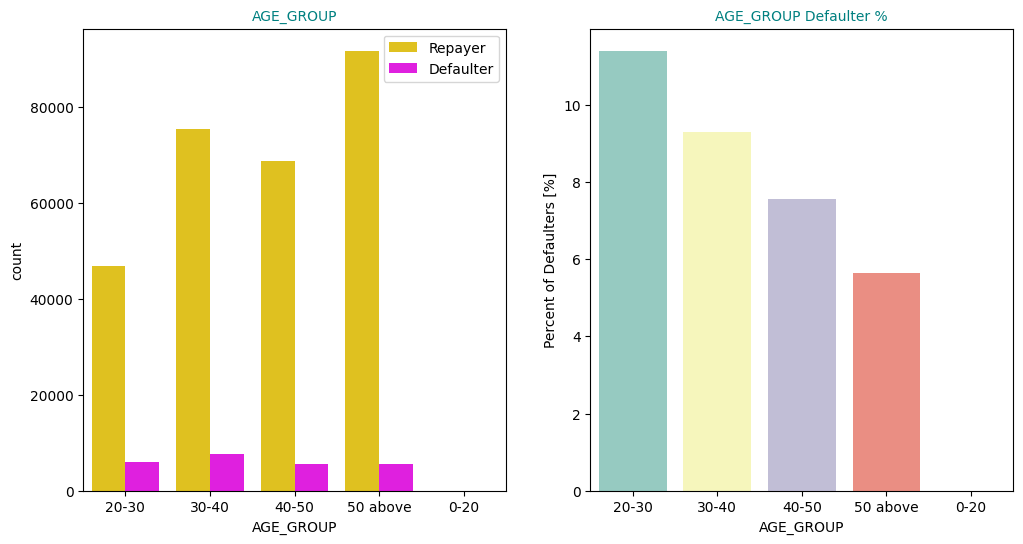

In [99]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP",False,False,True,save_path='images/')

### **Insights:**

* Individuals within the age group of 20 to 40 exhibit a higher likelihood of defaulting on loans.

* Conversely, applicants above the age of 50 demonstrate a lower probability of defaulting.

**Possible Reasons:**

1. Income Stability: Younger individuals in the 20-40 age range may still be establishing their careers and financial stability. Variability in income and financial commitments during this phase of life can contribute to a higher default risk.

2. Financial Responsibilities: People in their 20s and 30s may have various financial responsibilities, such as student loans, mortgages, or raising a family. These additional financial commitments can strain their ability to meet loan obligations.

3. Credit History: Younger individuals may have limited credit histories or lower credit scores, which can impact their access to favorable loan terms and increase default risk.

4. Retirement: Applicants aged 50 and above are more likely to be closer to retirement or already retired. This stage often comes with reduced financial liabilities and a more stable income, reducing the risk of loan default.

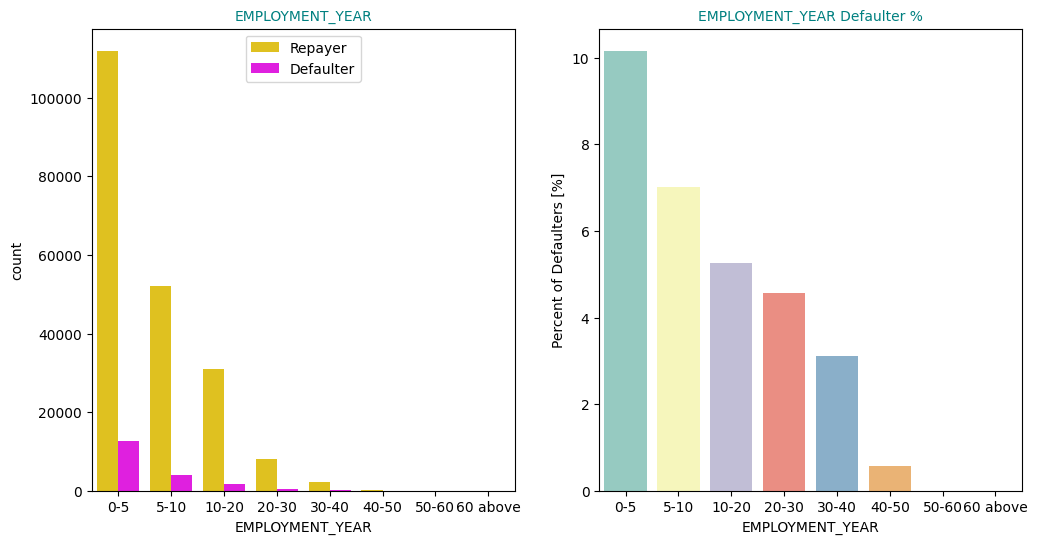

In [100]:
# Analyzing Employment_Year based on loan repayment status
univariate_categorical("EMPLOYMENT_YEAR",False,False,True,save_path='images/')

### **Insights:**


* A significant portion of loan applicants falls into the category of having employment experience ranging from 0 to 5 years. This group exhibits the highest default rate, approximately 10%.

* As the number of years of employment increases, there is a gradual decrease in the defaulting rate. Individuals with 40 or more years of experience have an impressively low default rate, measuring less than 1%.

**Possible Reasons:**

1. Early Career Challenges: Applicants with 0 to 5 years of employment experience may face challenges associated with early career stages, such as lower incomes, limited job stability, and higher financial commitments, leading to a higher risk of loan default.

2. Career Progression: As individuals gain more years of employment experience, they often advance in their careers, resulting in higher incomes, improved job security, and better financial stability. These factors contribute to a reduced risk of loan default.

3. Financial Maturity: Over time, individuals tend to become more financially mature and responsible in managing their financial obligations. This increased financial maturity can translate into a lower likelihood of defaulting on loans.

4. Retirement Planning: Applicants with 40+ years of experience are likely closer to retirement or already retired. They may have substantial savings, retirement plans, and fewer financial commitments, making them less susceptible to default.

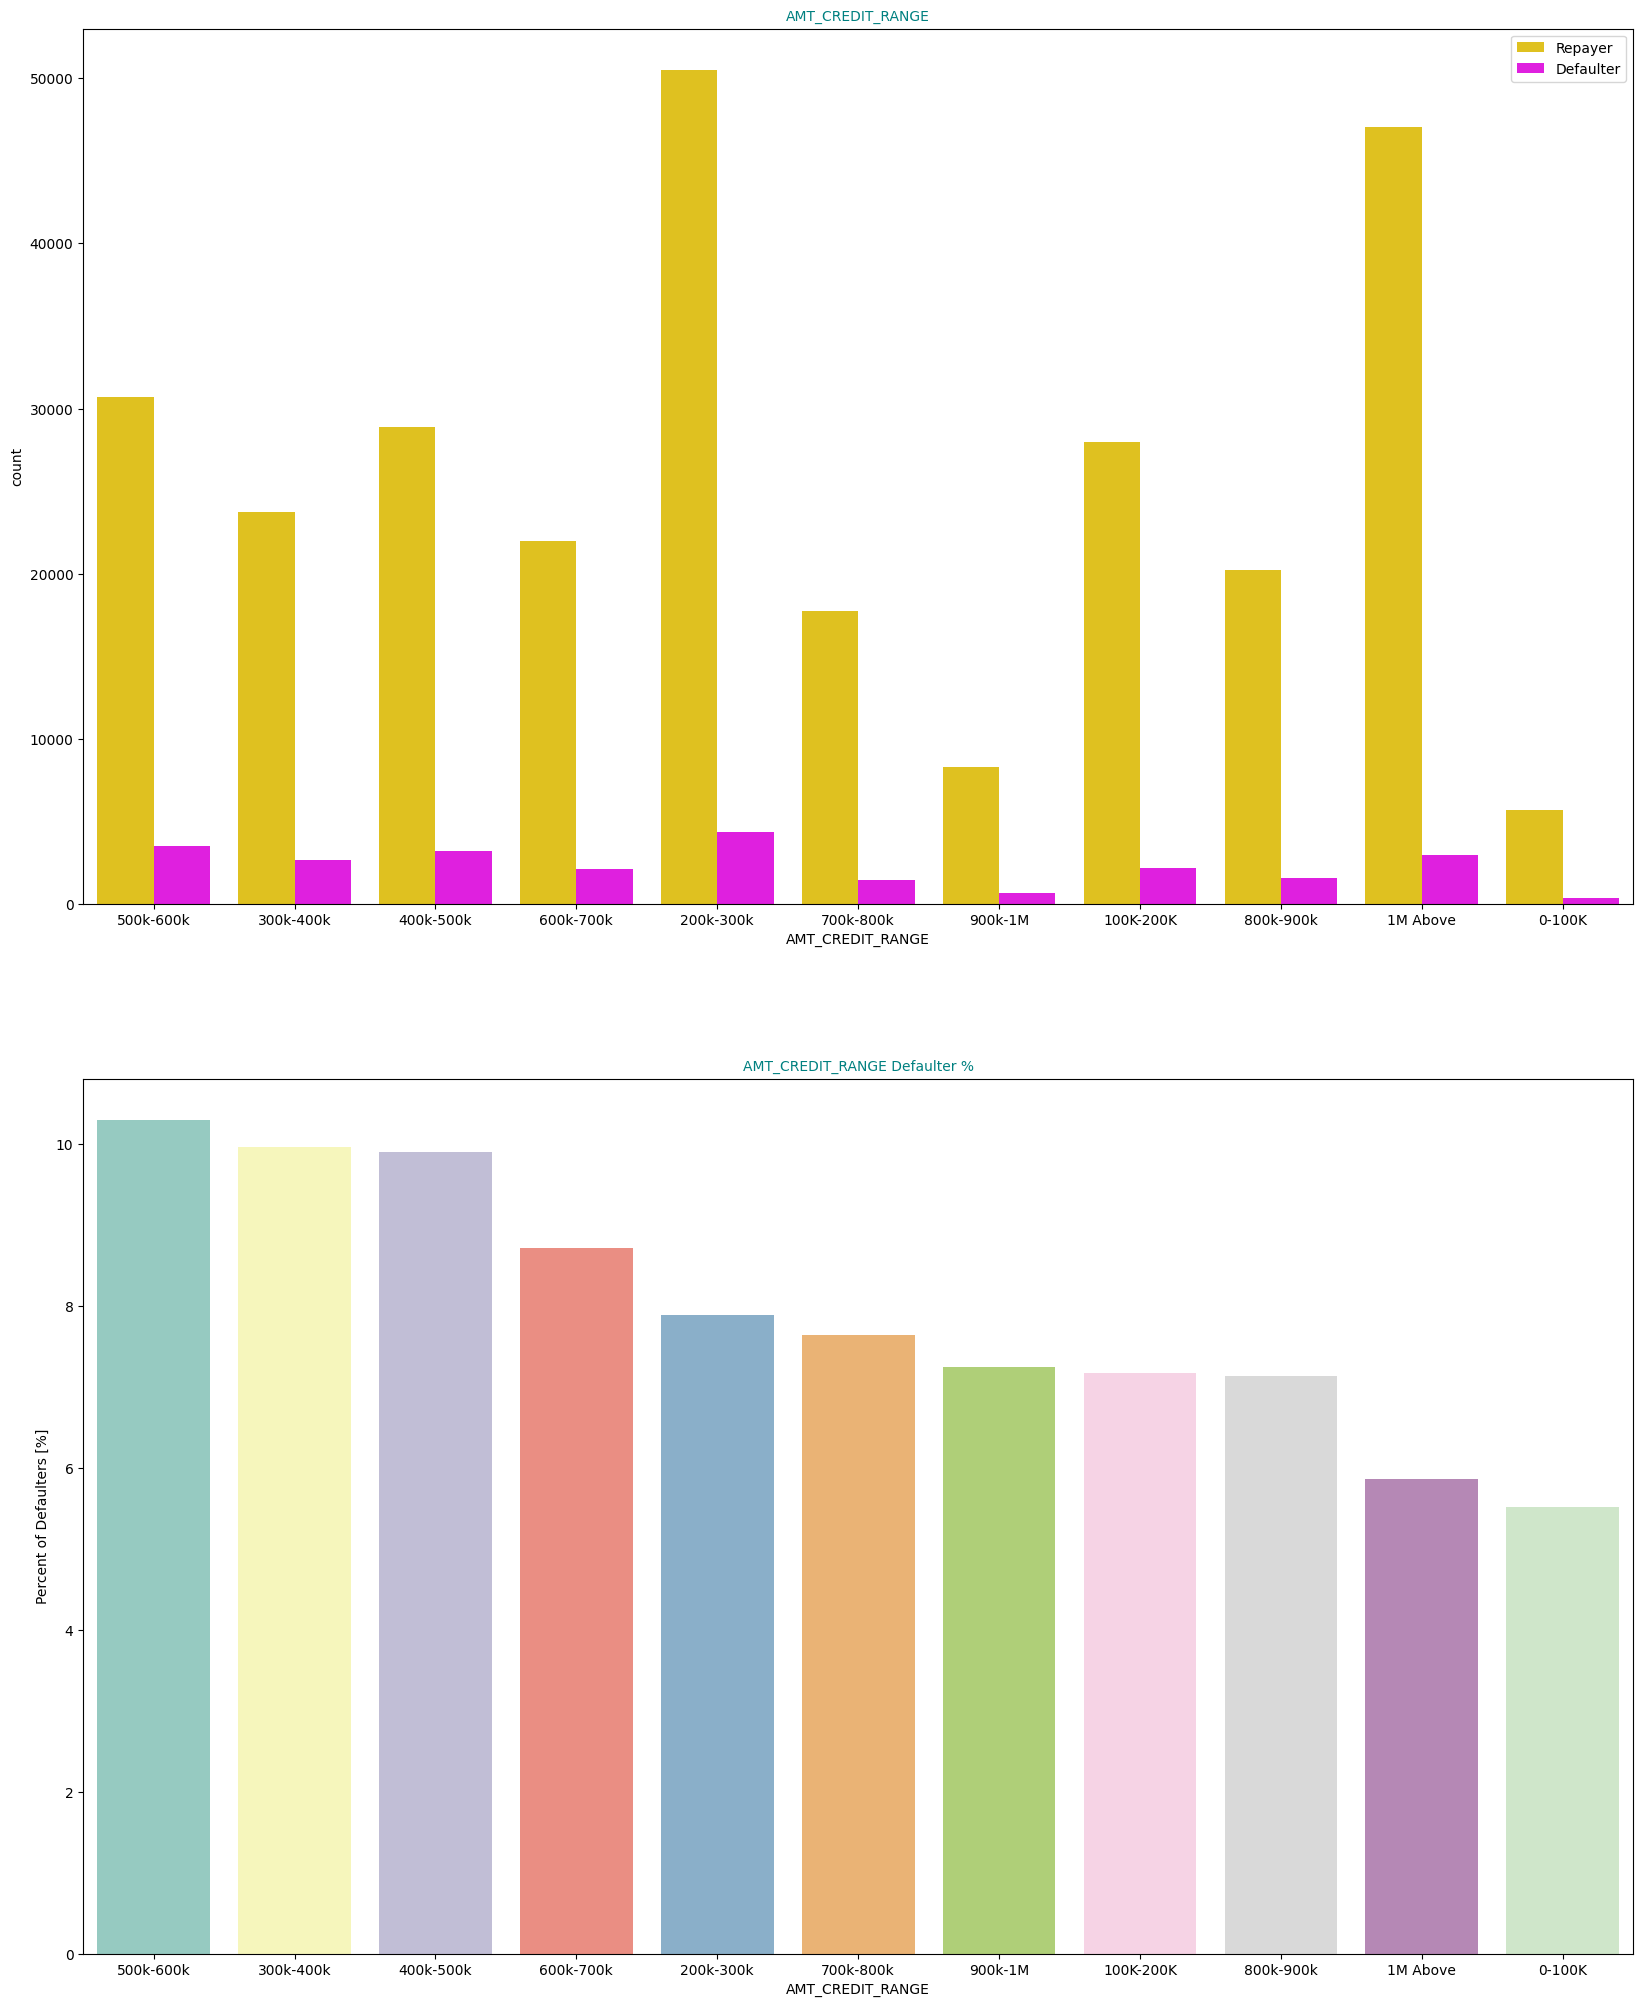

In [101]:
# Analyzing Amount_Credit based on loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,False,False,save_path='images/')

### **Insights:**


* A significant majority of the loans provided, accounting for over 80%, have loan amounts below 900,000.

* Interestingly, applicants who secure loans in the range of 300,000 to 600,000 exhibit a higher tendency to default compared to applicants seeking loans in other amount brackets.

**Possible Reasons:**

1. Loan Amount Influence: The loan amount may be correlated with an applicant's financial stability and ability to repay. Applicants seeking higher loan amounts may undergo more rigorous financial assessments, resulting in a lower default rate.

2. Financial Commitments: Applicants taking loans in the 300,000 to 600,000 range may have specific financial commitments or obligations that increase their risk of default. These commitments could include existing debts, expenses, or financial challenges.

3. Loan Purpose: The purpose for which applicants seek loans can vary widely. Loans taken for certain purposes may be associated with a higher likelihood of repayment, while others may carry a higher default risk.

4. Creditworthiness: Applicants' creditworthiness and credit histories can also influence their ability to secure loans and their likelihood of defaulting. Those with stronger credit profiles may receive loans with more favorable terms and lower default rates.

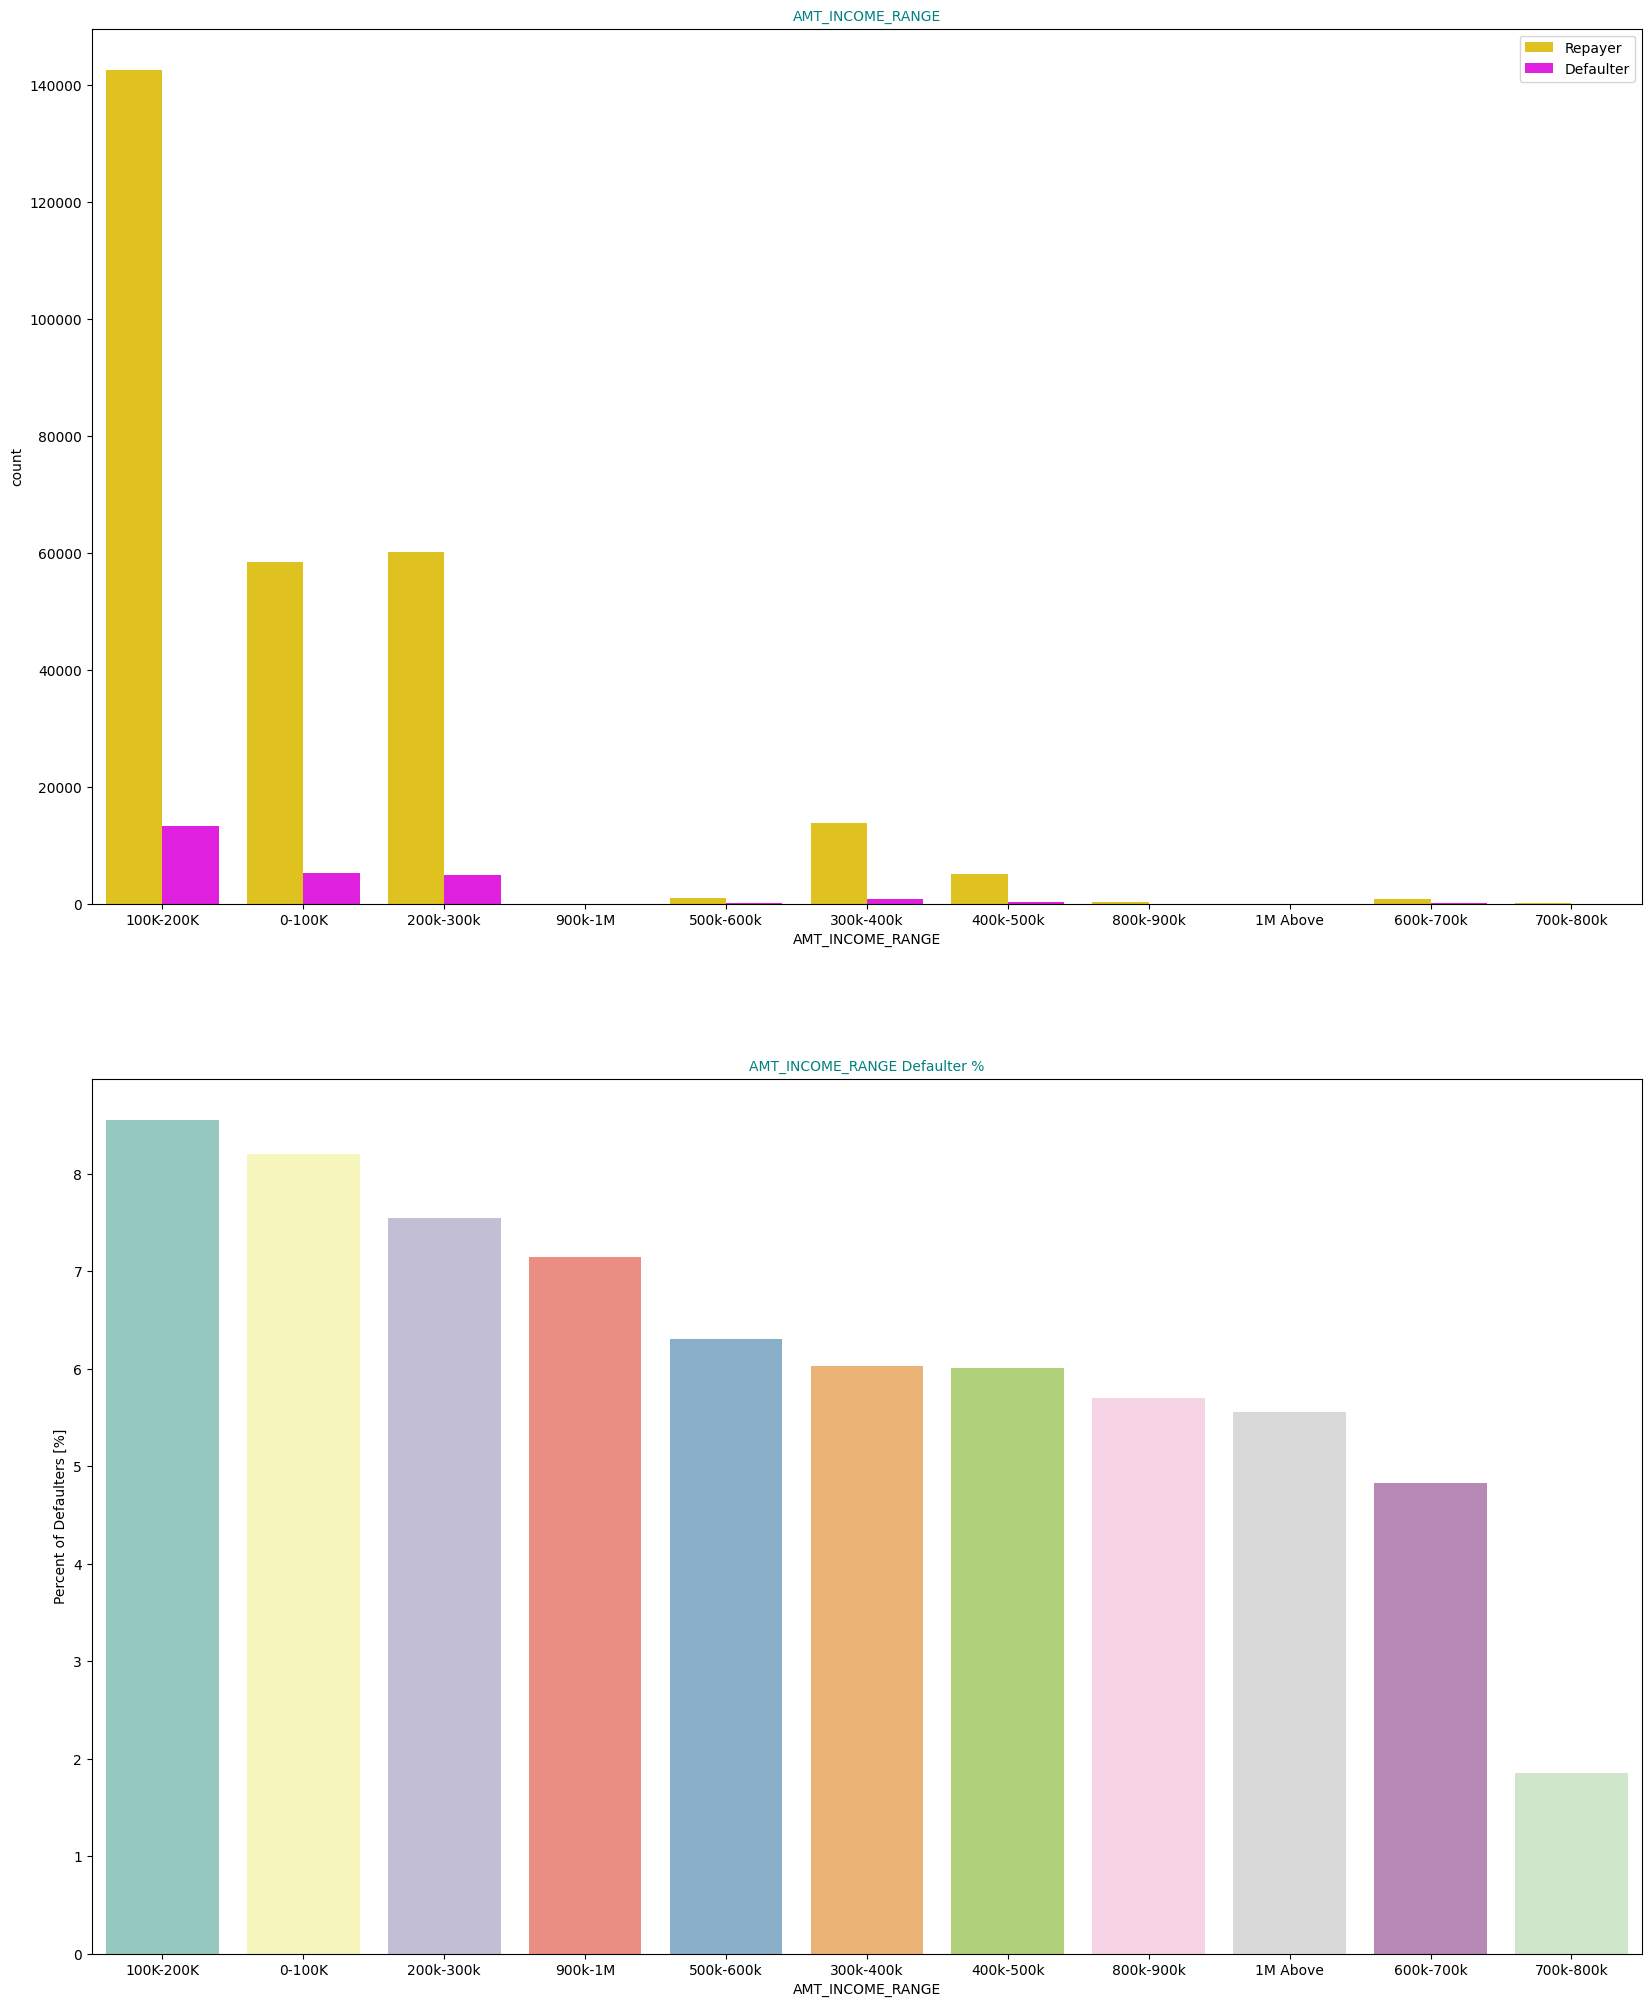

In [102]:
# Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,False,False,save_path='images/')

### **Insights:**


* An overwhelming majority of loan applications, approximately 90%, have a total income below 300,000.

* Applicants with a total income below 300,000 exhibit a higher probability of defaulting on their loans.

* Conversely, applicants with a total income exceeding 700,000 are notably less likely to default on their loan obligations.

**Possible Reasons:**

1. Income Adequacy: Applicants with incomes below 300,000 may face challenges in meeting loan repayments due to limited financial resources and higher financial commitments relative to their income levels.

2. Financial Stability: Higher income levels, such as those exceeding 700,000, often indicate greater financial stability, reducing the risk of default. These applicants may have surplus income after meeting their financial obligations.

3. Creditworthiness: Applicants with higher incomes may also have stronger credit histories and credit scores, making them more attractive to lenders and resulting in more favorable loan terms.

4. Loan Affordability: Applicants with lower incomes may apply for loans that strain their financial capacity, increasing the likelihood of default. In contrast, those with higher incomes are more likely to secure loans within their means.

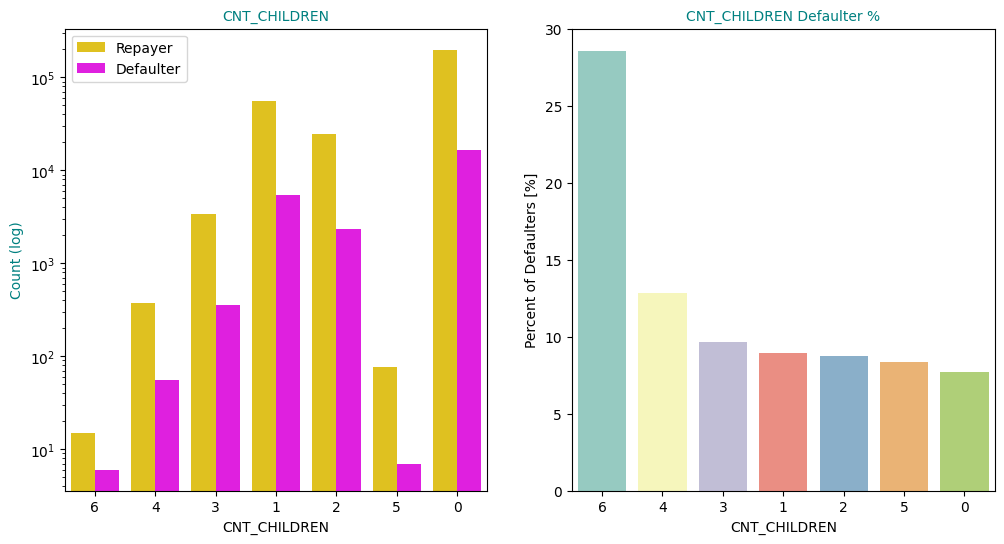

In [103]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True,save_path='images/')

### **Insights:**

* The majority of loan applicants do not have children, indicating that a significant portion of applicants is childless.

* A relatively small number of clients have more than three children, suggesting that applicants with larger families are less common.

* Notably, clients with more than four children, particularly those with child counts of 9 and 11, exhibit an exceedingly high default rate, with both groups displaying a 100% default rate.

**Possible Reasons:**

1. Family Size Impact: The number of children in a client's family can influence their financial commitments and resources. Applicants with larger families may face increased financial challenges, making it more difficult to meet loan obligations.

2. Financial Strain: Clients with very large families, such as those with nine or eleven children, may experience significant financial strain due to the costs associated with raising and supporting a large number of dependents. This financial strain can lead to a higher likelihood of loan default.

3. Income and Expenses: Larger families often entail higher living expenses, including education, healthcare, and daily living costs. Applicants with numerous children may find it challenging to balance their income with these expenses, potentially impacting their ability to repay loans.

4. Risk Assessment: Lending institutions typically consider the financial stability and resources of applicants when assessing credit risk. Clients with a high number of dependents may be evaluated with greater scrutiny due to their potentially higher risk of default.

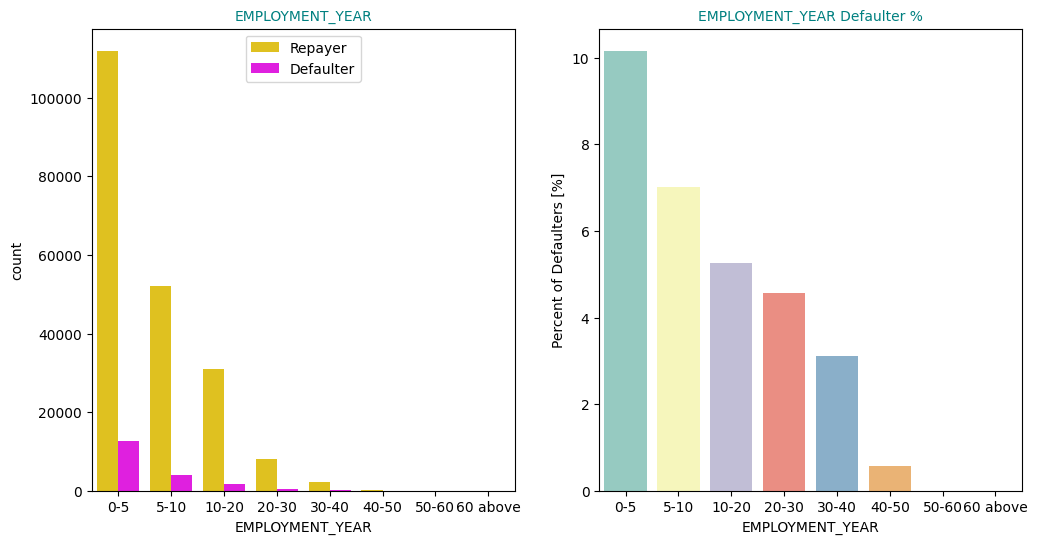

In [104]:
univariate_categorical('EMPLOYMENT_YEAR',save_path='images/')

### **Insights:**


* The highest number of loan applications were submitted by individuals with 0-5 years of working experience. This group represents the largest applicant segment.

* Among loan applicants, those with 0-5 years of employment experience also constitute the highest number of defaulters. This group is followed closely by applicants with 5-10 years of employment experience.

**Possible Reasons:**

1. Early Career Stage: Individuals in the early stages of their careers (0-5 years of employment) may have a greater need for loans to meet various financial commitments, such as education, housing, and daily expenses. However, the financial challenges associated with this stage can result in a higher likelihood of loan default.

2. Financial Stability: Applicants with limited employment experience may face uncertainties related to job stability and income levels, making it more challenging to meet loan obligations.

3. Credit History: Individuals with shorter employment histories may also have limited credit histories, potentially impacting their access to loans with favorable terms and contributing to a higher default rate.

4. Income Growth: As applicants gain more years of employment experience, their income levels and financial stability may improve, reducing the risk of loan default over time.

In [105]:
application_dtf.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  YEARS_EMPLOYED AMT_INCOME_RANGE AMT_CREDIT_RANGE  AGE AGE_GROUP EMPLOYMENT_YEAR
0      100002       1         Cash loans           M            N               Y             0             2.025    4.065975      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                  1134.0                1               1        200k-300k        400k-500k   25     20-30             0-5
1      100003       0         Cash loans           F            N               N             0             2.700   12.935025      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                   828.0                1               3        200k-300k         1M Above   45     40-50             0-5
2      100004       0    Revolving loans           M            Y               Y             0             0.675    1.350000       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                    2                           2                     MONDAY                        9                           0                          0                           0                      0                      0                       0              Government                       0.0                       0.0                       0.0                       0.0                   815.0                0               0           0-100K        100K-200K   52  50 above             NaN

Saved image to images/univariate_numerical_AMT_ANNUITY.png


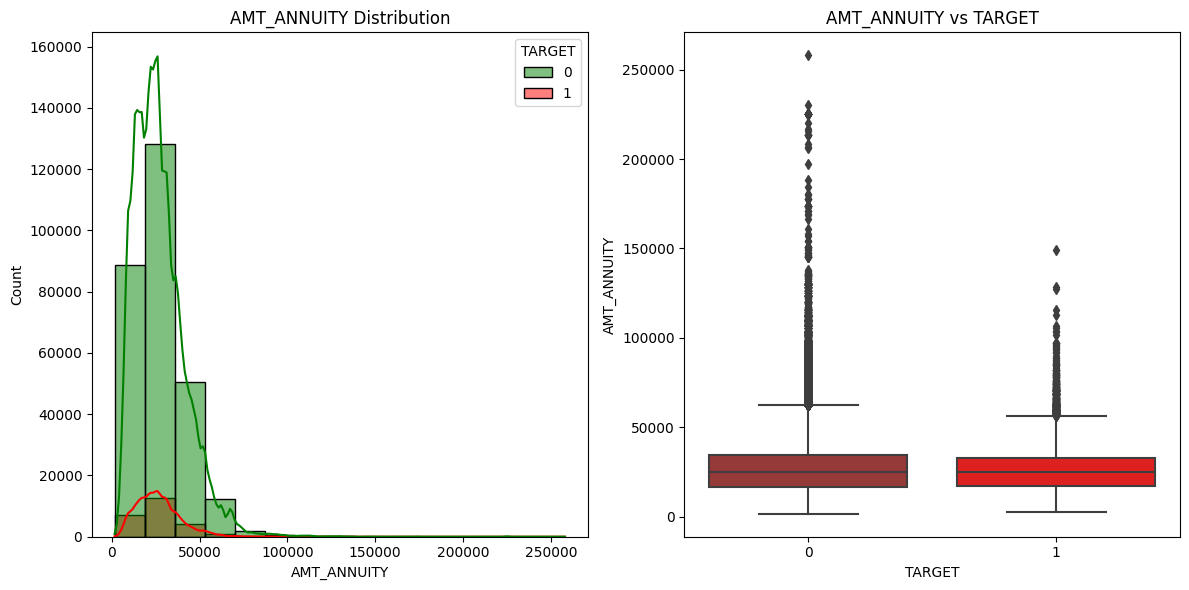

In [106]:
# Univariate analysis of numerical features
univariate_numerical(data=application_dtf,target_col='TARGET',feature='AMT_ANNUITY',bins=15,save_path='images/')

### **Insights:**

* The histogram of the "Annuity Amount" column displays a right-skewed distribution. The highest frequency of annuity amounts is observed around 30,000.

* When examining box plots for both defaulters and non-defaulters, it is evident that the range of annuity amounts between the two groups is nearly identical.

**Possible Reasons:**

1. Right-Skewed Distribution: A right-skewed histogram suggests that a significant number of applicants have relatively lower annuity amounts, while fewer applicants have significantly higher annuity amounts. This distribution may be influenced by varying financial backgrounds and loan requirements among applicants.

2. Common Annuity Amount: The presence of a peak around 45,000 indicates that this annuity amount is relatively common among loan applicants. It may represent a standard or preferred annuity amount for certain loan products.

3. Similar Ranges: The similarity in the range of annuity amounts between defaulters and non-defaulters suggests that the annuity amount alone may not be a strong predictor of loan default. Other factors, such as income, credit history, and employment stability, may play a more substantial role in determining loan repayment behavior.

Saved image to images/univariate_numerical_DAYS_LAST_PHONE_CHANGE.png


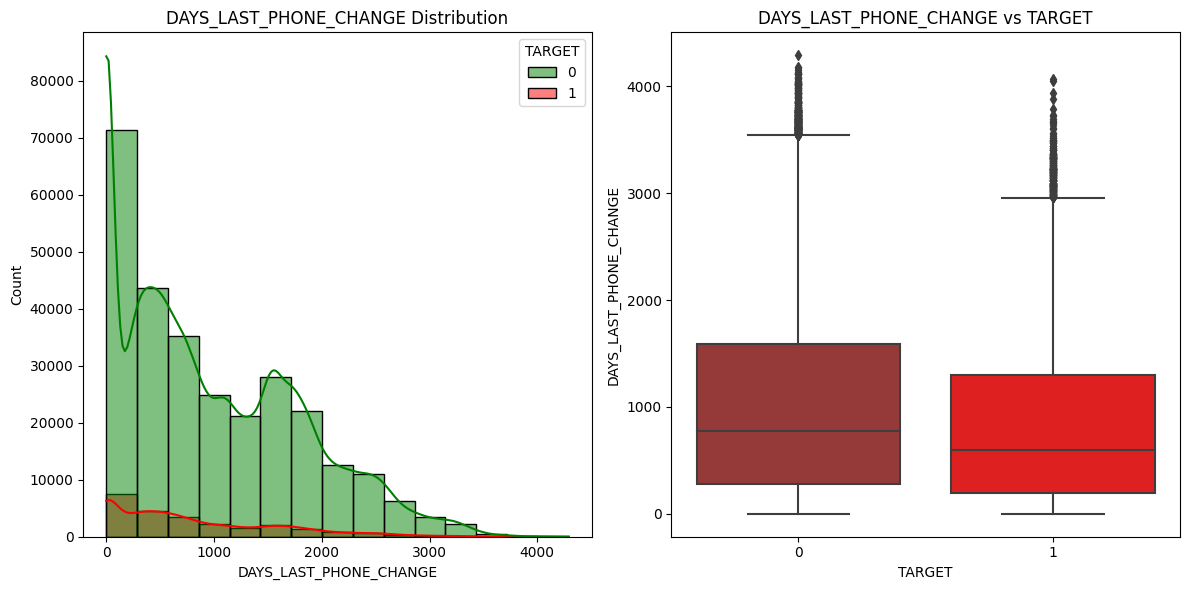

In [107]:
univariate_numerical(data=application_dtf,target_col='TARGET',feature='DAYS_LAST_PHONE_CHANGE',bins=15,save_path='images/')

### **Insights:**

* The feature "DAYS_LAST_PHONE_CHANGED" reveals that a substantial number of applicants, exceeding 8,000, have not changed their phone for over the last 500 days. This indicates that a significant portion of applicants has maintained their phone numbers without making recent changes.

* When examining the box plots for defaulters and repayers based on the "DAYS_LAST_PHONE_CHANGED" feature, it is apparent that the median value for defaulters is higher than that for repayers.

**Possible Reasons:**

1. Stability of Contact Information: The large number of applicants who haven't changed their phone numbers for an extended period may suggest stability in their contact information. This can be viewed positively by lenders as it signifies consistent communication with applicants.

2. Median Difference: The higher median value for defaulters in the box plot may indicate that applicants who haven't changed their phone numbers for a longer time are more likely to default on loans. However, it's essential to consider that this feature alone may not provide a complete picture of creditworthiness.

3. Contact Information as a Factor: Contact information, including phone numbers, can be a valuable means of communication between lenders and borrowers. It may also be used for verification and follow-up purposes. Lenders may interpret the lack of recent phone number changes as a potential sign of reliability.

4. Further Analysis: While the median difference is noteworthy, it's crucial to conduct further analysis and consider additional factors, such as income, employment stability, and credit history, to assess the overall credit risk of applicants accurately.

Saved image to images/univariate_numerical_HOUR_APPR_PROCESS_START.png


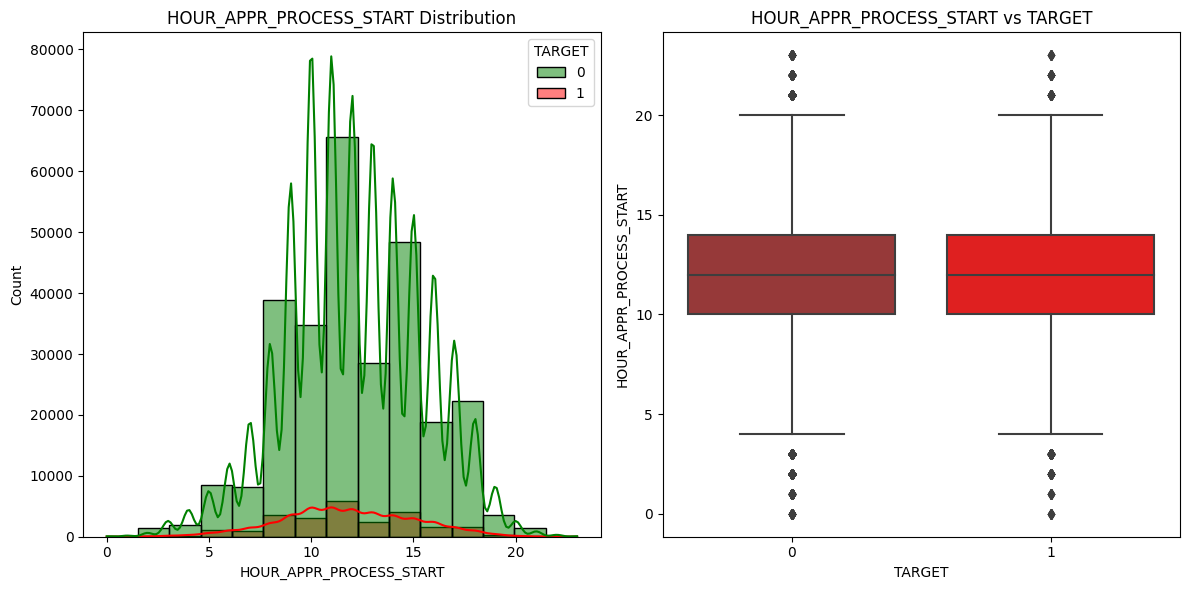

In [108]:
univariate_numerical(data=application_dtf,target_col='TARGET',feature='HOUR_APPR_PROCESS_START',bins=15,save_path='images/')

### **Insighths:**

* The feature "HOUR_APPR_PROCESS_START" provides information about the approximate hour at which the application process for loans started. The histogram of this feature exhibits a roughly normal distribution, indicating a relatively even distribution of application start times throughout the day.

* When analyzing the box plots for both defaulters and repayers based on the "HOUR_APPR_PROCESS_START" feature, it is notable that the ranges and medians of the two groups are roughly equal. This suggests that the distribution of application start times does not significantly differentiate between defaulters and repayers.

**Possible Reasons:**

1. Normal Distribution: The approximately normal distribution of application start times indicates that loan applications are initiated at various hours throughout the day. This could be due to factors such as individual preferences, work schedules, or other personal reasons.

2. Equal Ranges and Medians: The similarity in the ranges and medians between defaulters and repayers implies that the time of day when the application process begins may not be a strong predictor of loan repayment behavior. Other factors, such as income, credit history, and employment status, may play a more substantial role in determining creditworthiness.

3. Limited Discriminatory Power: The "HOUR_APPR_PROCESS_START" feature, while informative, may have limited discriminatory power in isolation. Lenders typically consider a broader set of applicant attributes to assess credit risk comprehensively.

Saved image to images/univariate_numerical_DAYS_ID_PUBLISH.png


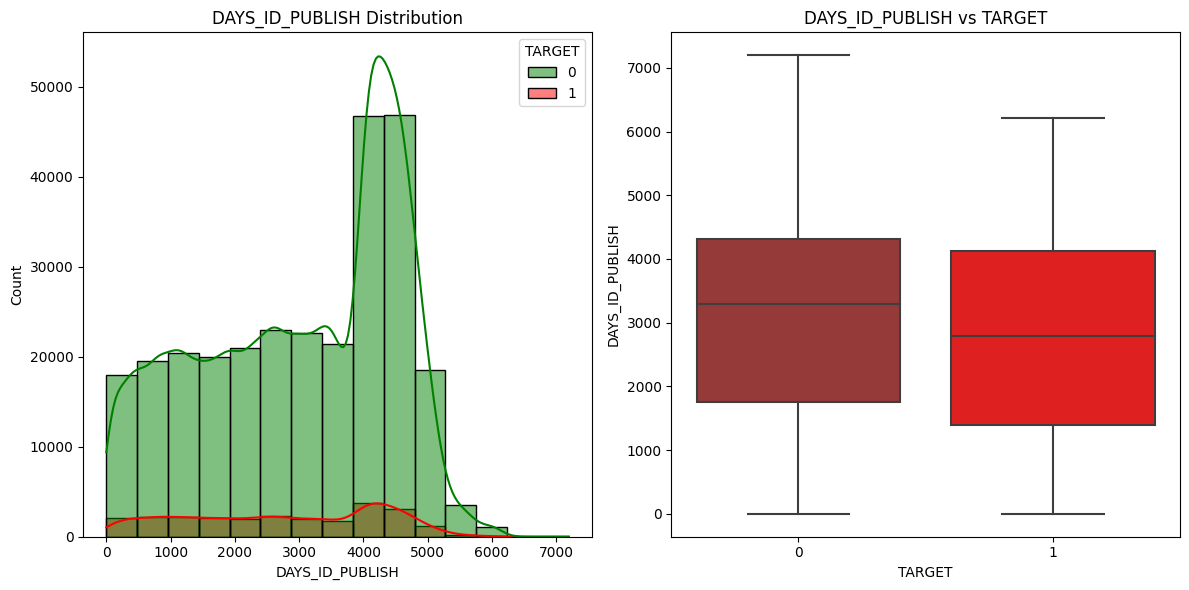

In [109]:
univariate_numerical(data=application_dtf,target_col='TARGET',feature='DAYS_ID_PUBLISH',bins=15,save_path='images/')

### **Insights:**

* The "DAYS_ID_PUBLISH" column indicates the number of days before the loan application when the client changed their identity document. The histogram for this feature exhibits a prominent peak at approximately 4,000 days, with a frequency of around 40,000 applicants. This suggests that a significant number of clients changed their identity documents around this specific time frame relative to their loan application.

* When analyzing the box plots for both defaulters and repayers based on the "DAYS_ID_PUBLISH" feature, we notice that the median value of the  feature for defaulters is higher than that for repayers.

**Possible Reasons:**

1. Peak at 4,000 Days: The prominent peak at 4,000 days in the histogram indicates that a substantial number of clients changed their identity documents around this specific duration before applying for a loan. The reasons for such changes could include document expiration, renewal, or other administrative requirements.

2. Higher Median for Defaulters: The higher median value in the "DAYS_ID_PUBLISH" feature for defaulters suggests that, on average, defaulters tend to change their identity documents more recently before applying for a loan compared to repayers. This difference may indicate that more recent document changes are associated with a higher likelihood of loan default.

Saved image to images/univariate_numerical_DAYS_REGISTRATION.png


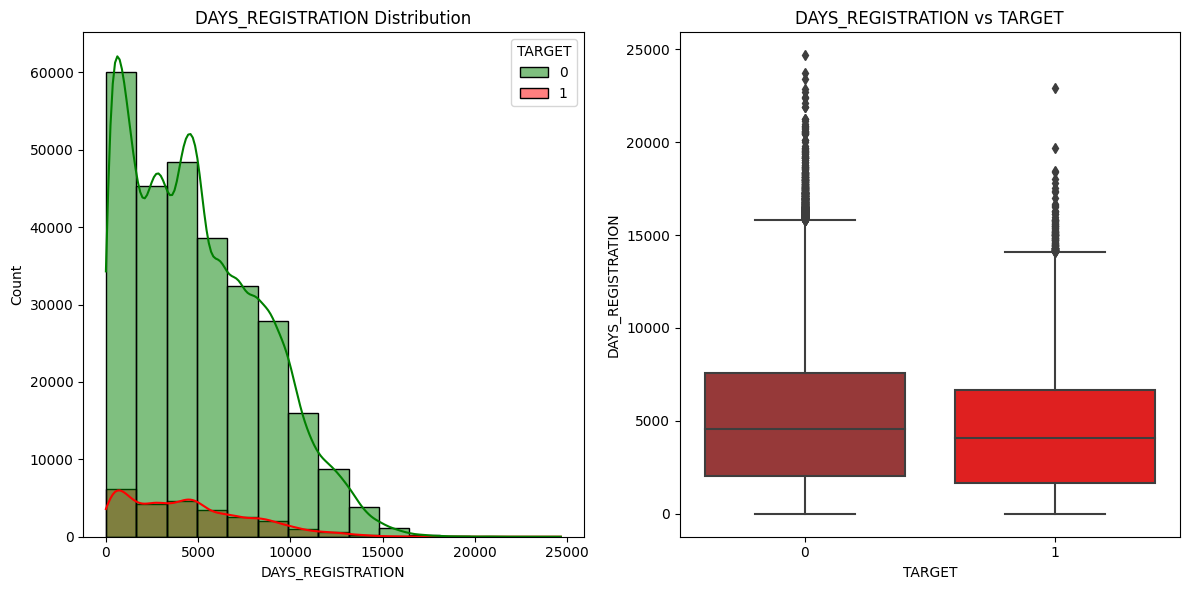

In [110]:
univariate_numerical(data=application_dtf,target_col='TARGET',feature='DAYS_REGISTRATION',bins=15,save_path='images/')

### **Insights:**

* The "DAYS_REGISTRATION" feature represents the number of days before the loan application when the person changed their registration. The distribution of this variable is right-skewed, with a prominent peak in the range of 0 to 1,000 days, which is observed for approximately 40,000 applicants. This suggests that a significant number of clients changed their registration relatively close to their loan application date.

* When examining the box plots for both defaulters and repayers based on the "DAYS_REGISTRATION" feature, distinct differences are evident:

  * The upper fence of the box plot for defaulters is positioned at a higher level compared to the box plot for repayers.
  * The lower fence for both defaulters and repayers is at the same level.
  * The median value of the "DAYS_REGISTRATION" feature for defaulters is     
    slightly higher than that for repayers.

**Possible Reasons:**

1. Peak at 0-1,000 Days: The prominent peak in the histogram, indicating a concentration of registrations changed within 0 to 1,000 days before the loan application, suggests that many clients made registration changes relatively close to the time of applying for a loan. Possible reasons for registration changes could include address updates or administrative requirements.

2. Higher Upper Fence for Defaulters: The fact that the upper fence of the box plot for defaulters is positioned higher than that for repayers suggests that defaulters may have a subset of cases where registration changes occurred relatively closer to the loan application date. This could indicate that more recent registration changes may be associated with a higher likelihood of loan default.

3. Slightly Higher Median for Defaulters: The slightly higher median value of the "DAYS_REGISTRATION" feature for defaulters implies that, on average, defaulters may have changed their registration more recently before applying for a loan compared to repayers.

Saved image to images/bivariate_categorical_NAME_EDUCATION_TYPE_AMT_INCOME_TOTAL.png


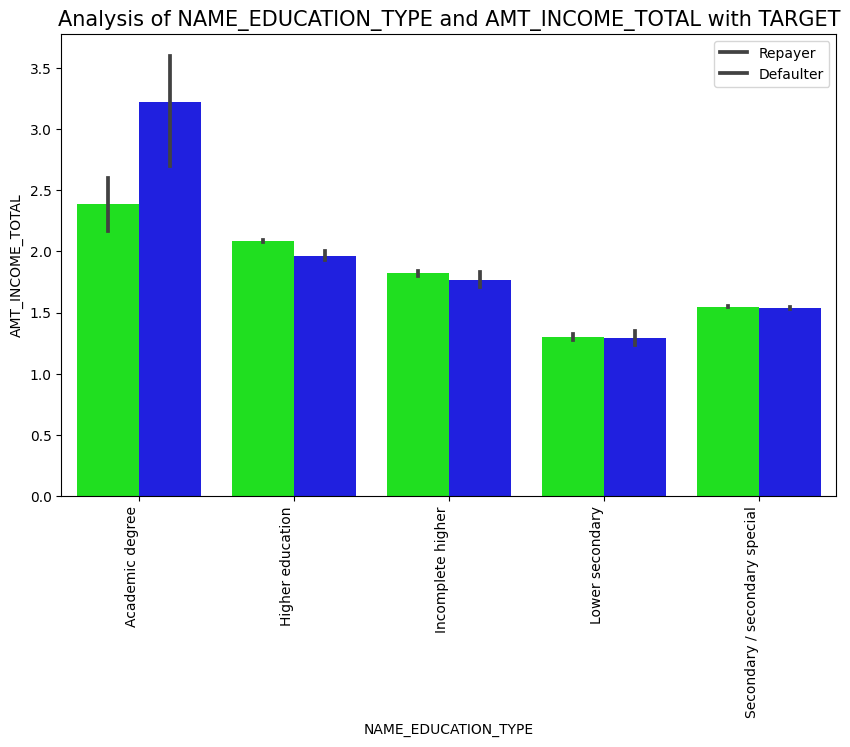

In [111]:
#bivariate analysis of categorical variables

bivariate_categorical(x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',df=application_dtf,hue='TARGET',figsize=(10,6),save_path='images/')

### **Insights:**

* During a bivariate analysis of total income and education type, it was observed that applicants with an academic degree tend to have higher incomes compared to individuals with other education levels. This finding suggests that pursuing higher education, such as academic degrees, may be associated with increased earning potential.

* Paradoxically, it was also noted that the category of applicants with academic degrees had the highest rate of loan defaults. This implies that despite their higher incomes, individuals with academic degrees may not necessarily exhibit better loan repayment behavior. Other factors, such as financial management, debt obligations, or unforeseen circumstances, may contribute to this unexpected trend.

**Possible Reasons:**

1. Higher Income for Academic Degree Holders: The higher income observed among applicants with academic degrees can be attributed to the advanced skills and qualifications associated with higher education. These individuals may secure jobs with better salaries or have access to opportunities that result in higher earnings.

2. Factors Behind Loan Defaults: While higher income typically signifies greater financial stability, the higher default rate among academic degree holders may be influenced by various factors:

  * Financial Management: Individuals with higher incomes may also have higher financial commitments, including larger loans or expenses, which could impact their ability to manage debt effectively.
  * Unforeseen Circumstances: Life events, unexpected emergencies, or economic downturns can affect anyone, regardless of their education level or income. These events may lead to difficulties in loan repayment.
  * Debt Burden: Academic degree holders may have accumulated substantial educational debt, which can influence their overall debt burden and loan repayment capacity.

In [112]:
# Let's have a look at the dataframe again
application_dtf.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  YEARS_EMPLOYED AMT_INCOME_RANGE AMT_CREDIT_RANGE  AGE AGE_GROUP EMPLOYMENT_YEAR
0      100002       1         Cash loans           M            N               Y             0             2.025    4.065975      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                  1134.0                1               1        200k-300k        400k-500k   25     20-30             0-5
1      100003       0         Cash loans           F            N               N             0             2.700   12.935025      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                   828.0                1               3        200k-300k         1M Above   45     40-50             0-5
2      100004       0    Revolving loans           M            Y               Y             0             0.675    1.350000       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                    2                           2                     MONDAY                        9                           0                          0                           0                      0                      0                       0              Government                       0.0                       0.0                       0.0                       0.0                   815.0                0               0           0-100K        100K-200K   52  50 above             NaN

Saved image to images/bivariate_categorical_NAME_INCOME_TYPE_AMT_INCOME_TOTAL.png


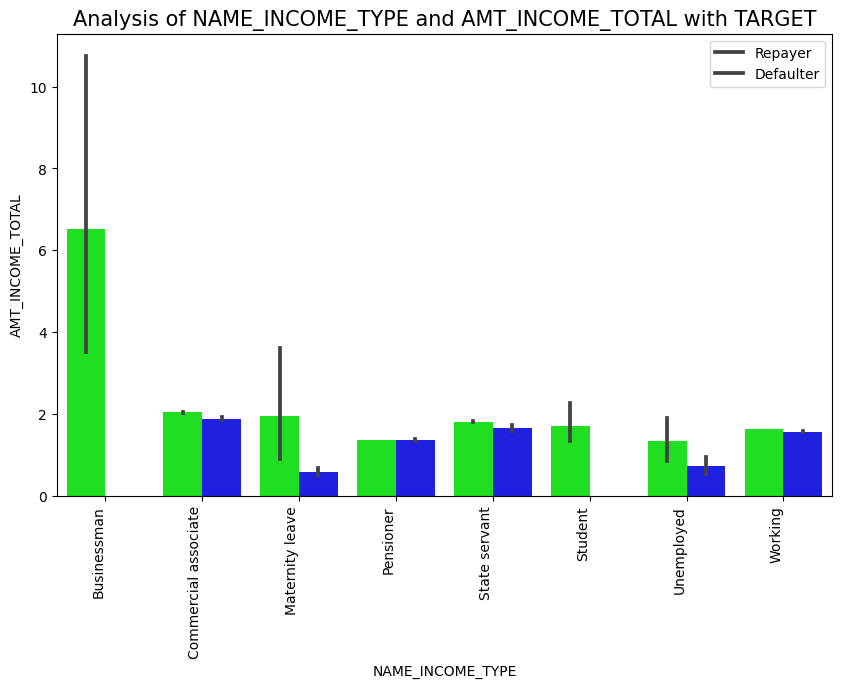

In [113]:

# Bivariate analysis-'NAME_INCOME_TYPE",'AMT_INCOME_TOTAL' with 'TARGET'
bivariate_categorical(x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',df=application_dtf,hue='TARGET',figsize=(10,6),save_path='images/')

### **Insights:**

* The analysis reveals that individuals classified as "businessmen" have the highest income compared to other income types. This finding suggests that individuals engaged in business activities tend to earn the highest income among the various income types considered.

* Additionally, the estimated income range at a 95% confidence level indicates that the income of a "businessman" could fall within a range that is slightly above 4 lakhs and slightly exceeding 10 lakhs. This range provides a statistical measure of the likely income distribution for individuals in this category.

**Possible Reasons:**

1. Higher Income for Businessmen: The observation of "businessmen" having the highest income aligns with the expectation that individuals engaged in entrepreneurial ventures, self-employment, or business ownership may have the potential to earn significant income. These individuals often have the autonomy to set their income levels based on their business success.

2. Income Range: The estimated income range at a 95% confidence level provides a statistical interval within which the true income of "businessmen" is likely to fall. The lower bound of slightly above 4 lakhs suggests that even individuals on the lower end of this income type may earn a relatively substantial income, while the upper bound exceeding 10 lakhs indicates that some "businessmen" have the potential for even higher earnings.

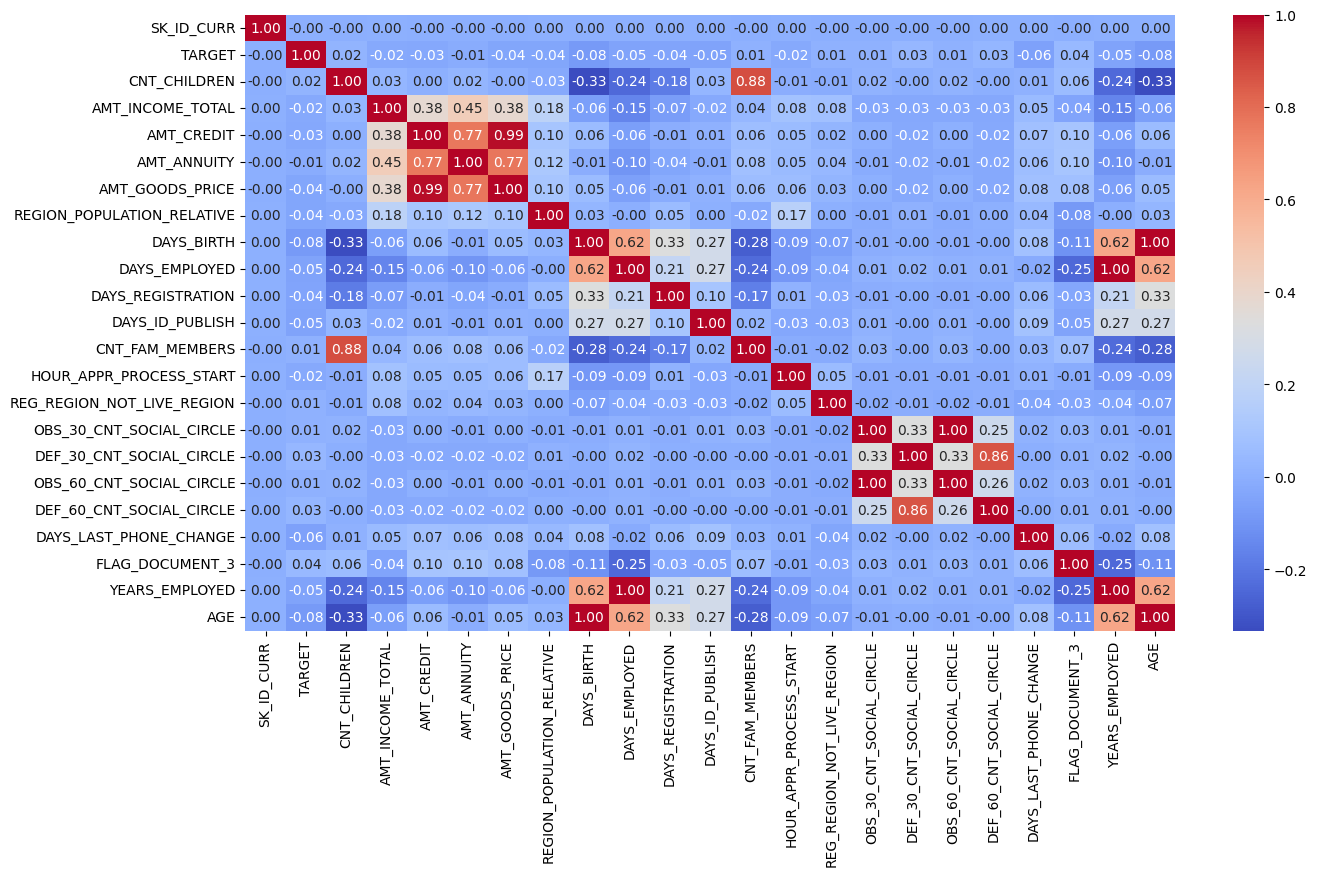

In [114]:
data=application_dtf.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=data,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

### **Insights:**


1. **Correlation with Total Income:**
   - Credit Amount: There is a moderate positive correlation (0.38) between credit amount and total income. This suggests that, in general, individuals with higher incomes tend to be approved for larger credit amounts.
   - Annuity Amount: There is a moderate positive correlation (0.45) between annuity amount and total income. This indicates that applicants with higher incomes may be approved for larger annuity payments.
   - AMT_GOODS_PRICE: There is a moderate positive correlation (0.38) between AMT_GOODS_PRICE and total income. This implies that individuals with higher incomes may be eligible for loans with higher goods prices.
   - REGION_POPULATION_RELATIVE: There is a relatively weak positive correlation (0.18) between REGION_POPULATION_RELATIVE and total income. This suggests a minor relationship between the population relative to the region and an applicant's income.

2. **Correlation Between Credit Amount and Annuity Amount:**
   - Annuity Amount and Credit Amount: There is a strong positive correlation (0.77) between annuity amount and credit amount. This indicates that the annuity amount is highly dependent on the credit amount, with higher credit amounts leading to larger annuity payments.

3. **Correlation Between AMT_GOODS_PRICE and Credit Amount/Annuity Amount:**
   - AMT_GOODS_PRICE and Credit Amount: There is a nearly perfect positive correlation (0.99) between AMT_GOODS_PRICE and credit amount. This indicates that the goods' price for which the loan is given (AMT_GOODS_PRICE) is almost identical to the credit amount. In other words, the loan amount is typically equal to the goods' price.
   - AMT_GOODS_PRICE and Annuity Amount: Since AMT_GOODS_PRICE is highly correlated with credit amount and credit amount is highly correlated with annuity amount, there is also a strong relationship between AMT_GOODS_PRICE and annuity amount. Loans with higher goods prices will result in larger annuity payments.

In summary, these correlations provide insights into how total income, credit amount, annuity amount, and AMT_GOODS_PRICE are interrelated. Higher incomes generally correspond to larger loan amounts and annuity payments. Additionally, the strong correlation between credit amount and AMT_GOODS_PRICE suggests that loans are typically granted for the purchase of goods, with the loan amount closely aligned with the goods' price.

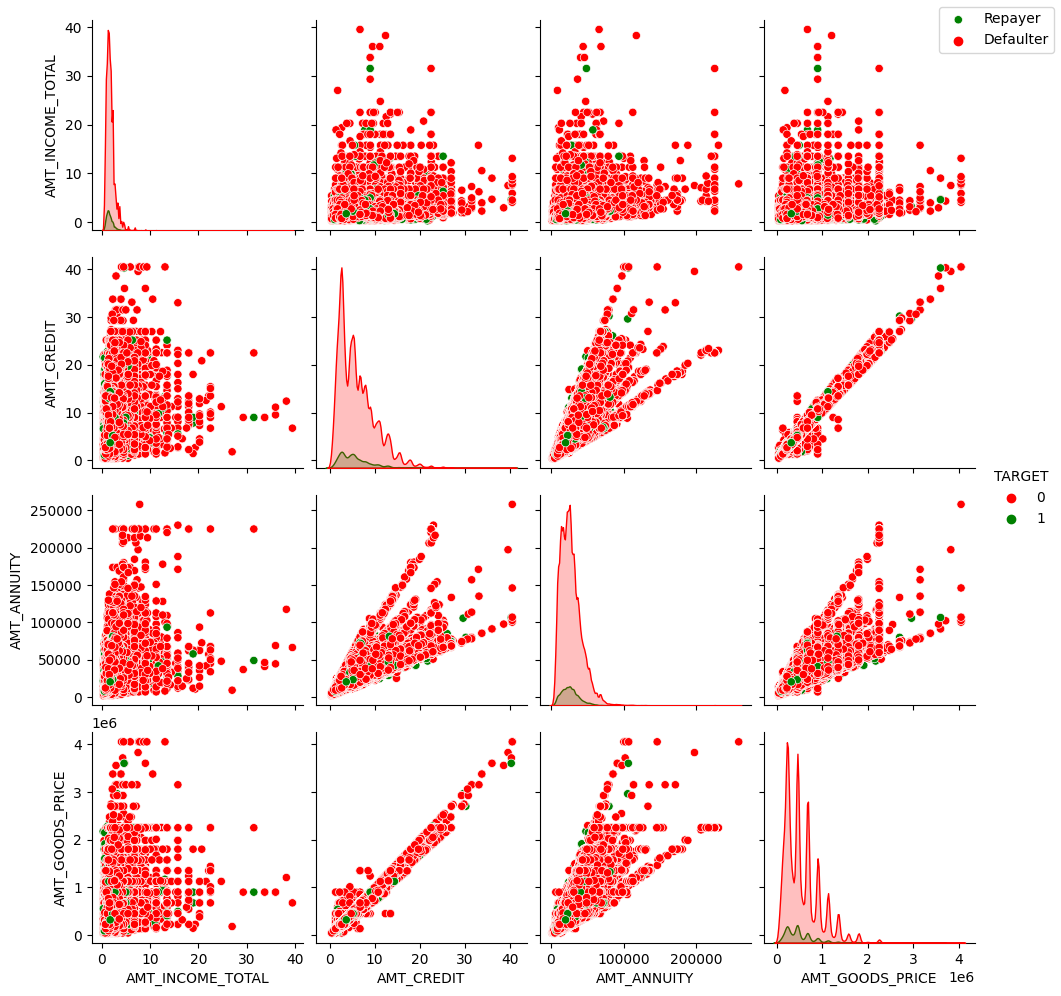

In [115]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = application_dtf[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[-((amount["AMT_GOODS_PRICE"].isnull()) & (amount["AMT_ANNUITY"].isnull()))]
ax= sns.pairplot(amount,hue="TARGET",palette=["r","g"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

### **Insights:**

1. **AMT_ANNUITY and AMT_GOODS_PRICE vs. Defaulters:**
   - When the annuity amount (AMT_ANNUITY) is greater than 15,000 and the goods price amount (AMT_GOODS_PRICE) is greater than 3 million (3M), there appears to be a lower likelihood of defaulters. This observation suggests that applicants who commit to higher annuity payments and seek loans for more expensive goods may be more financially stable and less likely to default on their loans.

2. **AMT_CREDIT and AMT_GOODS_PRICE Correlation:**
   - AMT_CREDIT and AMT_GOODS_PRICE exhibit a high positive correlation, as evident from the scatterplot where most of the data points align in the form of a line. This strong correlation indicates that the credit amount (AMT_CREDIT) granted for loans is closely related to the goods' price (AMT_GOODS_PRICE). In practice, this implies that loans are typically provided to cover the cost of specific goods or purchases, and the loan amount closely mirrors the goods' price.

3. **Low Default Rate for High Credit Amounts:**
   - There is a noticeable trend with very few defaulters among applicants whose credit amount (AMT_CREDIT) exceeds 3 million (3M). This observation suggests that applicants seeking larger loans, particularly those beyond 3M, may represent a lower risk group in terms of loan default. This could be due to more stringent eligibility criteria or a higher level of scrutiny for larger loans.

These inferences are derived from the pair plot and provide insights into the relationships between loan-related variables and the likelihood of loan default. It highlights the importance of considering factors such as annuity amount, goods' price, and credit amount in assessing the creditworthiness of applicants.

## **Merged Data Analysis**

In [116]:
#merge both the dataframe on SK_ID_CURR with Inner Join
merged_dtf = pd.merge(application_dtf, previous_dtf, how='inner', on='SK_ID_CURR')
merged_dtf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  YEARS_EMPLOYED AMT_INCOME_RANGE AMT_CREDIT_RANGE  AGE AGE_GROUP EMPLOYMENT_YEAR  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  \
0      100002       1           Cash loans           M            N               Y             0             2.025      4.065975        24700.5           351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                    2                           2                    WEDNESDAY                         10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                  1134.0                1               1        200k-300k        400k-500k   25     20-30             0-5     1038818       Consumer loans       9251.775         179055.0      179055.0   
1      100003       0           Cash loans           F            N               N             0             2.700     12.935025        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                       MONDAY                         11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                   828.0                1               3        200k-300k         1M Above   45     40-50             0-5     1810518           Cash loans      98356.995         900000.0     1035882.0   
2      100003       0           Cash loans           F            N               N             0             2.700     12.935025        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                       MONDAY                         11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                   828.0                1               3        200k-300k         1M Above   45     40-50             0-5     2636178       Consumer loans      64567.665         337500.0      348637.5   
3      100003       0           Cash loans           F            N    

In [117]:
merged_dtf.shape

(1413600, 70)

In [118]:
merged_dtf.size

98952000

In [119]:
merged_dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413600 entries, 0 to 1413599
Data columns (total 70 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413600 non-null  int64   
 1   TARGET                        1413600 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413600 non-null  category
 3   CODE_GENDER                   1413600 non-null  category
 4   FLAG_OWN_CAR                  1413600 non-null  category
 5   FLAG_OWN_REALTY               1413600 non-null  category
 6   CNT_CHILDREN                  1413600 non-null  int64   
 7   AMT_INCOME_TOTAL              1413600 non-null  float64 
 8   AMT_CREDIT_x                  1413600 non-null  float64 
 9   AMT_ANNUITY_x                 1413600 non-null  float64 
 10  AMT_GOODS_PRICE_x             1413600 non-null  float64 
 11  NAME_TYPE_SUITE               1413600 non-null  category
 12  NAME_INCOME_TY

In [120]:
merged_dtf.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  YEARS_EMPLOYED           AGE    SK_ID_PREV  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  HOUR_APPR_PROCESS_START_y  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION   CNT_PAYMENT
count  1.413600e+06  1.413600e+06  1.413600e+06      1.413600e+06  1.413600e+06   1.413600e+06       1.413600e+06                1.413600e+06  1.413600e+06   1.413600e+06       1.413600e+06     1.413600e+06     1.413600e+06               1.413600e+06                1.413600e+06              1.413600e+06              1.413600e+06              1.413600e+06              1.413600e+06            1.413600e+06     1.413600e+06    1.413600e+06  1.413600e+06  1.413600e+06   1.413600e+06     1.413600e+06  1.413599e+06       1.413600e+06               1.413600e+06            1.413600e+06   1.413600e+06  1.413600e+06
mean   2.784806e+05  8.654994e-02  4.043846e-01      1.729093e+00  5.875572e+00   2.701632e+04       5.276548e+05                2.075009e-02  1.632115e+04   7.266773e+04       5.003282e+03     3.034571e+03     2.149989e+00               1.198429e+01                1.207201e-02              1.540773e+00              1.537026e-01              1.522943e+00              1.078035e-01            1.084700e+03     7.385625e-01    1.985616e+02  4.421411e+01  1.922741e+06   1.484033e+04     1.752449e+05  1.963551e+05       1.854410e+05               1.247888e+01            9.964318e-01   8.803671e+02  1.256377e+01
std    1.028120e+05  2.811745e-01  7.133038e-01      9.282067e-01  3.849162e+00   1.394855e+04       3.531009e+05                1.334717e-02  4.344625e+03   1.433406e+05       3.551111e+03     1.507380e+03     8.974779e-01               3.232175e+00                1.092076e-01              2.528990e+00              4.654372e-01              2.507243e+00              3.786769e-01            7.999231e+02     4.394179e-01    3.926468e+02  1.190236e+01  5.327168e+05   1.316366e+04     2.936247e+05  3.194827e+05       2.881267e+05               3.331510e+00            5.962772e-02   7.835397e+02  1.448820e+01
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e-01  4.500000e-01   1.615500e+03       4.050000e+04                2.900000e-04  7.489000e+03   0.000000e+00       0.000000e+00     0.000000e+00     1.000000e+00               0.000000e+00                0.000000e+00              0.000000e+00              0.000000e+00              0.000000e+00              0.000000e+00            0.000000e+00     0.000000e+00    0.000000e+00  2.000000e+01  1.000001e+06   0.000000e+00     0.000000e+00  0.000000e+00       0.000000e+00               0.000000e+00            0.000000e+00   1.000000e+00  0.000000e+00
25%    1.893630e+05  0.000000e+00  0.000000e+00      1.125000e+00  2.700000e+00   1.682100e+04       2.385000e+05                1.003200e-02  1.273900e+04   1.042000e+03       2.000000e+03     1.783000e+03     2.000000e+00               1.000000e+01                0.000000e+00              0.000000e+00              0.000000e+00              0.000000e+00              0.000000e+00            3.960000e+02     0.000000e+00    2.000000e+00  3.400000e+01  1.461343e+06   7.406314e+03     1.975050e+04  2.488050e+04       4.500000e+04               1.000000e+01            1.000000e+00   2.710000e+02  0.000000e+00
50%    2.789885e+05  0.000000e+00  0.000000e+00      1.575000e+00  5.084955e+00   2.492550e+04       4.500000e+05                1.885000e-02  1.604400e+04   2.401000e+03       4.508000e+03     3.330000e+03     2.000000e+00               1.200000e+01                0.000000e+00              0.000000e+00              0.000000e+00 

In [121]:
def univariate_merged(col, df, hue, palette, ylog=False, figsize=(10, 6),save_path=None):
    """
    Generate a univariate countplot to visualize the distribution of a categorical column with merged categories.

    Parameters:
    - col (str): The column name for the x-axis (categorical variable).
    - df (DataFrame): The DataFrame containing the data to be plotted.
    - hue (str): The column name to be used for grouping and coloring the data.
    - palette (str or list): The color palette to use for plotting data points.
    - ylog (bool, optional): Whether to use a logarithmic scale for the y-axis. Default is False.
    - figsize (tuple, optional): A tuple specifying the width and height of the figure. Default is (10, 6).

    This function creates a univariate countplot to visualize the distribution of a categorical column 'col' with merged categories,
    allowing you to see how different values are distributed. The 'hue' parameter is used for grouping and coloring the data points.

    You can specify a custom color palette using the 'palette' parameter.

    Labels, titles, and legends are defined for the plot to provide clear visual context. The x-axis labels are rotated for better readability.

    If 'ylog' is set to True, the y-axis will be displayed on a logarithmic scale.

    Returns:
    None. The function displays the generated univariate countplot.

    Example:
    univariate_merged('education', my_dataframe, 'loan_status', 'Set1', ylog=True, figsize=(12, 6))
    """
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=col,
                       data=df,
                       hue=hue,
                       palette=palette,
                       order=df[col].value_counts().index)

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)", fontdict={'fontsize': 10, 'fontweight': 3, 'color': 'Black'})
    else:
        plt.ylabel("Count", fontdict={'fontsize': 10, 'fontweight': 3, 'color': 'Black'})

    plt.title(col, fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Black'})
    plt.legend(loc="upper right")
    plt.xticks(rotation=90, ha='right')
    if save_path:
        image_filename = f'univariate_merged_{col}.png'
        image_path = os.path.join(save_path, image_filename)
        plt.savefig(image_path)
        print(f"Saved image to {image_path}")

    plt.show()


In [122]:
def merged_pointplot(x, y):
    """
    Generate a point plot to visualize relationships between two variables in a merged DataFrame.

    Parameters:
    - x (str): The column name for the x-axis (categorical variable).
    - y (str): The column name for the y-axis (numerical variable).

    This function creates a point plot to visualize the relationships between two variables 'x' and 'y' in a merged DataFrame.
    The 'TARGET' column is used to group and color the data points, typically representing different categories or classes.

    Labels and titles are defined for the plot to provide clear visual context.

    Returns:
    None. The function displays the generated point plot.`
    """
    plt.figure(figsize=(8, 4))
    sns.pointplot(x=x,
                  y=y,
                  hue="TARGET",
                  data=merged_dtf,
                  palette=['teal', 'brown'])

    # Add legend if needed
    # plt.legend(['Repayer', 'Defaulter'])

    plt.xlabel(x, fontdict={'fontsize': 10, 'fontweight': 3, 'color': 'Black'})
    plt.ylabel(y, fontdict={'fontsize': 10, 'fontweight': 3, 'color': 'Black'})
    plt.title(f'{x} vs {y} by TARGET', fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Black'})
    plt.show()


In [123]:
# Let's divide the dataset on TARGET
merged_0=merged_dtf[merged_dtf['TARGET']==0]
merged_1=merged_dtf[merged_dtf['TARGET']==1]


Saved image to images/univariate_merged_NAME_CASH_LOAN_PURPOSE.png


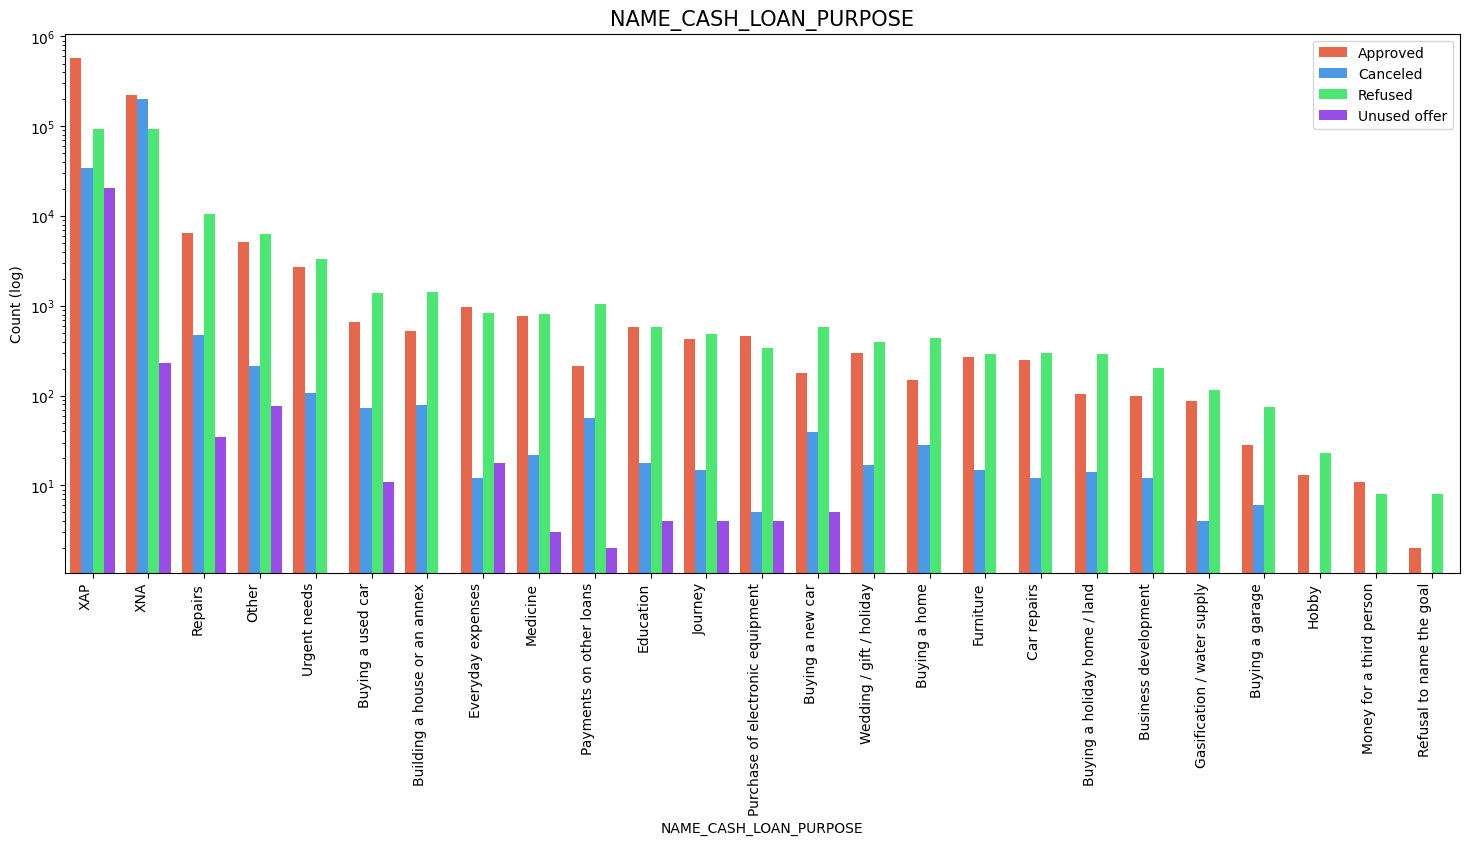

In [124]:
# Univariate analysis of NAME_CASH_LOAN_PURPOSE with TARGET=0
univariate_merged("NAME_CASH_LOAN_PURPOSE",merged_0,"NAME_CONTRACT_STATUS",["#FF5733", "#3399FF", "#33FF66", "#9933FF"],True,(18,7),save_path='images/')

Saved image to images/univariate_merged_NAME_CASH_LOAN_PURPOSE.png


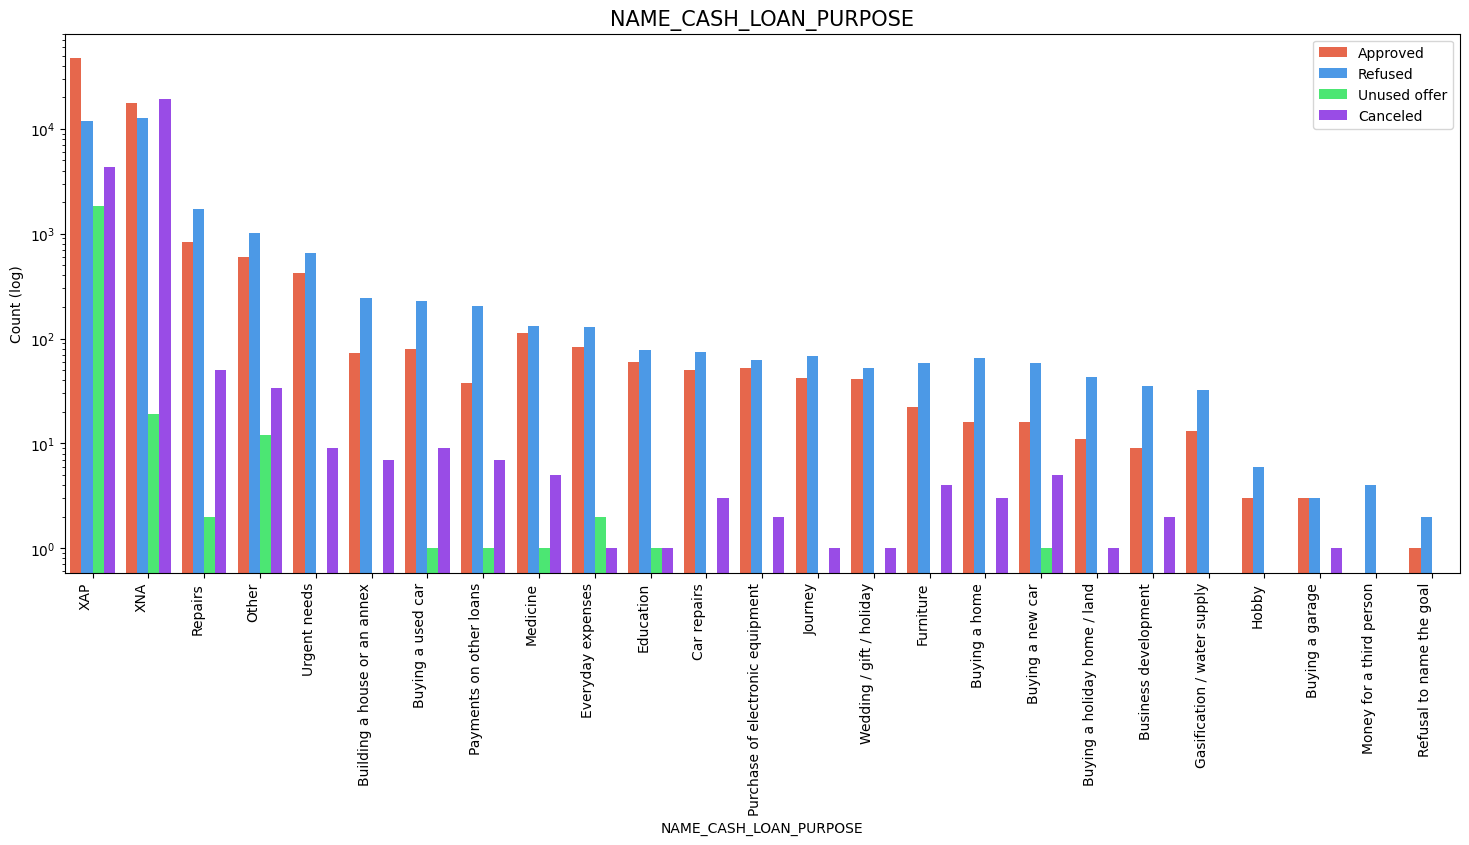

In [125]:
# Univariate analysis of NAME_CASH_LOAN_PURPOSE with TARGET=1
univariate_merged("NAME_CASH_LOAN_PURPOSE",merged_1,"NAME_CONTRACT_STATUS",["#FF5733", "#3399FF", "#33FF66", "#9933FF"],True,(18,7),save_path='images/')

#### **Insights:**

* **Loan Purpose with Unspecified Labels**: A significant number of loan applications have unspecified loan purposes labeled as "XAP" or "XNA."

* **High Default Rate for Repair Purpose Loans**: Loans taken for the purpose of repairs exhibit the highest default rate among all loan purposes.

* **Rejection and Refusal for Repair and Other Purposes**: A substantial number of loan applications categorized under "Repair" or "Other" purposes have been either rejected by the bank or refused by the clients. This indicates that the "Repair" purpose is considered high-risk by the bank, leading to application rejections or clients declining due to unfeasible loan terms.

Saved image to images/univariate_merged_NAME_CONTRACT_STATUS.png


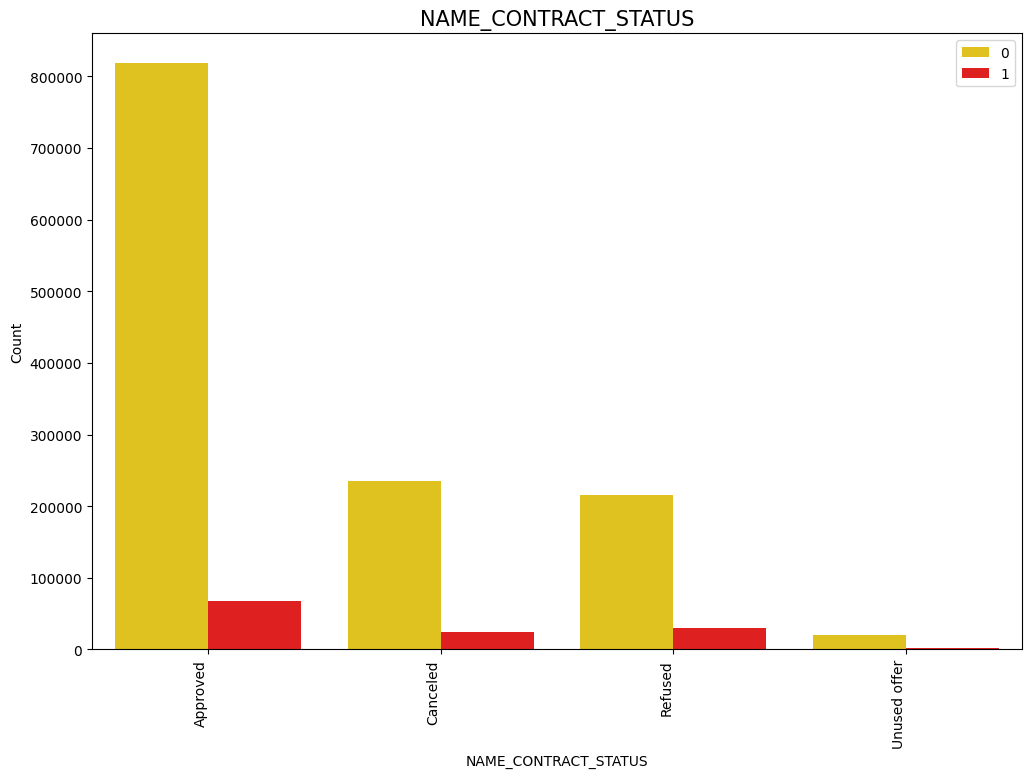

In [126]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",merged_dtf,"TARGET",['gold','red'],False,(12,8),save_path='images/')

### **Inferences:**


* **Loan Repayment by Previously Cancelled Clients**: It's noteworthy that a significant 90% of clients who were previously categorized as "cancelled" have successfully repaid their loans. Reassessing the interest rates for this group could potentially unlock new business opportunities.

* **Loan Repayment by Previously Refused Clients**: Another important observation is that 88% of clients who had their loan applications refused in the past have now repaid their current loans. This indicates that recording the reasons for refusal is crucial for further analysis, as these clients could transform into reliable, loan-repaying customers.

* **Recording Refusal Reasons for Future Insights**: To gain deeper insights and capitalize on potential opportunities, it's advisable to record and analyze the reasons for loan refusals. This data could reveal valuable information about clients who may become reliable loan repayors in the future.

In [127]:
# import shutil

# # Create a zip archive of the "images" directory
# shutil.make_archive("images", 'zip', "images")


In [128]:
# from google.colab import files

# # Download the zip archive
# files.download('/content/images.zip')


## **Conclusions:**

  #### Several factors strongly indicate whether an applicant is likely to be a repayer.

---


  
  1. **NAME_EDUCATION_TYPE**:
  Academic degree holders have a lower default rate compared to other education levels.

  2. **NAME_INCOME_TYPE**:
  The "Student" and "Businessmen" income types show a remarkable absence of defaults.

  3. **REGION_RATING_CLIENT**:
  Clients residing in regions with a safety rating of 1 are associated with lower default risk.

  4. **ORGANIZATION_TYPE**:
  Clients associated with "Trade Type 4," "Trade Type 5," and "Industry Type 8" have default rates below 3%.

  5. **DAYS_BIRTH**:
  Borrowers aged 50 and above exhibit a notably lower likelihood of defaulting on loans.

  6. **DAYS_EMPLOYED**:
  Clients with over 40 years of employment experience demonstrate an impressively low default rate of less than 1%.

  7. **AMT_INCOME_TOTAL**:
  Applicants with incomes exceeding 700,000 are associated with a reduced likelihood of defaulting on loans.

  8. **NAME_CASH_LOAN_PURPOSE**:
  Loans taken for purposes such as hobbies and garage purchases show higher repayment rates.

  9. **CNT_CHILDREN**:
  Borrowers with zero to two children tend to have a higher likelihood of repaying their loans reliably.


Features which help to predict if the applicant will be a defaulter


---



1. **CODE_GENDER:** Men have a relatively higher default rate.

2. **NAME_FAMILY_STATUS:** Individuals in civil marriages or who are single tend to have a higher default rate.

3. **NAME_EDUCATION_TYPE:** Those with Lower Secondary & Secondary education levels exhibit a higher default rate.

4. **NAME_INCOME_TYPE:** Clients on maternity leave or unemployed show a higher propensity for defaults.

5. **REGION_RATING_CLIENT:** Region Rating 3 has the highest default rates.

6. **OCCUPATION_TYPE:** Certain occupations, including low-skill laborers, drivers, waiters/barmen staff, security staff, laborers, and cooking staff, have a significantly higher default rate.

7. **ORGANIZATION_TYPE:** Organizations with the highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%), and Restaurant (less than 12%). Self-employed individuals also have a relatively high defaulting rate.

8. **DAYS_BIRTH:** Young people in the age group of 20-40 have a higher probability of defaulting.

9. **DAYS_EMPLOYED:** People with less than 5 years of employment experience a high default rate.

10. **CNT_CHILDREN & CNT_FAM_MEMBERS:** Clients with nine or more children default 100%, leading to the rejection of their applications.

11. **AMT_GOODS_PRICE:** When the credit amount exceeds 3 million, there is an increase in defaulters.

## **Recommendations:**

Based on the analysis of factors that indicate whether an applicant is likely to be a repayer or a defaulter, we can provide the following recommendations to the business:

**For Identifying Repayers:**

1. **Target Academic Degree Holders:** Focus on attracting applicants with academic degrees, as they have demonstrated a lower default rate. Consider offering special incentives or lower interest rates to this group to encourage more applications.

2. **Encourage Student and Businessman Applicants:** Student and businessman income types have shown a remarkable absence of defaults. Implement marketing strategies to attract more applicants from these categories.

3. **Preferred Regions for Lending:** Concentrate your lending activities in regions with a safety rating of 1, as clients residing in these areas are associated with lower default risk. Consider expanding your presence in these regions.

4. **Lend to Specific Organization Types:** Clients associated with "Trade Type 4," "Trade Type 5," and "Industry Type 8" have default rates below 3%. Tailor loan products or offers to these specific organization types.

5. **Attract Older Applicants:** Borrowers aged 50 and above exhibit a notably lower likelihood of defaulting on loans. Consider marketing strategies that target older demographics.

6. **Lend to Higher Income Individuals:** Applicants with incomes exceeding 700,000 have a reduced likelihood of defaulting. Focus on offering loan products that cater to higher income brackets.

7. **Promote Specific Loan Purposes:** Loans taken for hobbies and garage purchases show higher repayment rates. Promote loan products for these purposes and tailor marketing accordingly.

8. **Consider Family Size:** Borrowers with zero to two children tend to have a higher likelihood of repaying their loans reliably. Develop loan products that align with the financial needs of smaller families.

**For Identifying Defaulters:**

1. **Gender-Based Risk Assessment:** Men have a relatively higher default rate. Implement risk assessment models that consider gender as a factor in determining loan eligibility and terms.

2. **Marital Status and Education Level:** Individuals in civil marriages or who are single tend to have a higher default rate. Consider conducting additional risk assessments for applicants with these marital statuses. Also, take into account the education level of applicants when assessing risk.

3. **Occupation-Based Risk Assessment:** Certain occupations, such as low-skill laborers, drivers, waiters/barmen staff, security staff, laborers, and cooking staff, have a significantly higher default rate. Implement risk-based pricing or eligibility criteria for applicants from these occupations.

4. **Organization Type Consideration:** Organizations with the highest percent of loans not repaid should be approached with caution. Self-employed individuals also have a relatively high defaulting rate. Adjust interest rates or loan terms accordingly.

5. **Age-Based Risk Assessment:** Young people in the age group of 20-40 have a higher probability of defaulting. Consider stricter eligibility criteria or risk assessment models for applicants in this age group.

6. **Employment History Evaluation:** People with less than 5 years of employment experience exhibit a high default rate. Evaluate the employment history of applicants when determining loan eligibility and terms.

7. **Family Size and Child Count:** Clients with nine or more children have a 100% default rate. Reject applications from clients with large families or implement special risk assessment models for these cases.

8. **Credit Amount Consideration:** When the credit amount exceeds 3 million, there is an increase in defaulters. Implement stricter eligibility criteria or higher interest rates for loans exceeding this threshold.

By incorporating these recommendations into the business's lending practices, it can optimize its loan portfolio, reduce default rates, and make more informed decisions about lending to different applicant profiles. This approach helps in managing risk effectively and maximizing profitability.